In [1]:
import pandas as pd
from pathlib import Path
import os
import numpy as np
import logging, tensorflow as tf


2025-06-20 18:41:10.892866: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-06-20 18:41:10.892932: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-06-20 18:41:10.958292: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-20 18:41:11.112641: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:

project_folder = "animal_clasificacion" 
if os.getcwd().endswith("/tf"):
    os.chdir(project_folder)

In [3]:

tf.get_logger().propagate = False        
for h in tf.get_logger().handlers:
    h.addFilter(lambda record: "png_io.cc" not in record.getMessage())


In [ ]:
BASE_DIR = Path().cwd()

IMG_DIRECTORY = BASE_DIR / 'raw-img'


# Diccionario para guardar las direcciones de cada foto según su jerarquía
    # Key: Nombre animal
    # Value: Paths de las imágines
animales_show = {}


# Contiene  la cantidad de imágenes por animal
cantidad_fotos = {}

for folder in os.listdir(IMG_DIRECTORY):
    imagenes = list((IMG_DIRECTORY / folder).iterdir())
    len_images = len(imagenes)
    cantidad_fotos[folder]= len_images
    if imagenes:
        animales_show[folder] = imagenes

    

In [18]:
# Utilizamos los items de nuestro diccionario y asignamos columnas  para crear un df
df_totales = pd.DataFrame(list(cantidad_fotos.items()), columns=['Animal', 'Cuenta'])


In [19]:
total_imagenes = df_totales['Cuenta'].sum(axis=0)

df_totales['%_total'] = (df_totales['Cuenta']*100) / total_imagenes


In [26]:
print(f'El total de imágenes para contando todas las clases es de {total_imagenes}')

El total de imágenes para contando todas las clases es de 26179


In [20]:
translate = {"cane": "dog", "cavallo": "horse", "elefante": "elephant", "farfalla": "butterfly", 
             "gallina": "chicken", "gatto": "cat", "mucca": "cow", "pecora": "sheep", 
             "scoiattolo": "squirrel", "dog": "cane", "cavallo": "horse", "elephant" : "elefante", 
             "butterfly": "farfalla", "chicken": "gallina", "cat": "gatto", "cow": "mucca", 
             "ragno": "spider", "squirrel": "scoiattolo"}

df_totales['Animal'] = df_totales['Animal'].map(translate)


In [21]:
df_totales.sort_values(by='%_total', ascending=False)

Animal  Cuenta    %_total
5        dog    4863  18.575958
4     spider    4821  18.415524
1    chicken    3098  11.833913
6      horse    2623  10.019481
9  butterfly    2112   8.067535
0        cow    1866   7.127851
8   squirrel    1862   7.112571
7      sheep    1820   6.952137
3        cat    1668   6.371519
2   elephant    1446   5.523511

/tmp/ipykernel_12/2899944834.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_totales, x='Animal', y='Cuenta', palette='pastel')


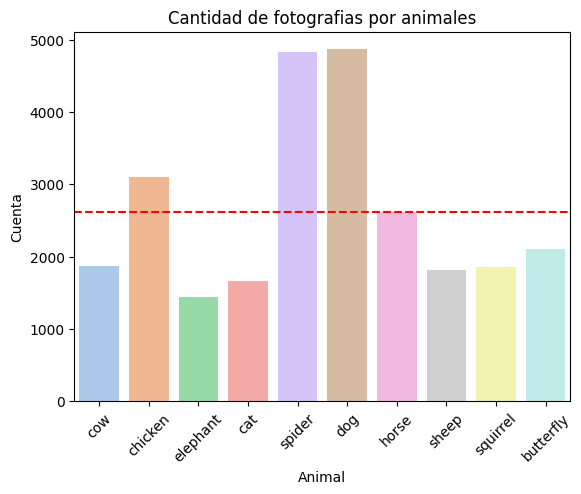

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generamos un barplot para reviar las diferencias
sns.barplot(data=df_totales, x='Animal', y='Cuenta', palette='pastel')
plt.title('Cantidad de fotografias por animales')
# Aprovechamos de poner el promedio de la cantidad de imágenes para ver que tanto se alejan de este
plt.axhline(df_totales['Cuenta'].mean(), color='r', linestyle='--')
plt.xticks(rotation=45)
plt.show()


En las 10 carpetas correspondientes a los diferentes animales existe un total de 26179 imágenes. Existe un notorio desbalanceo de clases producto a que las imágenes de arañas y perros concentran 37 % del total de lás imagenes como se puede observar más arriba. La clase menos representadas son los elefantes con solo 1446 imágenes que representan un 5 % del total de las imágenes. El problema de esto es que seria ideal tener datos mejor balanceados para poder ser utilizados en los modelos. Grafique el promedio con la linea roja horizontal y se puede ver que tampoco los la mayoria de los datos se encuentran cercanos a esta linea sino más bien podriamos tirar una horizontal cerca de los 2000 y en general estarian todas las clases cercanas al poder tocar esta linea lo que nos ayudaria a poder balancear desde ya el modelo sin necesidad de aplicar otra herramienta.

### Conclusión:

Como medida de balanceo de datos solo usare 2000 imágenes como tope maximo de una clase, esto quiere decir que si en una clase existe esta cantidad entonces se seleccionara dicha cantidad y en el caso contrario se seleccionara el máximo disponible.

## Obteniendo las primeras 2000 imagenes

In [ ]:
# Diccionario para guardar los nombres de los animales y los paths
new_data = {}

# Diccionario para saber la cantidad de imágenes por  clave
cantidad_fotos = {}

for folder in os.listdir(IMG_DIRECTORY):
    # Utiliza el path del directorio y la carpeta  e iterdir para seleccionar todos los archivos correspondiente a cada animal
    imagenes = list((IMG_DIRECTORY / folder).iterdir())[:2000]
    # Cantidad de imágenes
    len_images = len(imagenes)
    cantidad_fotos[folder]= len_images
    if imagenes:
        new_data[folder] = imagenes

    

In [36]:
for k, v in cantidad_fotos.items():

    print(f'La cantidad de imágenes para la clase {translate[k]} es de {v} \n')

La cantidad de imágenes para la clase cow es de 1866 

La cantidad de imágenes para la clase chicken es de 2000 

La cantidad de imágenes para la clase elephant es de 1446 

La cantidad de imágenes para la clase cat es de 1668 

La cantidad de imágenes para la clase spider es de 2000 

La cantidad de imágenes para la clase dog es de 2000 

La cantidad de imágenes para la clase horse es de 2000 

La cantidad de imágenes para la clase sheep es de 1820 

La cantidad de imágenes para la clase squirrel es de 1862 

La cantidad de imágenes para la clase butterfly es de 2000 



# **Visualizando los datos de imágenes**

In [37]:
# Sacando solo 1 imágenes por animal
first_item = { key:new_data[key][0] for i, (key, value) in enumerate(new_data.items())}

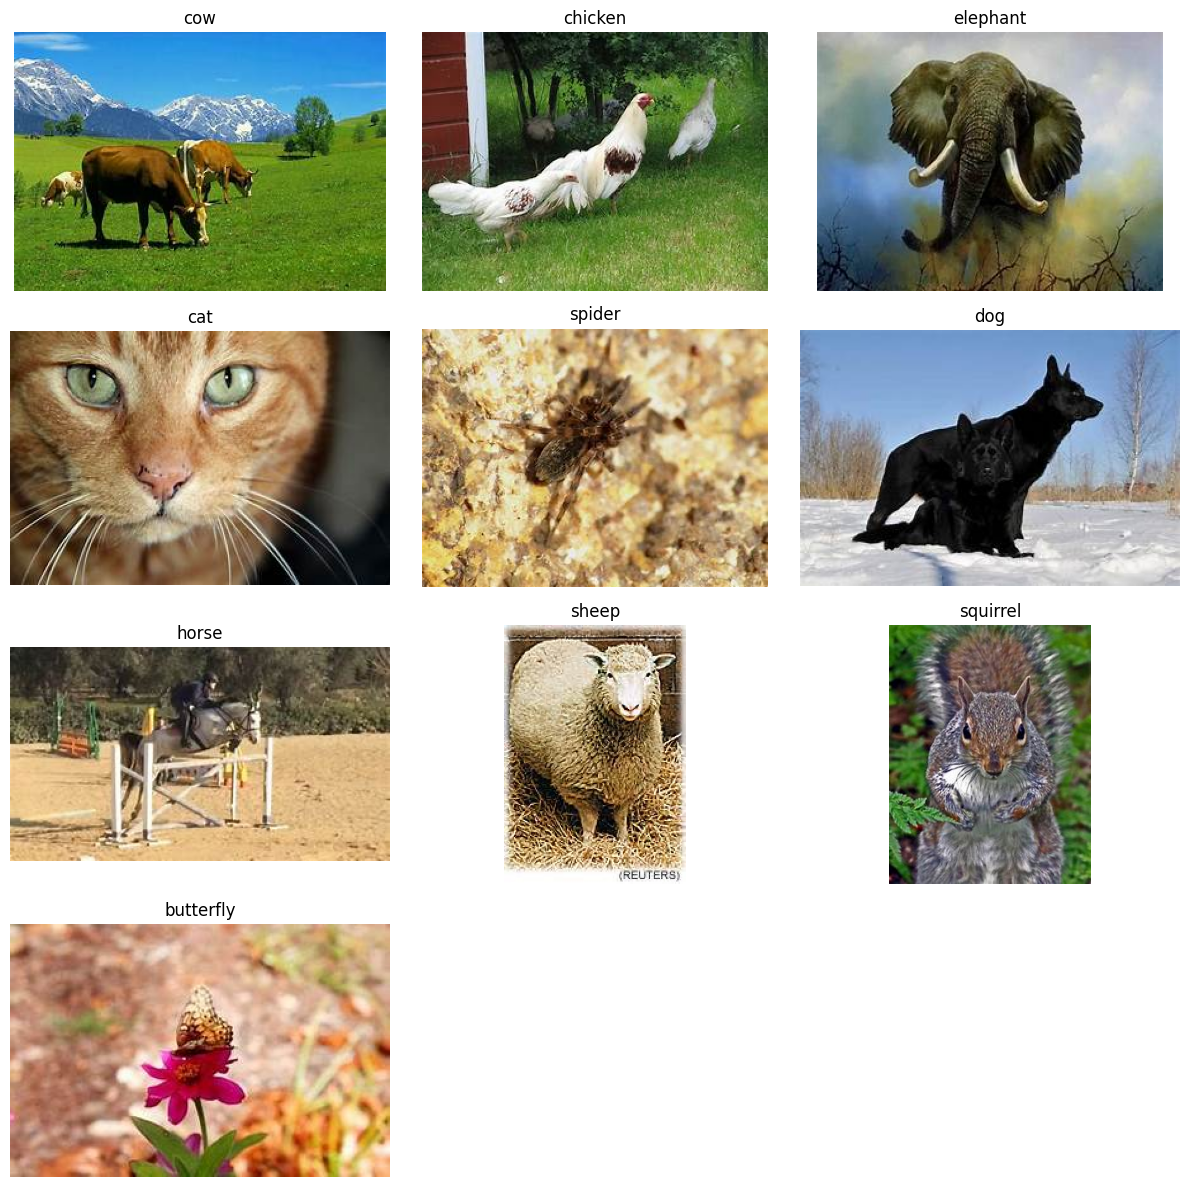

In [38]:
from PIL import Image

# Generando la figura con 12 celdas
fig, axes = plt.subplots(4, 3, figsize=(12, 12))

# Aplanando los ejes para realizar la asignación más facil
axes = axes.flatten()

# For loop para iterar sobre la primera imagen de cada animal
for i, (clase, path) in enumerate(first_item.items()):

    # Abriendo la imágen
    img = Image.open(path)
    # Cambiando el nombre de la tag original a la traducida
    clase = translate[clase]
    axes[i].imshow(img)
    axes[i].set_title(clase, fontsize=12)
    axes[i].axis('off')

# Sacando los graficos no ocupados
for j in range(i+1,len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


# **PREPARACIÓN DE LOS DATOS**

In [42]:
class_names = sorted(new_data.keys())
label_map   = {cls:i for i,cls in enumerate(class_names)}

print(f'Los nombres de las clases son {class_names}')
print()
print(label_map)

Los nombres de las clases son ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']

{'cane': 0, 'cavallo': 1, 'elefante': 2, 'farfalla': 3, 'gallina': 4, 'gatto': 5, 'mucca': 6, 'pecora': 7, 'ragno': 8, 'scoiattolo': 9}


Lo primero es extraer los nombre de clase para poder transformarlos a numéricos y de esta forma poder pasarselo a la red neuronal

In [45]:
import random
import numpy as np, random, tensorflow as tf

seed = 123

random.seed(seed)

paths   = []
labels  = []
for cls, lst in new_data.items():
    paths.extend(map(str, lst))
    labels.extend([label_map[cls]] * len(lst))
    


El siguiente paso consiste en iterar sobre los datos que tienen como llave los nombres de los animales y los value como los paths de las imagenes para extraer estos datos y asignarle el numero de label correspondiente.

In [46]:
import random
zipped = list(zip(paths, labels)) # Con esto cada path tiene su correspondiente label
random.shuffle(zipped) # Revolvemos los datos
paths, labels = zip(*zipped)

## ENTRENAMIENTO Y VALIDACIÓN

In [ ]:
val_count  = int(len(paths) * 0.2) # Utilizamos un 80 % de entrenamiento y un 20 de validacion


train_paths = np.array(paths[val_count:])
train_lbls  = np.array(labels[val_count:], dtype=np.int32)
val_paths   = np.array(paths[:val_count])
val_lbls    = np.array(labels[:val_count], dtype=np.int32)

## Normalización, redimensionado y batch

In [ ]:

data_dir = Path('raw-img')
img_size = (224, 224)
batch_size = 32

def load_image(p, y):
    img = tf.io.read_file(p)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, img_size) # resize
    img = tf.cast(img, tf.float32) / 255.0 # Normalización
    return img, y




A cada imágen se redimensionará a 224x22 para garantizar que todas las entradas tengan un tamaño consistente, evitando problemas de incompatibilidades además de optimizar el proceso de batches. 
Además se le aplicara una normalización dividiendo los pixeles por 255 para de esta forma tener valores de [0 , 1] para facilitar la convergencia del modelo además  de mejorar el rendimiento de diversos modelos.

In [114]:
augment = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomTranslation(0.1,0.1),
    tf.keras.layers.RandomContrast(0.1),
])

def aug_map(x,y): return augment(x, training=True), y

Debido a la cantidad limitada de imágenes disponible que dejamos para entrenar el modelo, aplicamos data augmentation como una forma de generar variaciones artificiales de las imagene sorgiinales. Esto principalemnte para tratar de evitar el overfitting y a su vez mejorar la robustez del mismo.

Esta capa incluye las siguientes trasnformaciones:

- RandomFlip("horizontal"): Voltea la imagen horizontalmente (espejo).

- RandomRotation(0.1): Rota la imagen hasta un 10% (≈36°). Este valor es suficiente sin distorcionar la imagen

- RandomZoom(0.2): Aplica zoom aleatorio (hasta un 20% de acercamiento o alejamiento).

- RandomTranslation(0.1, 0.1): Desplaza la imagen un 10% en altura y anchura.

- RandomContrast(0.1): Varía el contraste en un 10%.

Estas transformaciones se aplican en tiempo real durante el entrenamiento (sin guardarse las imágenes aumentadas).

---

In [116]:

train_ds = (tf.data.Dataset
            .from_tensor_slices((train_paths, train_lbls))
            .shuffle(len(train_paths), seed=seed)
            .map(load_image, num_parallel_calls=tf.data.AUTOTUNE)
            .map(aug_map,   num_parallel_calls=tf.data.AUTOTUNE)
            .batch(batch_size)
            .prefetch(tf.data.AUTOTUNE))

val_ds = (tf.data.Dataset
          .from_tensor_slices((val_paths, val_lbls))
          .map(load_image, num_parallel_calls=tf.data.AUTOTUNE)
          .batch(batch_size)
          .prefetch(tf.data.AUTOTUNE))


In [125]:

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models, optimizers, callbacks

num_classes = len(class_names)

model = Sequential([
    layers.Conv2D(32, (5, 5), activation='relu', input_shape=(224, 224, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),
    
    layers.Conv2D(64, (5, 5), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),
    
    layers.Conv2D(128, (5, 5), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),  
    
    layers.Conv2D(256, (5, 5), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),  
    layers.Dense(num_classes, activation='softmax')     
])


model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    callbacks=[
        tf.keras.callbacks.ReduceLROnPlateau(patience=3, factor=0.5),
        tf.keras.callbacks.EarlyStopping(patience=8, restore_best_weights=True)
    ]
)

Epoch 1/50


2025-06-19 21:34:25.647145: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_6/dropout_5/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2025-06-19 21:34:25.838396: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8906
2025-06-19 21:34:27.705536: I external/local_xla/xla/service/service.cc:168] XLA service 0x3bc4b7a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-06-19 21:34:27.705554: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1660 SUPER, Compute Capability 7.5
2025-06-19 21:34:27.717280: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1750368867.785665      90 device_compiler.h:186] Compiled cluster us

 59/467 [==>...........................] - ETA: 49s - loss: 3.2680 - accuracy: 0.1562

2025-06-19 21:34:37.757694: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


111/467 [======>.......................] - ETA: 42s - loss: 2.7874 - accuracy: 0.1745

2025-06-19 21:34:44.028369: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


114/467 [======>.......................] - ETA: 42s - loss: 2.7744 - accuracy: 0.1743

2025-06-19 21:34:44.308459: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


123/467 [======>.......................] - ETA: 41s - loss: 2.7304 - accuracy: 0.1791

2025-06-19 21:34:45.464163: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


168/467 [=========>....................] - ETA: 36s - loss: 2.5855 - accuracy: 0.1875

2025-06-19 21:34:50.858980: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


238/467 [==============>...............] - ETA: 27s - loss: 2.4656 - accuracy: 0.1954

2025-06-19 21:34:59.461146: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


260/467 [===============>..............] - ETA: 25s - loss: 2.4378 - accuracy: 0.1972

2025-06-19 21:35:02.122633: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


263/467 [===============>..............] - ETA: 24s - loss: 2.4339 - accuracy: 0.1982

2025-06-19 21:35:02.490507: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


294/467 [=================>............] - ETA: 20s - loss: 2.4026 - accuracy: 0.2036

2025-06-19 21:35:06.118735: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


309/467 [==================>...........] - ETA: 19s - loss: 2.3874 - accuracy: 0.2049

2025-06-19 21:35:08.016483: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


314/467 [===================>..........] - ETA: 18s - loss: 2.3830 - accuracy: 0.2053

2025-06-19 21:35:08.609224: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


350/467 [=====================>........] - ETA: 14s - loss: 2.3643 - accuracy: 0.2062

2025-06-19 21:35:12.869432: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


378/467 [=======================>......] - ETA: 10s - loss: 2.3445 - accuracy: 0.2096

2025-06-19 21:35:16.317998: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


381/467 [=======================>......] - ETA: 10s - loss: 2.3428 - accuracy: 0.2096

2025-06-19 21:35:16.673929: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


394/467 [========================>.....] - ETA: 8s - loss: 2.3358 - accuracy: 0.2111

2025-06-19 21:35:18.160737: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


426/467 [==========================>...] - ETA: 4s - loss: 2.3199 - accuracy: 0.2135

2025-06-19 21:35:22.114327: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


432/467 [==========================>...] - ETA: 4s - loss: 2.3159 - accuracy: 0.2143

2025-06-19 21:35:22.740877: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


435/467 [==========================>...] - ETA: 3s - loss: 2.3144 - accuracy: 0.2146

2025-06-19 21:35:23.106787: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - ETA: 0s - loss: 2.2993 - accuracy: 0.2161

2025-06-19 21:35:29.997575: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:35:30.221784: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:35:30.325128: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:35:30.467187: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - 67s 132ms/step - loss: 2.2993 - accuracy: 0.2161 - val_loss: 6.2610 - val_accuracy: 0.1785 - lr: 1.0000e-04
Epoch 2/50
  4/467 [..............................] - ETA: 58s - loss: 2.0826 - accuracy: 0.1953

2025-06-19 21:35:32.747589: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 40/467 [=>............................] - ETA: 51s - loss: 2.0748 - accuracy: 0.2398

2025-06-19 21:35:37.094024: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 49/467 [==>...........................] - ETA: 50s - loss: 2.0601 - accuracy: 0.2500

2025-06-19 21:35:38.181448: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 59/467 [==>...........................] - ETA: 49s - loss: 2.0438 - accuracy: 0.2542

2025-06-19 21:35:39.363107: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 92/467 [====>.........................] - ETA: 45s - loss: 2.0549 - accuracy: 0.2565

2025-06-19 21:35:43.343595: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


139/467 [=======>......................] - ETA: 39s - loss: 2.0563 - accuracy: 0.2592

2025-06-19 21:35:48.989815: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


257/467 [===============>..............] - ETA: 25s - loss: 2.0329 - accuracy: 0.2712

2025-06-19 21:36:03.206823: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


266/467 [================>.............] - ETA: 24s - loss: 2.0366 - accuracy: 0.2693

2025-06-19 21:36:04.216321: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


273/467 [================>.............] - ETA: 23s - loss: 2.0368 - accuracy: 0.2698

2025-06-19 21:36:05.148923: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


295/467 [=================>............] - ETA: 20s - loss: 2.0334 - accuracy: 0.2718

2025-06-19 21:36:07.774809: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


302/467 [==================>...........] - ETA: 19s - loss: 2.0312 - accuracy: 0.2721

2025-06-19 21:36:08.619367: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


322/467 [===================>..........] - ETA: 17s - loss: 2.0305 - accuracy: 0.2715

2025-06-19 21:36:11.030148: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


332/467 [====================>.........] - ETA: 16s - loss: 2.0274 - accuracy: 0.2729

2025-06-19 21:36:12.230134: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


390/467 [========================>.....] - ETA: 9s - loss: 2.0255 - accuracy: 0.2738

2025-06-19 21:36:19.241175: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


401/467 [========================>.....] - ETA: 7s - loss: 2.0227 - accuracy: 0.2752

2025-06-19 21:36:20.554233: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


405/467 [=========================>....] - ETA: 7s - loss: 2.0222 - accuracy: 0.2751

2025-06-19 21:36:21.051004: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


412/467 [=========================>....] - ETA: 6s - loss: 2.0229 - accuracy: 0.2747

2025-06-19 21:36:21.876965: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


435/467 [==========================>...] - ETA: 3s - loss: 2.0203 - accuracy: 0.2756

2025-06-19 21:36:24.630822: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - ETA: 0s - loss: 2.0130 - accuracy: 0.2782

2025-06-19 21:36:29.097739: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:36:29.352596: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:36:29.471050: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:36:29.624079: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - 59s 125ms/step - loss: 2.0130 - accuracy: 0.2782 - val_loss: 3.1144 - val_accuracy: 0.3258 - lr: 1.0000e-04
Epoch 3/50
  7/467 [..............................] - ETA: 57s - loss: 1.9120 - accuracy: 0.3348

2025-06-19 21:36:31.639768: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 45/467 [=>............................] - ETA: 51s - loss: 1.9626 - accuracy: 0.3083

2025-06-19 21:36:36.289694: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 48/467 [==>...........................] - ETA: 50s - loss: 1.9672 - accuracy: 0.3066

2025-06-19 21:36:36.664940: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 58/467 [==>...........................] - ETA: 49s - loss: 1.9458 - accuracy: 0.3130

2025-06-19 21:36:37.857765: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 72/467 [===>..........................] - ETA: 47s - loss: 1.9269 - accuracy: 0.3168

2025-06-19 21:36:39.543186: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


114/467 [======>.......................] - ETA: 42s - loss: 1.9361 - accuracy: 0.3158

2025-06-19 21:36:44.593146: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


116/467 [======>.......................] - ETA: 42s - loss: 1.9337 - accuracy: 0.3165

2025-06-19 21:36:44.838501: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


125/467 [=======>......................] - ETA: 41s - loss: 1.9390 - accuracy: 0.3122

2025-06-19 21:36:45.834329: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


195/467 [===========>..................] - ETA: 32s - loss: 1.9262 - accuracy: 0.3200

2025-06-19 21:36:54.230388: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


257/467 [===============>..............] - ETA: 25s - loss: 1.9173 - accuracy: 0.3248

2025-06-19 21:37:01.792216: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


308/467 [==================>...........] - ETA: 19s - loss: 1.9067 - accuracy: 0.3287

2025-06-19 21:37:07.968932: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


320/467 [===================>..........] - ETA: 17s - loss: 1.9043 - accuracy: 0.3295

2025-06-19 21:37:09.443225: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


354/467 [=====================>........] - ETA: 13s - loss: 1.9004 - accuracy: 0.3302

2025-06-19 21:37:13.503122: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


370/467 [======================>.......] - ETA: 11s - loss: 1.8984 - accuracy: 0.3310

2025-06-19 21:37:15.436864: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


395/467 [========================>.....] - ETA: 8s - loss: 1.8976 - accuracy: 0.3318

2025-06-19 21:37:18.425841: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


401/467 [========================>.....] - ETA: 7s - loss: 1.8964 - accuracy: 0.3321

2025-06-19 21:37:19.142903: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


458/467 [============================>.] - ETA: 1s - loss: 1.8949 - accuracy: 0.3347

2025-06-19 21:37:25.923459: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


460/467 [============================>.] - ETA: 0s - loss: 1.8945 - accuracy: 0.3348

2025-06-19 21:37:26.252547: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - ETA: 0s - loss: 1.8934 - accuracy: 0.3350

2025-06-19 21:37:27.700493: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:37:27.946418: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:37:28.059076: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:37:28.224933: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - 58s 125ms/step - loss: 1.8934 - accuracy: 0.3350 - val_loss: 3.4407 - val_accuracy: 0.2730 - lr: 1.0000e-04
Epoch 4/50
  1/467 [..............................] - ETA: 1:16 - loss: 1.9497 - accuracy: 0.2812

2025-06-19 21:37:29.503110: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:37:29.523207: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 17/467 [>.............................] - ETA: 54s - loss: 1.8562 - accuracy: 0.3107

2025-06-19 21:37:31.480962: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 20/467 [>.............................] - ETA: 54s - loss: 1.8659 - accuracy: 0.3047

2025-06-19 21:37:31.836856: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:37:31.956178: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 37/467 [=>............................] - ETA: 51s - loss: 1.8709 - accuracy: 0.3024

2025-06-19 21:37:33.887759: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 61/467 [==>...........................] - ETA: 48s - loss: 1.8525 - accuracy: 0.3207

2025-06-19 21:37:36.762691: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


119/467 [======>.......................] - ETA: 41s - loss: 1.8377 - accuracy: 0.3338

2025-06-19 21:37:43.751221: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


146/467 [========>.....................] - ETA: 38s - loss: 1.8338 - accuracy: 0.3401

2025-06-19 21:37:46.997987: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


196/467 [===========>..................] - ETA: 32s - loss: 1.8393 - accuracy: 0.3444

2025-06-19 21:37:53.002732: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


268/467 [================>.............] - ETA: 23s - loss: 1.8309 - accuracy: 0.3479

2025-06-19 21:38:01.637533: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


279/467 [================>.............] - ETA: 22s - loss: 1.8299 - accuracy: 0.3481

2025-06-19 21:38:02.950923: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


296/467 [==================>...........] - ETA: 20s - loss: 1.8249 - accuracy: 0.3509

2025-06-19 21:38:04.994914: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


321/467 [===================>..........] - ETA: 17s - loss: 1.8254 - accuracy: 0.3506

2025-06-19 21:38:07.985751: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


359/467 [======================>.......] - ETA: 12s - loss: 1.8172 - accuracy: 0.3539

2025-06-19 21:38:12.566731: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


378/467 [=======================>......] - ETA: 10s - loss: 1.8201 - accuracy: 0.3532

2025-06-19 21:38:14.837948: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


386/467 [=======================>......] - ETA: 9s - loss: 1.8191 - accuracy: 0.3541

2025-06-19 21:38:15.803604: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


421/467 [==========================>...] - ETA: 5s - loss: 1.8166 - accuracy: 0.3558

2025-06-19 21:38:19.987410: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - ETA: 0s - loss: 1.8143 - accuracy: 0.3578

2025-06-19 21:38:26.149002: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:38:26.395938: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:38:26.507190: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:38:26.677163: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - 58s 125ms/step - loss: 1.8143 - accuracy: 0.3578 - val_loss: 2.0504 - val_accuracy: 0.4017 - lr: 1.0000e-04
Epoch 5/50
 30/467 [>.............................] - ETA: 53s - loss: 1.7827 - accuracy: 0.3719

2025-06-19 21:38:31.590325: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 51/467 [==>...........................] - ETA: 50s - loss: 1.8188 - accuracy: 0.3652

2025-06-19 21:38:34.110156: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:38:34.120919: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 80/467 [====>.........................] - ETA: 46s - loss: 1.7982 - accuracy: 0.3703

2025-06-19 21:38:37.504653: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


100/467 [=====>........................] - ETA: 44s - loss: 1.7885 - accuracy: 0.3719

2025-06-19 21:38:39.987699: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


168/467 [=========>....................] - ETA: 36s - loss: 1.7770 - accuracy: 0.3765

2025-06-19 21:38:48.155256: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


182/467 [==========>...................] - ETA: 34s - loss: 1.7774 - accuracy: 0.3748

2025-06-19 21:38:49.848506: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


185/467 [==========>...................] - ETA: 33s - loss: 1.7769 - accuracy: 0.3757

2025-06-19 21:38:50.180641: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


213/467 [============>.................] - ETA: 30s - loss: 1.7699 - accuracy: 0.3788

2025-06-19 21:38:53.492331: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


272/467 [================>.............] - ETA: 23s - loss: 1.7627 - accuracy: 0.3801

2025-06-19 21:39:00.639896: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


286/467 [=================>............] - ETA: 21s - loss: 1.7652 - accuracy: 0.3790

2025-06-19 21:39:02.315051: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


314/467 [===================>..........] - ETA: 18s - loss: 1.7647 - accuracy: 0.3800

2025-06-19 21:39:05.682865: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


351/467 [=====================>........] - ETA: 13s - loss: 1.7617 - accuracy: 0.3802

2025-06-19 21:39:10.140855: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


366/467 [======================>.......] - ETA: 12s - loss: 1.7629 - accuracy: 0.3802

2025-06-19 21:39:11.924234: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


390/467 [========================>.....] - ETA: 9s - loss: 1.7610 - accuracy: 0.3804

2025-06-19 21:39:14.812550: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


401/467 [========================>.....] - ETA: 7s - loss: 1.7606 - accuracy: 0.3814

2025-06-19 21:39:16.145028: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


451/467 [===========================>..] - ETA: 1s - loss: 1.7533 - accuracy: 0.3830

2025-06-19 21:39:22.143565: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


461/467 [============================>.] - ETA: 0s - loss: 1.7534 - accuracy: 0.3825

2025-06-19 21:39:23.330368: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - ETA: 0s - loss: 1.7540 - accuracy: 0.3826

2025-06-19 21:39:24.663501: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:39:24.909180: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:39:25.022023: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:39:25.178205: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - 58s 125ms/step - loss: 1.7540 - accuracy: 0.3826 - val_loss: 2.5260 - val_accuracy: 0.3352 - lr: 1.0000e-04
Epoch 6/50
  3/467 [..............................] - ETA: 57s - loss: 1.6917 - accuracy: 0.3750

2025-06-19 21:39:26.730106: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 15/467 [..............................] - ETA: 55s - loss: 1.7816 - accuracy: 0.3438

2025-06-19 21:39:28.197885: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 20/467 [>.............................] - ETA: 54s - loss: 1.7450 - accuracy: 0.3562

2025-06-19 21:39:28.813747: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 90/467 [====>.........................] - ETA: 45s - loss: 1.7101 - accuracy: 0.3983

2025-06-19 21:39:37.180313: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/467 [=====>........................] - ETA: 43s - loss: 1.7076 - accuracy: 0.3987

2025-06-19 21:39:38.754185: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


186/467 [==========>...................] - ETA: 33s - loss: 1.7076 - accuracy: 0.3990

2025-06-19 21:39:48.704462: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


195/467 [===========>..................] - ETA: 32s - loss: 1.7040 - accuracy: 0.4014

2025-06-19 21:39:49.777203: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


209/467 [============>.................] - ETA: 30s - loss: 1.7007 - accuracy: 0.4033

2025-06-19 21:39:51.469490: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


222/467 [=============>................] - ETA: 29s - loss: 1.6980 - accuracy: 0.4055

2025-06-19 21:39:53.053415: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


241/467 [==============>...............] - ETA: 27s - loss: 1.6980 - accuracy: 0.4052

2025-06-19 21:39:55.323164: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


265/467 [================>.............] - ETA: 24s - loss: 1.6991 - accuracy: 0.4037

2025-06-19 21:39:58.192858: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


313/467 [===================>..........] - ETA: 18s - loss: 1.7033 - accuracy: 0.4024

2025-06-19 21:40:03.974014: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


329/467 [====================>.........] - ETA: 16s - loss: 1.6987 - accuracy: 0.4025

2025-06-19 21:40:05.917006: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:40:06.035807: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


361/467 [======================>.......] - ETA: 12s - loss: 1.6924 - accuracy: 0.4070

2025-06-19 21:40:09.716453: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


380/467 [=======================>......] - ETA: 10s - loss: 1.6885 - accuracy: 0.4077

2025-06-19 21:40:12.053530: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


410/467 [=========================>....] - ETA: 6s - loss: 1.6850 - accuracy: 0.4101

2025-06-19 21:40:15.638116: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


463/467 [============================>.] - ETA: 0s - loss: 1.6814 - accuracy: 0.4116

2025-06-19 21:40:22.002147: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - ETA: 0s - loss: 1.6823 - accuracy: 0.4111

2025-06-19 21:40:23.075155: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:40:23.333866: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:40:23.445388: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:40:23.616311: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - 58s 125ms/step - loss: 1.6823 - accuracy: 0.4111 - val_loss: 2.2512 - val_accuracy: 0.3432 - lr: 1.0000e-04
Epoch 7/50
  6/467 [..............................] - ETA: 56s - loss: 1.7348 - accuracy: 0.3854

2025-06-19 21:40:25.523775: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:40:25.563931: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 44/467 [=>............................] - ETA: 51s - loss: 1.7118 - accuracy: 0.4013

2025-06-19 21:40:30.149727: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 64/467 [===>..........................] - ETA: 48s - loss: 1.6979 - accuracy: 0.4067

2025-06-19 21:40:32.545656: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:40:32.700978: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 94/467 [=====>........................] - ETA: 45s - loss: 1.6787 - accuracy: 0.4102

2025-06-19 21:40:36.182977: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


126/467 [=======>......................] - ETA: 41s - loss: 1.6746 - accuracy: 0.4105

2025-06-19 21:40:40.011622: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


142/467 [========>.....................] - ETA: 39s - loss: 1.6668 - accuracy: 0.4140

2025-06-19 21:40:41.912394: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


276/467 [================>.............] - ETA: 23s - loss: 1.6363 - accuracy: 0.4236

2025-06-19 21:40:58.042809: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


334/467 [====================>.........] - ETA: 16s - loss: 1.6362 - accuracy: 0.4240

2025-06-19 21:41:04.986708: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


344/467 [=====================>........] - ETA: 14s - loss: 1.6372 - accuracy: 0.4238

2025-06-19 21:41:06.195344: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


365/467 [======================>.......] - ETA: 12s - loss: 1.6407 - accuracy: 0.4226

2025-06-19 21:41:08.720760: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


380/467 [=======================>......] - ETA: 10s - loss: 1.6414 - accuracy: 0.4225

2025-06-19 21:41:10.514469: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


398/467 [========================>.....] - ETA: 8s - loss: 1.6403 - accuracy: 0.4233

2025-06-19 21:41:12.580572: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:41:12.660923: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


406/467 [=========================>....] - ETA: 7s - loss: 1.6426 - accuracy: 0.4230

2025-06-19 21:41:13.625866: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


445/467 [===========================>..] - ETA: 2s - loss: 1.6323 - accuracy: 0.4261

2025-06-19 21:41:18.225966: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:41:18.315619: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - ETA: 0s - loss: 1.6346 - accuracy: 0.4264

2025-06-19 21:41:21.576894: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:41:21.832379: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:41:21.941042: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:41:22.109743: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - 59s 125ms/step - loss: 1.6346 - accuracy: 0.4264 - val_loss: 1.8182 - val_accuracy: 0.4156 - lr: 1.0000e-04
Epoch 8/50
 53/467 [==>...........................] - ETA: 50s - loss: 1.6317 - accuracy: 0.4251

2025-06-19 21:41:29.776061: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/467 [==>...........................] - ETA: 49s - loss: 1.6228 - accuracy: 0.4276

2025-06-19 21:41:30.162653: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


114/467 [======>.......................] - ETA: 42s - loss: 1.5980 - accuracy: 0.4361

2025-06-19 21:41:37.102655: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


117/467 [======>.......................] - ETA: 42s - loss: 1.5940 - accuracy: 0.4372

2025-06-19 21:41:37.458506: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


122/467 [======>.......................] - ETA: 41s - loss: 1.5901 - accuracy: 0.4388

2025-06-19 21:41:38.057620: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


279/467 [================>.............] - ETA: 22s - loss: 1.5928 - accuracy: 0.4414

2025-06-19 21:41:56.938534: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


284/467 [=================>............] - ETA: 22s - loss: 1.5910 - accuracy: 0.4419

2025-06-19 21:41:57.547122: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


290/467 [=================>............] - ETA: 21s - loss: 1.5880 - accuracy: 0.4431

2025-06-19 21:41:58.263646: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


370/467 [======================>.......] - ETA: 11s - loss: 1.5778 - accuracy: 0.4484

2025-06-19 21:42:07.880226: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


390/467 [========================>.....] - ETA: 9s - loss: 1.5734 - accuracy: 0.4494

2025-06-19 21:42:10.296760: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


393/467 [========================>.....] - ETA: 8s - loss: 1.5733 - accuracy: 0.4494

2025-06-19 21:42:10.647775: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


396/467 [========================>.....] - ETA: 8s - loss: 1.5715 - accuracy: 0.4501

2025-06-19 21:42:11.003119: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


415/467 [=========================>....] - ETA: 6s - loss: 1.5725 - accuracy: 0.4502

2025-06-19 21:42:13.298040: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


428/467 [==========================>...] - ETA: 4s - loss: 1.5749 - accuracy: 0.4495

2025-06-19 21:42:14.860963: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:42:14.866769: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:42:14.876560: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


443/467 [===========================>..] - ETA: 2s - loss: 1.5731 - accuracy: 0.4499

2025-06-19 21:42:16.693346: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


445/467 [===========================>..] - ETA: 2s - loss: 1.5726 - accuracy: 0.4501

2025-06-19 21:42:16.930822: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - ETA: 0s - loss: 1.5720 - accuracy: 0.4507

2025-06-19 21:42:20.188786: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:42:20.439581: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:42:20.559769: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:42:20.724477: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - 59s 125ms/step - loss: 1.5720 - accuracy: 0.4507 - val_loss: 2.3635 - val_accuracy: 0.3266 - lr: 1.0000e-04
Epoch 9/50
  7/467 [..............................] - ETA: 57s - loss: 1.5539 - accuracy: 0.5000

2025-06-19 21:42:22.769300: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 36/467 [=>............................] - ETA: 53s - loss: 1.5036 - accuracy: 0.4661

2025-06-19 21:42:26.349713: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 43/467 [=>............................] - ETA: 52s - loss: 1.5175 - accuracy: 0.4651

2025-06-19 21:42:27.124023: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 47/467 [==>...........................] - ETA: 51s - loss: 1.5084 - accuracy: 0.4668

2025-06-19 21:42:27.665564: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 64/467 [===>..........................] - ETA: 49s - loss: 1.5351 - accuracy: 0.4609

2025-06-19 21:42:29.625307: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


131/467 [=======>......................] - ETA: 40s - loss: 1.5387 - accuracy: 0.4616

2025-06-19 21:42:37.708976: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


140/467 [=======>......................] - ETA: 39s - loss: 1.5392 - accuracy: 0.4632

2025-06-19 21:42:38.878168: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


168/467 [=========>....................] - ETA: 36s - loss: 1.5405 - accuracy: 0.4648

2025-06-19 21:42:42.241616: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


257/467 [===============>..............] - ETA: 25s - loss: 1.5221 - accuracy: 0.4720

2025-06-19 21:42:52.981833: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


265/467 [================>.............] - ETA: 24s - loss: 1.5244 - accuracy: 0.4719

2025-06-19 21:42:53.962565: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


290/467 [=================>............] - ETA: 21s - loss: 1.5276 - accuracy: 0.4709

2025-06-19 21:42:56.973100: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


294/467 [=================>............] - ETA: 20s - loss: 1.5282 - accuracy: 0.4706

2025-06-19 21:42:57.447900: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


298/467 [==================>...........] - ETA: 20s - loss: 1.5276 - accuracy: 0.4708

2025-06-19 21:42:57.922597: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


329/467 [====================>.........] - ETA: 16s - loss: 1.5285 - accuracy: 0.4692

2025-06-19 21:43:01.653279: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


386/467 [=======================>......] - ETA: 9s - loss: 1.5292 - accuracy: 0.4689

2025-06-19 21:43:08.513888: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


398/467 [========================>.....] - ETA: 8s - loss: 1.5274 - accuracy: 0.4702

2025-06-19 21:43:09.953187: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


406/467 [=========================>....] - ETA: 7s - loss: 1.5258 - accuracy: 0.4709

2025-06-19 21:43:10.829430: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


430/467 [==========================>...] - ETA: 4s - loss: 1.5252 - accuracy: 0.4717

2025-06-19 21:43:13.812105: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - ETA: 0s - loss: 1.5267 - accuracy: 0.4715

2025-06-19 21:43:18.871618: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:43:19.121127: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:43:19.226895: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:43:19.383891: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - 59s 125ms/step - loss: 1.5267 - accuracy: 0.4715 - val_loss: 1.8584 - val_accuracy: 0.4193 - lr: 1.0000e-04
Epoch 10/50
  1/467 [..............................] - ETA: 1:15 - loss: 1.3034 - accuracy: 0.6250

2025-06-19 21:43:20.665173: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 41/467 [=>............................] - ETA: 51s - loss: 1.4465 - accuracy: 0.4817

2025-06-19 21:43:25.433973: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 42/467 [=>............................] - ETA: 51s - loss: 1.4483 - accuracy: 0.4821

2025-06-19 21:43:25.645051: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 73/467 [===>..........................] - ETA: 47s - loss: 1.4390 - accuracy: 0.4906

2025-06-19 21:43:29.367551: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


125/467 [=======>......................] - ETA: 41s - loss: 1.4590 - accuracy: 0.4922

2025-06-19 21:43:35.610947: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


179/467 [==========>...................] - ETA: 34s - loss: 1.4595 - accuracy: 0.4923

2025-06-19 21:43:42.135399: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


192/467 [===========>..................] - ETA: 33s - loss: 1.4600 - accuracy: 0.4917

2025-06-19 21:43:43.660632: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


206/467 [============>.................] - ETA: 31s - loss: 1.4492 - accuracy: 0.4936

2025-06-19 21:43:45.256933: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


218/467 [=============>................] - ETA: 29s - loss: 1.4518 - accuracy: 0.4940

2025-06-19 21:43:46.784273: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


230/467 [=============>................] - ETA: 28s - loss: 1.4596 - accuracy: 0.4928

2025-06-19 21:43:48.225190: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:43:48.256425: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


277/467 [================>.............] - ETA: 22s - loss: 1.4677 - accuracy: 0.4921

2025-06-19 21:43:53.765612: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


281/467 [=================>............] - ETA: 22s - loss: 1.4715 - accuracy: 0.4902

2025-06-19 21:43:54.342780: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


308/467 [==================>...........] - ETA: 19s - loss: 1.4674 - accuracy: 0.4919

2025-06-19 21:43:57.551858: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


327/467 [====================>.........] - ETA: 16s - loss: 1.4700 - accuracy: 0.4905

2025-06-19 21:43:59.740222: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


344/467 [=====================>........] - ETA: 14s - loss: 1.4694 - accuracy: 0.4917

2025-06-19 21:44:01.853917: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


391/467 [========================>.....] - ETA: 9s - loss: 1.4679 - accuracy: 0.4899

2025-06-19 21:44:07.422719: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


433/467 [==========================>...] - ETA: 4s - loss: 1.4655 - accuracy: 0.4912

2025-06-19 21:44:12.535398: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - ETA: 0s - loss: 1.4688 - accuracy: 0.4898

2025-06-19 21:44:17.241990: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:44:17.493963: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:44:17.604818: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:44:17.765856: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - 58s 125ms/step - loss: 1.4688 - accuracy: 0.4898 - val_loss: 1.5841 - val_accuracy: 0.4887 - lr: 1.0000e-04
Epoch 11/50
  1/467 [..............................] - ETA: 1:14 - loss: 1.2949 - accuracy: 0.5938

2025-06-19 21:44:19.089600: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 15/467 [..............................] - ETA: 55s - loss: 1.5551 - accuracy: 0.4521

2025-06-19 21:44:20.745737: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/467 [=>............................] - ETA: 52s - loss: 1.4818 - accuracy: 0.4807

2025-06-19 21:44:23.120308: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 53/467 [==>...........................] - ETA: 50s - loss: 1.4681 - accuracy: 0.5018

2025-06-19 21:44:25.414551: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 65/467 [===>..........................] - ETA: 48s - loss: 1.4622 - accuracy: 0.5019

2025-06-19 21:44:26.831515: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 83/467 [====>.........................] - ETA: 46s - loss: 1.4489 - accuracy: 0.5008

2025-06-19 21:44:29.004872: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


100/467 [=====>........................] - ETA: 44s - loss: 1.4488 - accuracy: 0.5003

2025-06-19 21:44:31.048618: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


126/467 [=======>......................] - ETA: 41s - loss: 1.4430 - accuracy: 0.5022

2025-06-19 21:44:34.186037: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


154/467 [========>.....................] - ETA: 37s - loss: 1.4555 - accuracy: 0.4957

2025-06-19 21:44:37.554340: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


181/467 [==========>...................] - ETA: 34s - loss: 1.4540 - accuracy: 0.4945

2025-06-19 21:44:40.805918: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


193/467 [===========>..................] - ETA: 32s - loss: 1.4475 - accuracy: 0.4969

2025-06-19 21:44:42.235345: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


220/467 [=============>................] - ETA: 29s - loss: 1.4554 - accuracy: 0.4963

2025-06-19 21:44:45.504826: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


242/467 [==============>...............] - ETA: 27s - loss: 1.4595 - accuracy: 0.4930

2025-06-19 21:44:48.151890: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


244/467 [==============>...............] - ETA: 26s - loss: 1.4594 - accuracy: 0.4935

2025-06-19 21:44:48.401401: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


308/467 [==================>...........] - ETA: 19s - loss: 1.4543 - accuracy: 0.4945

2025-06-19 21:44:56.071651: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:44:56.086773: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


348/467 [=====================>........] - ETA: 14s - loss: 1.4537 - accuracy: 0.4934

2025-06-19 21:45:00.876086: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


369/467 [======================>.......] - ETA: 11s - loss: 1.4471 - accuracy: 0.4946

2025-06-19 21:45:03.302905: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - ETA: 0s - loss: 1.4425 - accuracy: 0.5003

2025-06-19 21:45:15.748433: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:45:15.996059: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:45:16.103281: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:45:16.261958: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - 58s 125ms/step - loss: 1.4425 - accuracy: 0.5003 - val_loss: 1.3349 - val_accuracy: 0.5662 - lr: 1.0000e-04
Epoch 12/50
 13/467 [..............................] - ETA: 56s - loss: 1.3637 - accuracy: 0.5000

2025-06-19 21:45:19.086562: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 82/467 [====>.........................] - ETA: 46s - loss: 1.3511 - accuracy: 0.5187

2025-06-19 21:45:27.360912: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


197/467 [===========>..................] - ETA: 32s - loss: 1.3706 - accuracy: 0.5228

2025-06-19 21:45:41.270730: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


218/467 [=============>................] - ETA: 30s - loss: 1.3781 - accuracy: 0.5228

2025-06-19 21:45:43.788400: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


236/467 [==============>...............] - ETA: 27s - loss: 1.3808 - accuracy: 0.5203

2025-06-19 21:45:45.946625: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


244/467 [==============>...............] - ETA: 26s - loss: 1.3772 - accuracy: 0.5215

2025-06-19 21:45:46.834535: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


278/467 [================>.............] - ETA: 22s - loss: 1.3812 - accuracy: 0.5219

2025-06-19 21:45:50.938479: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:45:51.008730: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


282/467 [=================>............] - ETA: 22s - loss: 1.3823 - accuracy: 0.5207

2025-06-19 21:45:51.411962: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


289/467 [=================>............] - ETA: 21s - loss: 1.3841 - accuracy: 0.5199

2025-06-19 21:45:52.347991: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


337/467 [====================>.........] - ETA: 15s - loss: 1.3850 - accuracy: 0.5186

2025-06-19 21:45:58.133079: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


387/467 [=======================>......] - ETA: 9s - loss: 1.3815 - accuracy: 0.5212

2025-06-19 21:46:04.041270: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


389/467 [=======================>......] - ETA: 9s - loss: 1.3813 - accuracy: 0.5214

2025-06-19 21:46:04.282002: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


396/467 [========================>.....] - ETA: 8s - loss: 1.3788 - accuracy: 0.5222

2025-06-19 21:46:05.185206: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


416/467 [=========================>....] - ETA: 6s - loss: 1.3773 - accuracy: 0.5240

2025-06-19 21:46:07.639817: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


422/467 [==========================>...] - ETA: 5s - loss: 1.3781 - accuracy: 0.5242

2025-06-19 21:46:08.370156: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


443/467 [===========================>..] - ETA: 2s - loss: 1.3801 - accuracy: 0.5230

2025-06-19 21:46:10.887111: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:46:10.936844: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - ETA: 0s - loss: 1.3787 - accuracy: 0.5237

2025-06-19 21:46:14.396873: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:46:14.644820: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:46:14.757149: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:46:14.922280: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - 59s 125ms/step - loss: 1.3787 - accuracy: 0.5237 - val_loss: 1.8510 - val_accuracy: 0.4874 - lr: 1.0000e-04
Epoch 13/50
 13/467 [..............................] - ETA: 56s - loss: 1.3529 - accuracy: 0.5216

2025-06-19 21:46:17.643226: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 31/467 [>.............................] - ETA: 53s - loss: 1.3681 - accuracy: 0.5091

2025-06-19 21:46:19.812698: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 63/467 [===>..........................] - ETA: 48s - loss: 1.3533 - accuracy: 0.5258

2025-06-19 21:46:23.745470: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 75/467 [===>..........................] - ETA: 47s - loss: 1.3597 - accuracy: 0.5208

2025-06-19 21:46:25.170818: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


135/467 [=======>......................] - ETA: 39s - loss: 1.3685 - accuracy: 0.5215

2025-06-19 21:46:32.364450: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


144/467 [========>.....................] - ETA: 38s - loss: 1.3660 - accuracy: 0.5224

2025-06-19 21:46:33.353393: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


189/467 [===========>..................] - ETA: 33s - loss: 1.3642 - accuracy: 0.5250

2025-06-19 21:46:38.813001: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


214/467 [============>.................] - ETA: 30s - loss: 1.3598 - accuracy: 0.5270

2025-06-19 21:46:41.825242: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


241/467 [==============>...............] - ETA: 27s - loss: 1.3583 - accuracy: 0.5285

2025-06-19 21:46:45.008620: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


260/467 [===============>..............] - ETA: 24s - loss: 1.3557 - accuracy: 0.5309

2025-06-19 21:46:47.290729: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


299/467 [==================>...........] - ETA: 20s - loss: 1.3532 - accuracy: 0.5326

2025-06-19 21:46:52.065178: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


303/467 [==================>...........] - ETA: 19s - loss: 1.3518 - accuracy: 0.5326

2025-06-19 21:46:52.545306: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


328/467 [====================>.........] - ETA: 16s - loss: 1.3511 - accuracy: 0.5318

2025-06-19 21:46:55.459924: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


332/467 [====================>.........] - ETA: 16s - loss: 1.3519 - accuracy: 0.5317

2025-06-19 21:46:56.018865: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


367/467 [======================>.......] - ETA: 12s - loss: 1.3471 - accuracy: 0.5344

2025-06-19 21:47:00.249854: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


370/467 [======================>.......] - ETA: 11s - loss: 1.3470 - accuracy: 0.5340

2025-06-19 21:47:00.612599: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


405/467 [=========================>....] - ETA: 7s - loss: 1.3471 - accuracy: 0.5358

2025-06-19 21:47:04.819977: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


428/467 [==========================>...] - ETA: 4s - loss: 1.3459 - accuracy: 0.5372

2025-06-19 21:47:07.593204: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - ETA: 0s - loss: 1.3432 - accuracy: 0.5378

2025-06-19 21:47:12.912109: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:47:13.149141: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:47:13.267690: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:47:13.421618: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - 58s 125ms/step - loss: 1.3432 - accuracy: 0.5378 - val_loss: 1.2957 - val_accuracy: 0.5876 - lr: 1.0000e-04
Epoch 14/50
  6/467 [..............................] - ETA: 56s - loss: 1.3994 - accuracy: 0.5312

2025-06-19 21:47:15.388986: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 19/467 [>.............................] - ETA: 54s - loss: 1.3502 - accuracy: 0.5395

2025-06-19 21:47:16.952695: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 70/467 [===>..........................] - ETA: 47s - loss: 1.3444 - accuracy: 0.5487

2025-06-19 21:47:23.088992: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 83/467 [====>.........................] - ETA: 46s - loss: 1.3151 - accuracy: 0.5550

2025-06-19 21:47:24.576731: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 86/467 [====>.........................] - ETA: 45s - loss: 1.3105 - accuracy: 0.5574

2025-06-19 21:47:24.920683: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


109/467 [======>.......................] - ETA: 43s - loss: 1.3070 - accuracy: 0.5573

2025-06-19 21:47:27.757351: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


116/467 [======>.......................] - ETA: 42s - loss: 1.3031 - accuracy: 0.5563

2025-06-19 21:47:28.605340: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


118/467 [======>.......................] - ETA: 41s - loss: 1.2985 - accuracy: 0.5585

2025-06-19 21:47:28.840225: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


240/467 [==============>...............] - ETA: 27s - loss: 1.3079 - accuracy: 0.5547

2025-06-19 21:47:43.494923: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


305/467 [==================>...........] - ETA: 19s - loss: 1.3168 - accuracy: 0.5510

2025-06-19 21:47:51.303384: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


311/467 [==================>...........] - ETA: 18s - loss: 1.3166 - accuracy: 0.5505

2025-06-19 21:47:52.022314: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


328/467 [====================>.........] - ETA: 16s - loss: 1.3167 - accuracy: 0.5506

2025-06-19 21:47:54.088512: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


362/467 [======================>.......] - ETA: 12s - loss: 1.3195 - accuracy: 0.5490

2025-06-19 21:47:58.176672: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


390/467 [========================>.....] - ETA: 9s - loss: 1.3171 - accuracy: 0.5481

2025-06-19 21:48:01.534906: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


393/467 [========================>.....] - ETA: 8s - loss: 1.3191 - accuracy: 0.5479

2025-06-19 21:48:01.910475: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


409/467 [=========================>....] - ETA: 6s - loss: 1.3187 - accuracy: 0.5482

2025-06-19 21:48:03.739133: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


446/467 [===========================>..] - ETA: 2s - loss: 1.3174 - accuracy: 0.5470

2025-06-19 21:48:08.246736: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


464/467 [============================>.] - ETA: 0s - loss: 1.3176 - accuracy: 0.5467

2025-06-19 21:48:10.410041: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - ETA: 0s - loss: 1.3162 - accuracy: 0.5473

2025-06-19 21:48:11.381770: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:48:11.632432: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:48:11.749693: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:48:11.910290: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - 58s 125ms/step - loss: 1.3162 - accuracy: 0.5473 - val_loss: 1.3537 - val_accuracy: 0.5852 - lr: 1.0000e-04
Epoch 15/50
  2/467 [..............................] - ETA: 59s - loss: 1.3879 - accuracy: 0.4844 

2025-06-19 21:48:13.345632: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


117/467 [======>.......................] - ETA: 42s - loss: 1.2868 - accuracy: 0.5636

2025-06-19 21:48:27.182466: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


136/467 [=======>......................] - ETA: 39s - loss: 1.2952 - accuracy: 0.5595

2025-06-19 21:48:29.452374: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


145/467 [========>.....................] - ETA: 38s - loss: 1.2939 - accuracy: 0.5608

2025-06-19 21:48:30.547647: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:48:30.578266: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


207/467 [============>.................] - ETA: 31s - loss: 1.3039 - accuracy: 0.5608

2025-06-19 21:48:37.998491: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


245/467 [==============>...............] - ETA: 26s - loss: 1.2910 - accuracy: 0.5636

2025-06-19 21:48:42.571859: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


249/467 [==============>...............] - ETA: 26s - loss: 1.2920 - accuracy: 0.5630

2025-06-19 21:48:43.040902: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


291/467 [=================>............] - ETA: 21s - loss: 1.2859 - accuracy: 0.5654

2025-06-19 21:48:48.084016: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


295/467 [=================>............] - ETA: 20s - loss: 1.2864 - accuracy: 0.5654

2025-06-19 21:48:48.552492: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


311/467 [==================>...........] - ETA: 18s - loss: 1.2855 - accuracy: 0.5654

2025-06-19 21:48:50.514418: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


317/467 [===================>..........] - ETA: 18s - loss: 1.2841 - accuracy: 0.5655

2025-06-19 21:48:51.199212: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


343/467 [=====================>........] - ETA: 14s - loss: 1.2825 - accuracy: 0.5656

2025-06-19 21:48:54.332766: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


346/467 [=====================>........] - ETA: 14s - loss: 1.2814 - accuracy: 0.5658

2025-06-19 21:48:54.687946: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


353/467 [=====================>........] - ETA: 13s - loss: 1.2819 - accuracy: 0.5658

2025-06-19 21:48:55.445771: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


359/467 [======================>.......] - ETA: 12s - loss: 1.2808 - accuracy: 0.5657

2025-06-19 21:48:56.250442: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


425/467 [==========================>...] - ETA: 5s - loss: 1.2783 - accuracy: 0.5655

2025-06-19 21:49:04.194805: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


443/467 [===========================>..] - ETA: 2s - loss: 1.2770 - accuracy: 0.5651

2025-06-19 21:49:06.368589: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - ETA: 0s - loss: 1.2760 - accuracy: 0.5648

2025-06-19 21:49:09.872003: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:49:10.118601: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:49:10.233007: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:49:10.390381: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - 58s 125ms/step - loss: 1.2760 - accuracy: 0.5648 - val_loss: 2.4042 - val_accuracy: 0.3899 - lr: 1.0000e-04
Epoch 16/50
  4/467 [..............................] - ETA: 58s - loss: 1.4881 - accuracy: 0.5078

2025-06-19 21:49:12.057893: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 10/467 [..............................] - ETA: 57s - loss: 1.4093 - accuracy: 0.5281

2025-06-19 21:49:12.834510: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 81/467 [====>.........................] - ETA: 46s - loss: 1.2599 - accuracy: 0.5675

2025-06-19 21:49:21.300293: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 83/467 [====>.........................] - ETA: 46s - loss: 1.2571 - accuracy: 0.5670

2025-06-19 21:49:21.540568: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:49:21.659147: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 96/467 [=====>........................] - ETA: 44s - loss: 1.2593 - accuracy: 0.5664

2025-06-19 21:49:23.099138: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


174/467 [==========>...................] - ETA: 35s - loss: 1.2415 - accuracy: 0.5691

2025-06-19 21:49:32.470720: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


231/467 [=============>................] - ETA: 28s - loss: 1.2385 - accuracy: 0.5708

2025-06-19 21:49:39.310763: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


238/467 [==============>...............] - ETA: 27s - loss: 1.2367 - accuracy: 0.5720

2025-06-19 21:49:40.146476: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


247/467 [==============>...............] - ETA: 26s - loss: 1.2368 - accuracy: 0.5712

2025-06-19 21:49:41.230263: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


249/467 [==============>...............] - ETA: 26s - loss: 1.2377 - accuracy: 0.5712

2025-06-19 21:49:41.462896: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


251/467 [===============>..............] - ETA: 25s - loss: 1.2373 - accuracy: 0.5711

2025-06-19 21:49:41.689347: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


282/467 [=================>............] - ETA: 22s - loss: 1.2414 - accuracy: 0.5701

2025-06-19 21:49:45.322255: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


323/467 [===================>..........] - ETA: 17s - loss: 1.2377 - accuracy: 0.5732

2025-06-19 21:49:50.224478: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


337/467 [====================>.........] - ETA: 15s - loss: 1.2388 - accuracy: 0.5728

2025-06-19 21:49:51.999869: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


403/467 [========================>.....] - ETA: 7s - loss: 1.2409 - accuracy: 0.5735

2025-06-19 21:49:59.921877: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


436/467 [===========================>..] - ETA: 3s - loss: 1.2441 - accuracy: 0.5714

2025-06-19 21:50:03.884449: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


438/467 [===========================>..] - ETA: 3s - loss: 1.2441 - accuracy: 0.5711

2025-06-19 21:50:04.109735: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - ETA: 0s - loss: 1.2447 - accuracy: 0.5713

2025-06-19 21:50:08.181882: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:50:08.427002: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:50:08.538852: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:50:08.694937: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - 58s 125ms/step - loss: 1.2447 - accuracy: 0.5713 - val_loss: 1.2650 - val_accuracy: 0.6115 - lr: 1.0000e-04
Epoch 17/50
 41/467 [=>............................] - ETA: 51s - loss: 1.2175 - accuracy: 0.5686

2025-06-19 21:50:14.816862: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 48/467 [==>...........................] - ETA: 50s - loss: 1.2149 - accuracy: 0.5762

2025-06-19 21:50:15.750607: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 65/467 [===>..........................] - ETA: 48s - loss: 1.2269 - accuracy: 0.5764

2025-06-19 21:50:17.693344: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


127/467 [=======>......................] - ETA: 41s - loss: 1.2159 - accuracy: 0.5881

2025-06-19 21:50:25.259357: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


141/467 [========>.....................] - ETA: 39s - loss: 1.2181 - accuracy: 0.5893

2025-06-19 21:50:26.927169: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


196/467 [===========>..................] - ETA: 32s - loss: 1.2222 - accuracy: 0.5835

2025-06-19 21:50:33.522951: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


217/467 [============>.................] - ETA: 30s - loss: 1.2279 - accuracy: 0.5844

2025-06-19 21:50:36.068327: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


226/467 [=============>................] - ETA: 29s - loss: 1.2248 - accuracy: 0.5835

2025-06-19 21:50:37.158798: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


285/467 [=================>............] - ETA: 21s - loss: 1.2217 - accuracy: 0.5832

2025-06-19 21:50:44.221585: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


300/467 [==================>...........] - ETA: 20s - loss: 1.2194 - accuracy: 0.5848

2025-06-19 21:50:46.018836: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:50:46.150125: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


321/467 [===================>..........] - ETA: 17s - loss: 1.2133 - accuracy: 0.5856

2025-06-19 21:50:48.527534: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


345/467 [=====================>........] - ETA: 14s - loss: 1.2132 - accuracy: 0.5856

2025-06-19 21:50:51.473703: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


363/467 [======================>.......] - ETA: 12s - loss: 1.2157 - accuracy: 0.5844

2025-06-19 21:50:53.603728: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


437/467 [===========================>..] - ETA: 3s - loss: 1.2167 - accuracy: 0.5827

2025-06-19 21:51:02.481825: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


446/467 [===========================>..] - ETA: 2s - loss: 1.2187 - accuracy: 0.5824

2025-06-19 21:51:03.562633: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


453/467 [============================>.] - ETA: 1s - loss: 1.2194 - accuracy: 0.5829

2025-06-19 21:51:04.405908: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


463/467 [============================>.] - ETA: 0s - loss: 1.2226 - accuracy: 0.5814

2025-06-19 21:51:05.619136: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - ETA: 0s - loss: 1.2225 - accuracy: 0.5812

2025-06-19 21:51:06.698284: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:51:06.944287: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:51:07.055673: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:51:07.208549: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - 58s 125ms/step - loss: 1.2225 - accuracy: 0.5812 - val_loss: 1.4821 - val_accuracy: 0.5820 - lr: 1.0000e-04
Epoch 18/50
 20/467 [>.............................] - ETA: 54s - loss: 1.2288 - accuracy: 0.5609

2025-06-19 21:51:10.755894: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 23/467 [>.............................] - ETA: 54s - loss: 1.2407 - accuracy: 0.5530

2025-06-19 21:51:11.191020: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:51:11.319521: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 40/467 [=>............................] - ETA: 51s - loss: 1.1891 - accuracy: 0.5820

2025-06-19 21:51:13.242549: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


106/467 [=====>........................] - ETA: 43s - loss: 1.2250 - accuracy: 0.5749

2025-06-19 21:51:21.120159: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


142/467 [========>.....................] - ETA: 39s - loss: 1.2064 - accuracy: 0.5827

2025-06-19 21:51:25.459317: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


157/467 [=========>....................] - ETA: 37s - loss: 1.2009 - accuracy: 0.5852

2025-06-19 21:51:27.245279: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:51:27.362622: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


178/467 [==========>...................] - ETA: 34s - loss: 1.2004 - accuracy: 0.5822

2025-06-19 21:51:29.743922: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


183/467 [==========>...................] - ETA: 34s - loss: 1.2021 - accuracy: 0.5828

2025-06-19 21:51:30.339896: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


188/467 [===========>..................] - ETA: 33s - loss: 1.1962 - accuracy: 0.5851

2025-06-19 21:51:30.942052: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


213/467 [============>.................] - ETA: 30s - loss: 1.1960 - accuracy: 0.5866

2025-06-19 21:51:33.948952: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


291/467 [=================>............] - ETA: 21s - loss: 1.1875 - accuracy: 0.5893

2025-06-19 21:51:43.318163: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


313/467 [===================>..........] - ETA: 18s - loss: 1.1941 - accuracy: 0.5865

2025-06-19 21:51:45.980130: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


395/467 [========================>.....] - ETA: 8s - loss: 1.1955 - accuracy: 0.5877

2025-06-19 21:51:55.708478: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


435/467 [==========================>...] - ETA: 3s - loss: 1.1942 - accuracy: 0.5900

2025-06-19 21:52:00.595358: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


439/467 [===========================>..] - ETA: 3s - loss: 1.1935 - accuracy: 0.5900

2025-06-19 21:52:01.075923: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


446/467 [===========================>..] - ETA: 2s - loss: 1.1938 - accuracy: 0.5893

2025-06-19 21:52:01.826966: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - ETA: 0s - loss: 1.1940 - accuracy: 0.5894

2025-06-19 21:52:05.047472: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:52:05.294889: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:52:05.406224: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:52:05.564972: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - 58s 125ms/step - loss: 1.1940 - accuracy: 0.5894 - val_loss: 1.3621 - val_accuracy: 0.5924 - lr: 1.0000e-04
Epoch 19/50
 23/467 [>.............................] - ETA: 54s - loss: 1.1767 - accuracy: 0.6060

2025-06-19 21:52:09.551532: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 29/467 [>.............................] - ETA: 53s - loss: 1.1638 - accuracy: 0.6034

2025-06-19 21:52:10.269921: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 41/467 [=>............................] - ETA: 51s - loss: 1.1747 - accuracy: 0.6044

2025-06-19 21:52:11.703309: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 54/467 [==>...........................] - ETA: 49s - loss: 1.2013 - accuracy: 0.5932

2025-06-19 21:52:13.262310: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


116/467 [======>.......................] - ETA: 42s - loss: 1.1692 - accuracy: 0.5951

2025-06-19 21:52:20.738366: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


141/467 [========>.....................] - ETA: 39s - loss: 1.1786 - accuracy: 0.5962

2025-06-19 21:52:23.724880: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


153/467 [========>.....................] - ETA: 37s - loss: 1.1755 - accuracy: 0.5980

2025-06-19 21:52:25.163796: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


188/467 [===========>..................] - ETA: 33s - loss: 1.1693 - accuracy: 0.5984

2025-06-19 21:52:29.259754: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


194/467 [===========>..................] - ETA: 32s - loss: 1.1676 - accuracy: 0.5987

2025-06-19 21:52:30.060726: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


238/467 [==============>...............] - ETA: 27s - loss: 1.1720 - accuracy: 0.5999

2025-06-19 21:52:35.350369: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


263/467 [===============>..............] - ETA: 24s - loss: 1.1690 - accuracy: 0.6009

2025-06-19 21:52:38.350807: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


294/467 [=================>............] - ETA: 20s - loss: 1.1676 - accuracy: 0.6037

2025-06-19 21:52:42.084539: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


312/467 [===================>..........] - ETA: 18s - loss: 1.1651 - accuracy: 0.6043

2025-06-19 21:52:44.247982: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


379/467 [=======================>......] - ETA: 10s - loss: 1.1630 - accuracy: 0.6050

2025-06-19 21:52:52.267593: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


410/467 [=========================>....] - ETA: 6s - loss: 1.1686 - accuracy: 0.6034

2025-06-19 21:52:55.884966: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


412/467 [=========================>....] - ETA: 6s - loss: 1.1683 - accuracy: 0.6034

2025-06-19 21:52:56.207437: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


417/467 [=========================>....] - ETA: 6s - loss: 1.1669 - accuracy: 0.6042

2025-06-19 21:52:56.806577: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


462/467 [============================>.] - ETA: 0s - loss: 1.1680 - accuracy: 0.6049

2025-06-19 21:53:02.205001: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - ETA: 0s - loss: 1.1678 - accuracy: 0.6048

2025-06-19 21:53:03.419891: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:53:03.666186: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:53:03.777844: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:53:03.940133: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - 58s 125ms/step - loss: 1.1678 - accuracy: 0.6048 - val_loss: 1.4762 - val_accuracy: 0.5635 - lr: 1.0000e-04
Epoch 20/50
 31/467 [>.............................] - ETA: 52s - loss: 1.1095 - accuracy: 0.6169

2025-06-19 21:53:08.850862: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 49/467 [==>...........................] - ETA: 50s - loss: 1.1006 - accuracy: 0.6288

2025-06-19 21:53:11.010119: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 80/467 [====>.........................] - ETA: 46s - loss: 1.0924 - accuracy: 0.6289

2025-06-19 21:53:14.727548: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:53:14.884387: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


100/467 [=====>........................] - ETA: 44s - loss: 1.0928 - accuracy: 0.6291

2025-06-19 21:53:17.144333: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


120/467 [======>.......................] - ETA: 41s - loss: 1.0940 - accuracy: 0.6279

2025-06-19 21:53:19.543909: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


182/467 [==========>...................] - ETA: 34s - loss: 1.0958 - accuracy: 0.6243

2025-06-19 21:53:26.871173: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


198/467 [===========>..................] - ETA: 32s - loss: 1.0912 - accuracy: 0.6259

2025-06-19 21:53:28.854222: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


214/467 [============>.................] - ETA: 30s - loss: 1.0877 - accuracy: 0.6281

2025-06-19 21:53:30.688038: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


216/467 [============>.................] - ETA: 30s - loss: 1.0877 - accuracy: 0.6277

2025-06-19 21:53:31.005777: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


247/467 [==============>...............] - ETA: 26s - loss: 1.0929 - accuracy: 0.6259

2025-06-19 21:53:34.724307: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


261/467 [===============>..............] - ETA: 24s - loss: 1.0948 - accuracy: 0.6256

2025-06-19 21:53:36.392519: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


302/467 [==================>...........] - ETA: 19s - loss: 1.0966 - accuracy: 0.6262

2025-06-19 21:53:41.213377: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


347/467 [=====================>........] - ETA: 14s - loss: 1.0935 - accuracy: 0.6268

2025-06-19 21:53:46.746728: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


377/467 [=======================>......] - ETA: 10s - loss: 1.0934 - accuracy: 0.6269

2025-06-19 21:53:50.257904: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


387/467 [=======================>......] - ETA: 9s - loss: 1.0928 - accuracy: 0.6273

2025-06-19 21:53:51.578714: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


451/467 [===========================>..] - ETA: 1s - loss: 1.0840 - accuracy: 0.6305

2025-06-19 21:53:59.239693: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


460/467 [============================>.] - ETA: 0s - loss: 1.0831 - accuracy: 0.6307

2025-06-19 21:54:00.322463: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - ETA: 0s - loss: 1.0850 - accuracy: 0.6303

2025-06-19 21:54:01.781420: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:54:02.016360: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:54:02.124399: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:54:02.289833: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - 58s 125ms/step - loss: 1.0850 - accuracy: 0.6303 - val_loss: 1.5188 - val_accuracy: 0.5916 - lr: 5.0000e-05
Epoch 21/50
 24/467 [>.............................] - ETA: 53s - loss: 1.0625 - accuracy: 0.6445

2025-06-19 21:54:06.371212: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 30/467 [>.............................] - ETA: 53s - loss: 1.0428 - accuracy: 0.6458

2025-06-19 21:54:07.008029: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 36/467 [=>............................] - ETA: 52s - loss: 1.0442 - accuracy: 0.6389

2025-06-19 21:54:07.724896: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 49/467 [==>...........................] - ETA: 50s - loss: 1.0372 - accuracy: 0.6390

2025-06-19 21:54:09.297677: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 75/467 [===>..........................] - ETA: 47s - loss: 1.0559 - accuracy: 0.6350

2025-06-19 21:54:12.531027: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


180/467 [==========>...................] - ETA: 34s - loss: 1.0672 - accuracy: 0.6358

2025-06-19 21:54:25.121705: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


218/467 [=============>................] - ETA: 29s - loss: 1.0584 - accuracy: 0.6395

2025-06-19 21:54:29.711774: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


241/467 [==============>...............] - ETA: 27s - loss: 1.0590 - accuracy: 0.6398

2025-06-19 21:54:32.475920: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


243/467 [==============>...............] - ETA: 26s - loss: 1.0576 - accuracy: 0.6402

2025-06-19 21:54:32.720555: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


307/467 [==================>...........] - ETA: 19s - loss: 1.0575 - accuracy: 0.6446

2025-06-19 21:54:40.415076: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:54:40.533818: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


318/467 [===================>..........] - ETA: 17s - loss: 1.0583 - accuracy: 0.6444

2025-06-19 21:54:41.742003: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


339/467 [====================>.........] - ETA: 15s - loss: 1.0592 - accuracy: 0.6429

2025-06-19 21:54:44.236578: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


341/467 [====================>.........] - ETA: 15s - loss: 1.0590 - accuracy: 0.6431

2025-06-19 21:54:44.474432: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


344/467 [=====================>........] - ETA: 14s - loss: 1.0598 - accuracy: 0.6424

2025-06-19 21:54:44.754430: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


363/467 [======================>.......] - ETA: 12s - loss: 1.0578 - accuracy: 0.6433

2025-06-19 21:54:47.137894: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


399/467 [========================>.....] - ETA: 8s - loss: 1.0557 - accuracy: 0.6428

2025-06-19 21:54:51.438594: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


417/467 [=========================>....] - ETA: 6s - loss: 1.0532 - accuracy: 0.6435

2025-06-19 21:54:53.524117: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - ETA: 0s - loss: 1.0544 - accuracy: 0.6421

2025-06-19 21:55:00.232626: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:55:00.486118: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:55:00.592994: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:55:00.756711: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - 58s 125ms/step - loss: 1.0544 - accuracy: 0.6421 - val_loss: 1.5662 - val_accuracy: 0.5737 - lr: 5.0000e-05
Epoch 22/50
  3/467 [..............................] - ETA: 56s - loss: 0.8099 - accuracy: 0.7708

2025-06-19 21:55:02.318549: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 38/467 [=>............................] - ETA: 52s - loss: 1.0086 - accuracy: 0.6505

2025-06-19 21:55:06.531263: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 51/467 [==>...........................] - ETA: 50s - loss: 1.0215 - accuracy: 0.6489

2025-06-19 21:55:08.077504: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 70/467 [===>..........................] - ETA: 47s - loss: 1.0299 - accuracy: 0.6518

2025-06-19 21:55:10.348148: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


129/467 [=======>......................] - ETA: 40s - loss: 1.0318 - accuracy: 0.6543

2025-06-19 21:55:17.432867: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


159/467 [=========>....................] - ETA: 37s - loss: 1.0269 - accuracy: 0.6543

2025-06-19 21:55:21.025415: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


170/467 [=========>....................] - ETA: 35s - loss: 1.0230 - accuracy: 0.6550

2025-06-19 21:55:22.349440: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


275/467 [================>.............] - ETA: 23s - loss: 1.0292 - accuracy: 0.6501

2025-06-19 21:55:34.937155: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


314/467 [===================>..........] - ETA: 18s - loss: 1.0320 - accuracy: 0.6517

2025-06-19 21:55:39.540010: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


324/467 [===================>..........] - ETA: 17s - loss: 1.0314 - accuracy: 0.6514

2025-06-19 21:55:40.742869: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


329/467 [====================>.........] - ETA: 16s - loss: 1.0296 - accuracy: 0.6515

2025-06-19 21:55:41.435049: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


339/467 [====================>.........] - ETA: 15s - loss: 1.0283 - accuracy: 0.6516

2025-06-19 21:55:42.612900: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


382/467 [=======================>......] - ETA: 10s - loss: 1.0241 - accuracy: 0.6523

2025-06-19 21:55:47.791241: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


396/467 [========================>.....] - ETA: 8s - loss: 1.0241 - accuracy: 0.6524

2025-06-19 21:55:49.483241: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


410/467 [=========================>....] - ETA: 6s - loss: 1.0217 - accuracy: 0.6534

2025-06-19 21:55:51.188149: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


413/467 [=========================>....] - ETA: 6s - loss: 1.0210 - accuracy: 0.6539

2025-06-19 21:55:51.526223: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


418/467 [=========================>....] - ETA: 5s - loss: 1.0208 - accuracy: 0.6538

2025-06-19 21:55:52.121345: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


459/467 [============================>.] - ETA: 0s - loss: 1.0236 - accuracy: 0.6528

2025-06-19 21:55:57.057087: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - ETA: 0s - loss: 1.0213 - accuracy: 0.6532

2025-06-19 21:55:58.610600: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:55:58.864318: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:55:58.974721: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:55:59.135630: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - 58s 125ms/step - loss: 1.0213 - accuracy: 0.6532 - val_loss: 1.7549 - val_accuracy: 0.5458 - lr: 5.0000e-05
Epoch 23/50
 16/467 [>.............................] - ETA: 55s - loss: 1.0641 - accuracy: 0.6543

2025-06-19 21:56:02.300652: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:56:02.328485: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 18/467 [>.............................] - ETA: 55s - loss: 1.0892 - accuracy: 0.6562

2025-06-19 21:56:02.547385: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 87/467 [====>.........................] - ETA: 45s - loss: 1.0273 - accuracy: 0.6609

2025-06-19 21:56:10.813637: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/467 [=====>........................] - ETA: 43s - loss: 1.0230 - accuracy: 0.6617

2025-06-19 21:56:13.329579: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


122/467 [======>.......................] - ETA: 41s - loss: 1.0248 - accuracy: 0.6588

2025-06-19 21:56:14.995198: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


128/467 [=======>......................] - ETA: 40s - loss: 1.0302 - accuracy: 0.6570

2025-06-19 21:56:15.717738: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


176/467 [==========>...................] - ETA: 34s - loss: 1.0301 - accuracy: 0.6541

2025-06-19 21:56:21.477314: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


203/467 [============>.................] - ETA: 31s - loss: 1.0255 - accuracy: 0.6576

2025-06-19 21:56:24.696326: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


216/467 [============>.................] - ETA: 30s - loss: 1.0232 - accuracy: 0.6590

2025-06-19 21:56:26.239262: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


238/467 [==============>...............] - ETA: 27s - loss: 1.0328 - accuracy: 0.6573

2025-06-19 21:56:28.800256: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


271/467 [================>.............] - ETA: 23s - loss: 1.0253 - accuracy: 0.6571

2025-06-19 21:56:32.752876: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


289/467 [=================>............] - ETA: 21s - loss: 1.0222 - accuracy: 0.6572

2025-06-19 21:56:34.991642: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


338/467 [====================>.........] - ETA: 15s - loss: 1.0214 - accuracy: 0.6569

2025-06-19 21:56:40.858958: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


343/467 [=====================>........] - ETA: 14s - loss: 1.0220 - accuracy: 0.6559

2025-06-19 21:56:41.467379: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


376/467 [=======================>......] - ETA: 10s - loss: 1.0214 - accuracy: 0.6573

2025-06-19 21:56:45.355881: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


448/467 [===========================>..] - ETA: 2s - loss: 1.0099 - accuracy: 0.6590

2025-06-19 21:56:54.017740: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


463/467 [============================>.] - ETA: 0s - loss: 1.0066 - accuracy: 0.6598

2025-06-19 21:56:55.896037: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - ETA: 0s - loss: 1.0059 - accuracy: 0.6599

2025-06-19 21:56:57.002570: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:56:57.246594: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:56:57.360274: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:56:57.516468: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - 58s 125ms/step - loss: 1.0059 - accuracy: 0.6599 - val_loss: 1.8313 - val_accuracy: 0.5265 - lr: 2.5000e-05
Epoch 24/50
 41/467 [=>............................] - ETA: 52s - loss: 0.9592 - accuracy: 0.6601

2025-06-19 21:57:03.692738: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 50/467 [==>...........................] - ETA: 50s - loss: 0.9470 - accuracy: 0.6706

2025-06-19 21:57:04.775824: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 94/467 [=====>........................] - ETA: 45s - loss: 0.9562 - accuracy: 0.6702

2025-06-19 21:57:10.056084: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


104/467 [=====>........................] - ETA: 43s - loss: 0.9526 - accuracy: 0.6689

2025-06-19 21:57:11.265199: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


139/467 [=======>......................] - ETA: 39s - loss: 0.9521 - accuracy: 0.6688

2025-06-19 21:57:15.471587: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


179/467 [==========>...................] - ETA: 34s - loss: 0.9633 - accuracy: 0.6679

2025-06-19 21:57:20.260363: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


182/467 [==========>...................] - ETA: 34s - loss: 0.9656 - accuracy: 0.6672

2025-06-19 21:57:20.630808: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


186/467 [==========>...................] - ETA: 33s - loss: 0.9655 - accuracy: 0.6672

2025-06-19 21:57:21.103326: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


225/467 [=============>................] - ETA: 29s - loss: 0.9647 - accuracy: 0.6679

2025-06-19 21:57:25.768715: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


245/467 [==============>...............] - ETA: 26s - loss: 0.9654 - accuracy: 0.6672

2025-06-19 21:57:28.168601: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


299/467 [==================>...........] - ETA: 20s - loss: 0.9676 - accuracy: 0.6672

2025-06-19 21:57:34.646537: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


305/467 [==================>...........] - ETA: 19s - loss: 0.9670 - accuracy: 0.6676

2025-06-19 21:57:35.363452: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


367/467 [======================>.......] - ETA: 12s - loss: 0.9740 - accuracy: 0.6658

2025-06-19 21:57:42.839055: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


380/467 [=======================>......] - ETA: 10s - loss: 0.9726 - accuracy: 0.6669

2025-06-19 21:57:44.375699: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


389/467 [=======================>......] - ETA: 9s - loss: 0.9778 - accuracy: 0.6652

2025-06-19 21:57:45.467965: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


395/467 [========================>.....] - ETA: 8s - loss: 0.9771 - accuracy: 0.6648

2025-06-19 21:57:46.182454: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


426/467 [==========================>...] - ETA: 4s - loss: 0.9763 - accuracy: 0.6645

2025-06-19 21:57:49.890068: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


457/467 [============================>.] - ETA: 1s - loss: 0.9786 - accuracy: 0.6630

2025-06-19 21:57:53.556314: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - ETA: 0s - loss: 0.9775 - accuracy: 0.6634

2025-06-19 21:57:55.439944: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:57:55.684507: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:57:55.798902: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 21:57:55.957008: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - 58s 125ms/step - loss: 0.9775 - accuracy: 0.6634 - val_loss: 2.0949 - val_accuracy: 0.5011 - lr: 2.5000e-05


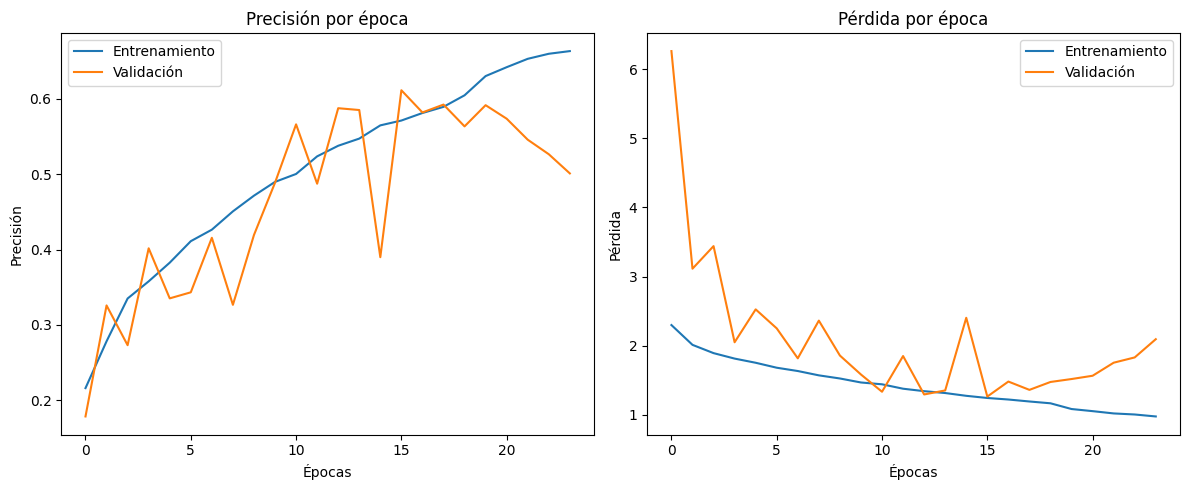

In [126]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 5))

# Precisión
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Entrenamiento')
plt.plot(epochs_range, val_acc, label='Validación')
plt.title('Precisión por época')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Pérdida
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Entrenamiento')
plt.plot(epochs_range, val_loss, label='Validación')
plt.title('Pérdida por época')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()


plt.tight_layout()
plt.show()



2025-06-19 23:03:33.787864: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:03:33.853254: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:03:33.864396: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:03:33.910549: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 37/117 [========>.....................] - ETA: 1s

2025-06-19 23:03:34.720716: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 50/117 [===========>..................] - ETA: 1s

2025-06-19 23:03:34.946197: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:03:35.054554: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 65/117 [===============>..............] - ETA: 0s

2025-06-19 23:03:35.203365: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


117/117 [==============================] - 2s 17ms/step
Classification Report:
              precision    recall  f1-score   support

        cane       0.68      0.20      0.31       388
     cavallo       0.78      0.53      0.63       373
    elefante       0.55      0.71      0.62       300
    farfalla       0.86      0.77      0.81       391
     gallina       0.86      0.63      0.72       404
       gatto       0.51      0.54      0.52       346
       mucca       0.61      0.36      0.46       366
      pecora       0.43      0.87      0.57       372
       ragno       0.63      0.80      0.70       415
  scoiattolo       0.57      0.71      0.63       377

    accuracy                           0.61      3732
   macro avg       0.65      0.61      0.60      3732
weighted avg       0.65      0.61      0.60      3732



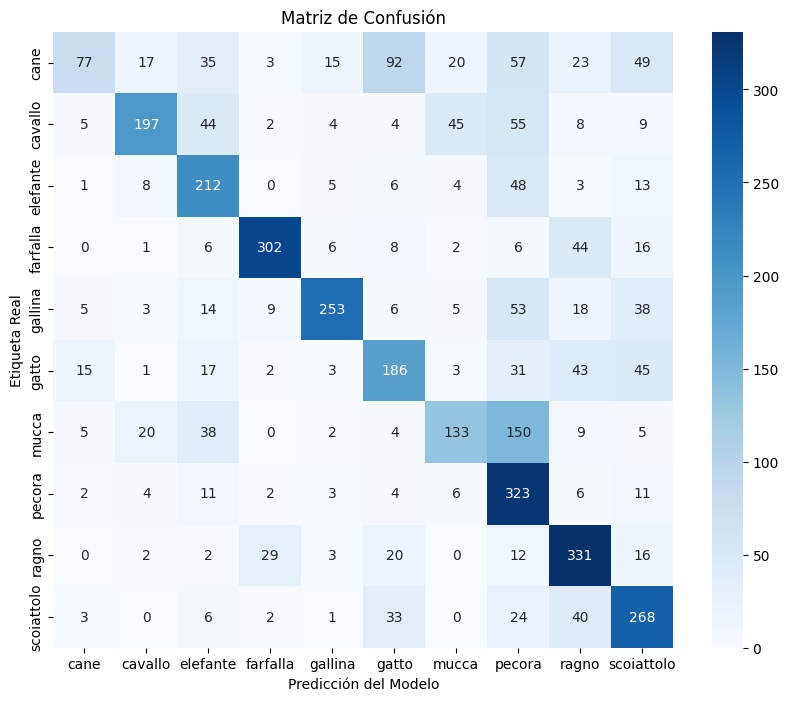

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener las etiquetas verdaderas y las predicciones
y_true = np.concatenate([y for x, y in val_ds], axis=0)
y_pred_probs = model.predict(val_ds)
y_pred = np.argmax(y_pred_probs, axis=1)

# Generar el Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# Generar la Matriz de Confusión
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicción del Modelo')
plt.ylabel('Etiqueta Real')
plt.title('Matriz de Confusión')
plt.show()



In [ ]:
from tensorflow.keras import layers, models, optimizers, callbacks, regularizers
from tensorflow.keras.models import Sequential


# ---------- MODELO ------------------------------------------------------
num_classes = len(class_names)


model_v2 = Sequential([
    # Bloque 1
    layers.Conv2D(32, (5, 5), activation='relu', padding='same',
                  input_shape=(224, 224, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    # Bloque 2
    layers.Conv2D(64, (5, 5), activation='relu', padding='same',
                  kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    # Bloque 3
    layers.Conv2D(128, (5, 5), activation='relu', padding='same',
                  kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    # Bloque 4
    layers.Conv2D(256, (5, 5), activation='relu', padding='same',
                  kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    # Bloque 5
    layers.Conv2D(512, (5, 5), activation='relu', padding='same',
                  kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    # Bloque 6
    layers.Conv2D(1024, (5, 5), activation='relu', padding='same',
                  kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model_v2.compile(
    optimizer=optimizers.Adam(1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


model_v2.compile(
    optimizer=tf.keras.optimizers.Adam(1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_v2 = model_v2.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    callbacks=[
        tf.keras.callbacks.ReduceLROnPlateau(patience=3, factor=0.5),
        tf.keras.callbacks.EarlyStopping(patience=8, restore_best_weights=True)
    ]
)

Epoch 1/50
 29/467 [>.............................] - ETA: 59s - loss: 4.2845 - accuracy: 0.1886

2025-06-19 22:00:40.057822: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 39/467 [=>............................] - ETA: 58s - loss: 4.1820 - accuracy: 0.1931

2025-06-19 22:00:41.406330: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


127/467 [=======>......................] - ETA: 46s - loss: 3.7289 - accuracy: 0.2505

2025-06-19 22:00:53.386619: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


136/467 [=======>......................] - ETA: 44s - loss: 3.7085 - accuracy: 0.2528

2025-06-19 22:00:54.599975: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


229/467 [=============>................] - ETA: 32s - loss: 3.5380 - accuracy: 0.2836

2025-06-19 22:01:07.264543: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


236/467 [==============>...............] - ETA: 31s - loss: 3.5301 - accuracy: 0.2856

2025-06-19 22:01:08.223924: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


251/467 [===============>..............] - ETA: 29s - loss: 3.5071 - accuracy: 0.2907

2025-06-19 22:01:10.299431: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


285/467 [=================>............] - ETA: 24s - loss: 3.4712 - accuracy: 0.2965

2025-06-19 22:01:14.933089: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 22:01:15.081448: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


302/467 [==================>...........] - ETA: 22s - loss: 3.4517 - accuracy: 0.3012

2025-06-19 22:01:17.267003: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 22:01:17.400829: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


339/467 [====================>.........] - ETA: 17s - loss: 3.4043 - accuracy: 0.3135

2025-06-19 22:01:22.308600: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


360/467 [======================>.......] - ETA: 14s - loss: 3.3813 - accuracy: 0.3200

2025-06-19 22:01:25.180165: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


364/467 [======================>.......] - ETA: 14s - loss: 3.3778 - accuracy: 0.3201

2025-06-19 22:01:25.736106: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


369/467 [======================>.......] - ETA: 13s - loss: 3.3710 - accuracy: 0.3227

2025-06-19 22:01:26.427675: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


389/467 [=======================>......] - ETA: 10s - loss: 3.3481 - accuracy: 0.3285

2025-06-19 22:01:29.155043: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


407/467 [=========================>....] - ETA: 8s - loss: 3.3287 - accuracy: 0.3335

2025-06-19 22:01:31.606254: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


418/467 [=========================>....] - ETA: 6s - loss: 3.3189 - accuracy: 0.3360

2025-06-19 22:01:33.119622: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - ETA: 0s - loss: 3.2737 - accuracy: 0.3476

2025-06-19 22:01:44.800697: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 22:01:45.226543: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 22:01:45.423149: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 22:01:45.684396: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - 81s 156ms/step - loss: 3.2737 - accuracy: 0.3476 - val_loss: 3.2985 - val_accuracy: 0.3151 - lr: 1.0000e-04
Epoch 2/50
  5/467 [..............................] - ETA: 1:05 - loss: 2.7314 - accuracy: 0.4750

2025-06-19 22:01:49.978352: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  7/467 [..............................] - ETA: 1:04 - loss: 2.6599 - accuracy: 0.5045

2025-06-19 22:01:50.212150: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 12/467 [..............................] - ETA: 1:04 - loss: 2.7239 - accuracy: 0.4766

2025-06-19 22:01:50.918612: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 14/467 [..............................] - ETA: 1:03 - loss: 2.7213 - accuracy: 0.4844

2025-06-19 22:01:51.226807: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 45/467 [=>............................] - ETA: 58s - loss: 2.8113 - accuracy: 0.4632

2025-06-19 22:01:55.420508: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 70/467 [===>..........................] - ETA: 54s - loss: 2.8219 - accuracy: 0.4625

2025-06-19 22:01:58.868533: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


106/467 [=====>........................] - ETA: 49s - loss: 2.8014 - accuracy: 0.4652

2025-06-19 22:02:03.814069: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


136/467 [=======>......................] - ETA: 45s - loss: 2.7850 - accuracy: 0.4729

2025-06-19 22:02:07.946317: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


176/467 [==========>...................] - ETA: 39s - loss: 2.7809 - accuracy: 0.4719

2025-06-19 22:02:13.391734: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


203/467 [============>.................] - ETA: 36s - loss: 2.7804 - accuracy: 0.4749

2025-06-19 22:02:17.088721: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


243/467 [==============>...............] - ETA: 30s - loss: 2.7669 - accuracy: 0.4807

2025-06-19 22:02:22.568280: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


263/467 [===============>..............] - ETA: 27s - loss: 2.7623 - accuracy: 0.4818

2025-06-19 22:02:25.310483: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


275/467 [================>.............] - ETA: 26s - loss: 2.7588 - accuracy: 0.4833

2025-06-19 22:02:26.967750: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


326/467 [===================>..........] - ETA: 19s - loss: 2.7456 - accuracy: 0.4882

2025-06-19 22:02:33.944968: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


350/467 [=====================>........] - ETA: 16s - loss: 2.7325 - accuracy: 0.4925

2025-06-19 22:02:37.245993: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


399/467 [========================>.....] - ETA: 9s - loss: 2.7174 - accuracy: 0.4969

2025-06-19 22:02:43.983315: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


405/467 [=========================>....] - ETA: 8s - loss: 2.7166 - accuracy: 0.4968

2025-06-19 22:02:44.792158: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


427/467 [==========================>...] - ETA: 5s - loss: 2.7081 - accuracy: 0.4991

2025-06-19 22:02:47.857322: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - ETA: 0s - loss: 2.6896 - accuracy: 0.5052

2025-06-19 22:02:54.302607: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 22:02:54.729854: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 22:02:54.919648: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 22:02:55.186272: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - 68s 146ms/step - loss: 2.6896 - accuracy: 0.5052 - val_loss: 2.6532 - val_accuracy: 0.5051 - lr: 1.0000e-04
Epoch 3/50
 10/467 [..............................] - ETA: 1:04 - loss: 2.4089 - accuracy: 0.6000

2025-06-19 22:02:58.670702: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 36/467 [=>............................] - ETA: 59s - loss: 2.4627 - accuracy: 0.5642

2025-06-19 22:03:02.246831: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 44/467 [=>............................] - ETA: 58s - loss: 2.4743 - accuracy: 0.5668

2025-06-19 22:03:03.344293: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 99/467 [=====>........................] - ETA: 50s - loss: 2.4805 - accuracy: 0.5631

2025-06-19 22:03:10.870964: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


149/467 [========>.....................] - ETA: 43s - loss: 2.4615 - accuracy: 0.5705

2025-06-19 22:03:17.730221: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


172/467 [==========>...................] - ETA: 40s - loss: 2.4648 - accuracy: 0.5699

2025-06-19 22:03:20.898814: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 22:03:20.995489: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


221/467 [=============>................] - ETA: 33s - loss: 2.4601 - accuracy: 0.5701

2025-06-19 22:03:27.598909: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


250/467 [===============>..............] - ETA: 29s - loss: 2.4553 - accuracy: 0.5707

2025-06-19 22:03:31.573002: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


302/467 [==================>...........] - ETA: 22s - loss: 2.4490 - accuracy: 0.5734

2025-06-19 22:03:38.728758: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


305/467 [==================>...........] - ETA: 22s - loss: 2.4490 - accuracy: 0.5745

2025-06-19 22:03:39.125491: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


375/467 [=======================>......] - ETA: 12s - loss: 2.4317 - accuracy: 0.5779

2025-06-19 22:03:48.718535: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


385/467 [=======================>......] - ETA: 11s - loss: 2.4282 - accuracy: 0.5791

2025-06-19 22:03:50.085507: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


390/467 [========================>.....] - ETA: 10s - loss: 2.4252 - accuracy: 0.5804

2025-06-19 22:03:50.763872: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


404/467 [========================>.....] - ETA: 8s - loss: 2.4228 - accuracy: 0.5817

2025-06-19 22:03:52.680585: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


411/467 [=========================>....] - ETA: 7s - loss: 2.4210 - accuracy: 0.5818

2025-06-19 22:03:53.644005: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


414/467 [=========================>....] - ETA: 7s - loss: 2.4206 - accuracy: 0.5820

2025-06-19 22:03:54.047312: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


439/467 [===========================>..] - ETA: 3s - loss: 2.4190 - accuracy: 0.5812

2025-06-19 22:03:57.469549: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - ETA: 0s - loss: 2.4074 - accuracy: 0.5842

2025-06-19 22:04:02.312403: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 22:04:02.736150: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 22:04:02.935369: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 22:04:03.196283: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - 68s 145ms/step - loss: 2.4074 - accuracy: 0.5842 - val_loss: 2.4085 - val_accuracy: 0.5686 - lr: 1.0000e-04
Epoch 4/50
 16/467 [>.............................] - ETA: 1:02 - loss: 2.2803 - accuracy: 0.6074

2025-06-19 22:04:07.511240: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 18/467 [>.............................] - ETA: 1:02 - loss: 2.2488 - accuracy: 0.6198

2025-06-19 22:04:07.781349: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 37/467 [=>............................] - ETA: 59s - loss: 2.2727 - accuracy: 0.6132

2025-06-19 22:04:10.421137: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 58/467 [==>...........................] - ETA: 56s - loss: 2.2749 - accuracy: 0.6115

2025-06-19 22:04:13.268058: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 61/467 [==>...........................] - ETA: 55s - loss: 2.2688 - accuracy: 0.6107

2025-06-19 22:04:13.688524: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


107/467 [=====>........................] - ETA: 49s - loss: 2.2355 - accuracy: 0.6297

2025-06-19 22:04:20.002691: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


123/467 [======>.......................] - ETA: 47s - loss: 2.2399 - accuracy: 0.6270

2025-06-19 22:04:22.196611: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


152/467 [========>.....................] - ETA: 43s - loss: 2.2437 - accuracy: 0.6236

2025-06-19 22:04:26.159908: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


173/467 [==========>...................] - ETA: 40s - loss: 2.2467 - accuracy: 0.6225

2025-06-19 22:04:29.052884: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


252/467 [===============>..............] - ETA: 29s - loss: 2.2288 - accuracy: 0.6255

2025-06-19 22:04:39.877484: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


271/467 [================>.............] - ETA: 26s - loss: 2.2248 - accuracy: 0.6278

2025-06-19 22:04:42.484815: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


284/467 [=================>............] - ETA: 25s - loss: 2.2224 - accuracy: 0.6286

2025-06-19 22:04:44.271162: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


318/467 [===================>..........] - ETA: 20s - loss: 2.2143 - accuracy: 0.6282

2025-06-19 22:04:48.941476: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


383/467 [=======================>......] - ETA: 11s - loss: 2.2099 - accuracy: 0.6270

2025-06-19 22:04:57.870738: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


400/467 [========================>.....] - ETA: 9s - loss: 2.2056 - accuracy: 0.6285

2025-06-19 22:05:00.216833: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


402/467 [========================>.....] - ETA: 8s - loss: 2.2053 - accuracy: 0.6285

2025-06-19 22:05:00.495377: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


420/467 [=========================>....] - ETA: 6s - loss: 2.2025 - accuracy: 0.6293

2025-06-19 22:05:03.025515: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


436/467 [===========================>..] - ETA: 4s - loss: 2.1946 - accuracy: 0.6318

2025-06-19 22:05:05.177575: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - ETA: 0s - loss: 2.1905 - accuracy: 0.6321

2025-06-19 22:05:10.397397: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 22:05:10.821543: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 22:05:11.020784: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 22:05:11.285539: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - 68s 146ms/step - loss: 2.1905 - accuracy: 0.6321 - val_loss: 2.7213 - val_accuracy: 0.4957 - lr: 1.0000e-04
Epoch 5/50
  4/467 [..............................] - ETA: 1:06 - loss: 2.1816 - accuracy: 0.6094

2025-06-19 22:05:13.888937: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  6/467 [..............................] - ETA: 1:04 - loss: 2.1373 - accuracy: 0.6354

2025-06-19 22:05:14.211027: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 17/467 [>.............................] - ETA: 1:02 - loss: 2.0860 - accuracy: 0.6562

2025-06-19 22:05:15.681471: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 20/467 [>.............................] - ETA: 1:01 - loss: 2.0861 - accuracy: 0.6500

2025-06-19 22:05:16.085460: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 41/467 [=>............................] - ETA: 58s - loss: 2.0984 - accuracy: 0.6494

2025-06-19 22:05:18.965236: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 44/467 [=>............................] - ETA: 58s - loss: 2.0993 - accuracy: 0.6499

2025-06-19 22:05:19.382641: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 58/467 [==>...........................] - ETA: 56s - loss: 2.0798 - accuracy: 0.6525

2025-06-19 22:05:21.310308: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 77/467 [===>..........................] - ETA: 53s - loss: 2.0679 - accuracy: 0.6567

2025-06-19 22:05:23.953923: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 94/467 [=====>........................] - ETA: 51s - loss: 2.0596 - accuracy: 0.6536

2025-06-19 22:05:26.240875: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


121/467 [======>.......................] - ETA: 47s - loss: 2.0671 - accuracy: 0.6501

2025-06-19 22:05:29.937727: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


148/467 [========>.....................] - ETA: 43s - loss: 2.0621 - accuracy: 0.6495

2025-06-19 22:05:33.644050: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


163/467 [=========>....................] - ETA: 41s - loss: 2.0650 - accuracy: 0.6484

2025-06-19 22:05:35.693497: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


169/467 [=========>....................] - ETA: 40s - loss: 2.0660 - accuracy: 0.6487

2025-06-19 22:05:36.510384: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


173/467 [==========>...................] - ETA: 40s - loss: 2.0620 - accuracy: 0.6508

2025-06-19 22:05:37.065368: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


264/467 [===============>..............] - ETA: 27s - loss: 2.0440 - accuracy: 0.6581

2025-06-19 22:05:49.591952: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


289/467 [=================>............] - ETA: 24s - loss: 2.0404 - accuracy: 0.6571

2025-06-19 22:05:53.026932: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


371/467 [======================>.......] - ETA: 13s - loss: 2.0349 - accuracy: 0.6587

2025-06-19 22:06:04.233694: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


395/467 [========================>.....] - ETA: 9s - loss: 2.0296 - accuracy: 0.6604 

2025-06-19 22:06:07.515955: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - ETA: 0s - loss: 2.0165 - accuracy: 0.6631

2025-06-19 22:06:18.391970: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 22:06:18.818830: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 22:06:19.015551: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 22:06:19.284240: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - 68s 146ms/step - loss: 2.0165 - accuracy: 0.6631 - val_loss: 2.2126 - val_accuracy: 0.6203 - lr: 1.0000e-04
Epoch 6/50
 17/467 [>.............................] - ETA: 1:03 - loss: 1.9541 - accuracy: 0.6893

2025-06-19 22:06:23.796098: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 28/467 [>.............................] - ETA: 1:01 - loss: 1.9272 - accuracy: 0.6897

2025-06-19 22:06:25.254756: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 60/467 [==>...........................] - ETA: 56s - loss: 1.8971 - accuracy: 0.6948

2025-06-19 22:06:29.674303: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 71/467 [===>..........................] - ETA: 54s - loss: 1.9123 - accuracy: 0.6928

2025-06-19 22:06:31.142868: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


101/467 [=====>........................] - ETA: 50s - loss: 1.9107 - accuracy: 0.6921

2025-06-19 22:06:35.263280: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


107/467 [=====>........................] - ETA: 49s - loss: 1.9122 - accuracy: 0.6919

2025-06-19 22:06:36.121197: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/467 [======>.......................] - ETA: 48s - loss: 1.9126 - accuracy: 0.6900

2025-06-19 22:06:36.911193: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


196/467 [===========>..................] - ETA: 37s - loss: 1.8955 - accuracy: 0.6901

2025-06-19 22:06:48.363866: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


201/467 [===========>..................] - ETA: 36s - loss: 1.8926 - accuracy: 0.6915

2025-06-19 22:06:49.010783: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


284/467 [=================>............] - ETA: 25s - loss: 1.8824 - accuracy: 0.6981

2025-06-19 22:07:00.419373: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


333/467 [====================>.........] - ETA: 18s - loss: 1.8703 - accuracy: 0.7014

2025-06-19 22:07:07.175780: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


338/467 [====================>.........] - ETA: 17s - loss: 1.8708 - accuracy: 0.7009

2025-06-19 22:07:07.852730: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


392/467 [========================>.....] - ETA: 10s - loss: 1.8668 - accuracy: 0.7018

2025-06-19 22:07:15.246413: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


405/467 [=========================>....] - ETA: 8s - loss: 1.8654 - accuracy: 0.7021

2025-06-19 22:07:17.081280: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


420/467 [=========================>....] - ETA: 6s - loss: 1.8635 - accuracy: 0.7024

2025-06-19 22:07:19.107252: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


430/467 [==========================>...] - ETA: 5s - loss: 1.8619 - accuracy: 0.7024

2025-06-19 22:07:20.486205: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


444/467 [===========================>..] - ETA: 3s - loss: 1.8622 - accuracy: 0.7022

2025-06-19 22:07:22.403248: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


452/467 [============================>.] - ETA: 2s - loss: 1.8618 - accuracy: 0.7025

2025-06-19 22:07:23.497506: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - ETA: 0s - loss: 1.8605 - accuracy: 0.7026

2025-06-19 22:07:26.531270: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 22:07:26.952521: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 22:07:27.152050: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 22:07:27.410227: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - 68s 146ms/step - loss: 1.8605 - accuracy: 0.7026 - val_loss: 2.3048 - val_accuracy: 0.5884 - lr: 1.0000e-04
Epoch 7/50
 83/467 [====>.........................] - ETA: 52s - loss: 1.7727 - accuracy: 0.7093

2025-06-19 22:07:40.816944: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 95/467 [=====>........................] - ETA: 50s - loss: 1.7563 - accuracy: 0.7135

2025-06-19 22:07:42.448421: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


107/467 [=====>........................] - ETA: 49s - loss: 1.7548 - accuracy: 0.7147

2025-06-19 22:07:44.116654: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


110/467 [======>.......................] - ETA: 48s - loss: 1.7502 - accuracy: 0.7156

2025-06-19 22:07:44.518286: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


168/467 [=========>....................] - ETA: 40s - loss: 1.7339 - accuracy: 0.7234

2025-06-19 22:07:52.489049: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


188/467 [===========>..................] - ETA: 38s - loss: 1.7318 - accuracy: 0.7242

2025-06-19 22:07:55.196773: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


195/467 [===========>..................] - ETA: 37s - loss: 1.7279 - accuracy: 0.7250

2025-06-19 22:07:56.159031: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


249/467 [==============>...............] - ETA: 29s - loss: 1.7364 - accuracy: 0.7218

2025-06-19 22:08:03.581681: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


253/467 [===============>..............] - ETA: 29s - loss: 1.7389 - accuracy: 0.7200

2025-06-19 22:08:04.127482: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


286/467 [=================>............] - ETA: 24s - loss: 1.7395 - accuracy: 0.7195

2025-06-19 22:08:08.633062: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


311/467 [==================>...........] - ETA: 21s - loss: 1.7397 - accuracy: 0.7201

2025-06-19 22:08:12.090273: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


327/467 [====================>.........] - ETA: 19s - loss: 1.7368 - accuracy: 0.7209

2025-06-19 22:08:14.271093: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


350/467 [=====================>........] - ETA: 16s - loss: 1.7353 - accuracy: 0.7215

2025-06-19 22:08:17.412438: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


378/467 [=======================>......] - ETA: 12s - loss: 1.7377 - accuracy: 0.7197

2025-06-19 22:08:21.278631: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


388/467 [=======================>......] - ETA: 10s - loss: 1.7388 - accuracy: 0.7193

2025-06-19 22:08:22.656626: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


407/467 [=========================>....] - ETA: 8s - loss: 1.7345 - accuracy: 0.7207

2025-06-19 22:08:25.265084: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


412/467 [=========================>....] - ETA: 7s - loss: 1.7337 - accuracy: 0.7213

2025-06-19 22:08:25.942644: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


463/467 [============================>.] - ETA: 0s - loss: 1.7306 - accuracy: 0.7210

2025-06-19 22:08:32.948057: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - ETA: 0s - loss: 1.7303 - accuracy: 0.7210

2025-06-19 22:08:34.460298: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 22:08:34.884670: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 22:08:35.081232: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 22:08:35.341955: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - 68s 145ms/step - loss: 1.7303 - accuracy: 0.7210 - val_loss: 1.8790 - val_accuracy: 0.6664 - lr: 1.0000e-04
Epoch 8/50
  3/467 [..............................] - ETA: 1:05 - loss: 1.5309 - accuracy: 0.7708

2025-06-19 22:08:37.878568: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 14/467 [..............................] - ETA: 1:03 - loss: 1.6311 - accuracy: 0.7455

2025-06-19 22:08:39.382556: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 48/467 [==>...........................] - ETA: 57s - loss: 1.6435 - accuracy: 0.7422

2025-06-19 22:08:44.019135: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 56/467 [==>...........................] - ETA: 56s - loss: 1.6361 - accuracy: 0.7450

2025-06-19 22:08:45.136551: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


128/467 [=======>......................] - ETA: 46s - loss: 1.6592 - accuracy: 0.7385

2025-06-19 22:08:55.002548: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 22:08:55.003279: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


142/467 [========>.....................] - ETA: 44s - loss: 1.6547 - accuracy: 0.7394

2025-06-19 22:08:56.924017: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


166/467 [=========>....................] - ETA: 41s - loss: 1.6436 - accuracy: 0.7428

2025-06-19 22:09:00.242614: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


194/467 [===========>..................] - ETA: 37s - loss: 1.6410 - accuracy: 0.7434

2025-06-19 22:09:04.085121: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


218/467 [=============>................] - ETA: 34s - loss: 1.6394 - accuracy: 0.7428

2025-06-19 22:09:07.382959: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


220/467 [=============>................] - ETA: 33s - loss: 1.6408 - accuracy: 0.7423

2025-06-19 22:09:07.666339: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


237/467 [==============>...............] - ETA: 31s - loss: 1.6400 - accuracy: 0.7404

2025-06-19 22:09:10.020711: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


285/467 [=================>............] - ETA: 24s - loss: 1.6358 - accuracy: 0.7423

2025-06-19 22:09:16.561855: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


289/467 [=================>............] - ETA: 24s - loss: 1.6356 - accuracy: 0.7419

2025-06-19 22:09:17.110070: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


371/467 [======================>.......] - ETA: 13s - loss: 1.6288 - accuracy: 0.7414

2025-06-19 22:09:28.326531: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


382/467 [=======================>......] - ETA: 11s - loss: 1.6282 - accuracy: 0.7423

2025-06-19 22:09:29.838401: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


401/467 [========================>.....] - ETA: 9s - loss: 1.6225 - accuracy: 0.7440

2025-06-19 22:09:32.440861: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


411/467 [=========================>....] - ETA: 7s - loss: 1.6216 - accuracy: 0.7444

2025-06-19 22:09:33.817612: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - ETA: 0s - loss: 1.6201 - accuracy: 0.7442

2025-06-19 22:09:42.421398: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 22:09:42.844405: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 22:09:43.039986: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 22:09:43.300914: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - 68s 145ms/step - loss: 1.6201 - accuracy: 0.7442 - val_loss: 2.0350 - val_accuracy: 0.6281 - lr: 1.0000e-04
Epoch 9/50
 20/467 [>.............................] - ETA: 1:02 - loss: 1.5009 - accuracy: 0.7859

2025-06-19 22:09:48.151773: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 44/467 [=>............................] - ETA: 58s - loss: 1.5406 - accuracy: 0.7720

2025-06-19 22:09:51.410159: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 60/467 [==>...........................] - ETA: 56s - loss: 1.5392 - accuracy: 0.7641

2025-06-19 22:09:53.616012: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


136/467 [=======>......................] - ETA: 45s - loss: 1.5408 - accuracy: 0.7642

2025-06-19 22:10:04.045633: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


155/467 [========>.....................] - ETA: 42s - loss: 1.5403 - accuracy: 0.7633

2025-06-19 22:10:06.640654: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


157/467 [=========>....................] - ETA: 42s - loss: 1.5403 - accuracy: 0.7633

2025-06-19 22:10:06.909944: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


228/467 [=============>................] - ETA: 32s - loss: 1.5275 - accuracy: 0.7662

2025-06-19 22:10:16.630414: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


272/467 [================>.............] - ETA: 26s - loss: 1.5241 - accuracy: 0.7662

2025-06-19 22:10:22.679755: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


278/467 [================>.............] - ETA: 25s - loss: 1.5229 - accuracy: 0.7665

2025-06-19 22:10:23.561169: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 22:10:23.655435: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


297/467 [==================>...........] - ETA: 23s - loss: 1.5249 - accuracy: 0.7664

2025-06-19 22:10:26.160401: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


328/467 [====================>.........] - ETA: 19s - loss: 1.5245 - accuracy: 0.7658

2025-06-19 22:10:30.409374: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


340/467 [====================>.........] - ETA: 17s - loss: 1.5260 - accuracy: 0.7657

2025-06-19 22:10:32.039949: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


349/467 [=====================>........] - ETA: 16s - loss: 1.5257 - accuracy: 0.7655

2025-06-19 22:10:33.270150: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


371/467 [======================>.......] - ETA: 13s - loss: 1.5240 - accuracy: 0.7650

2025-06-19 22:10:36.256408: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


386/467 [=======================>......] - ETA: 11s - loss: 1.5265 - accuracy: 0.7638

2025-06-19 22:10:38.308843: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


398/467 [========================>.....] - ETA: 9s - loss: 1.5236 - accuracy: 0.7644

2025-06-19 22:10:40.004800: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


439/467 [===========================>..] - ETA: 3s - loss: 1.5222 - accuracy: 0.7647

2025-06-19 22:10:45.570212: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - ETA: 0s - loss: 1.5227 - accuracy: 0.7643

2025-06-19 22:10:50.364900: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 22:10:50.787712: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 22:10:50.981929: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 22:10:51.244253: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - 68s 145ms/step - loss: 1.5227 - accuracy: 0.7643 - val_loss: 1.6296 - val_accuracy: 0.7264 - lr: 1.0000e-04
Epoch 10/50
  9/467 [..............................] - ETA: 1:05 - loss: 1.3411 - accuracy: 0.8090

2025-06-19 22:10:54.632978: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 13/467 [..............................] - ETA: 1:03 - loss: 1.3834 - accuracy: 0.7981

2025-06-19 22:10:55.153849: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 91/467 [====>.........................] - ETA: 51s - loss: 1.4029 - accuracy: 0.7943

2025-06-19 22:11:05.823998: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


105/467 [=====>........................] - ETA: 49s - loss: 1.3999 - accuracy: 0.7958

2025-06-19 22:11:07.732292: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


115/467 [======>.......................] - ETA: 48s - loss: 1.4174 - accuracy: 0.7916

2025-06-19 22:11:09.118609: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


121/467 [======>.......................] - ETA: 47s - loss: 1.4139 - accuracy: 0.7939

2025-06-19 22:11:09.975805: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


127/467 [=======>......................] - ETA: 46s - loss: 1.4128 - accuracy: 0.7943

2025-06-19 22:11:10.762831: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


193/467 [===========>..................] - ETA: 37s - loss: 1.4299 - accuracy: 0.7897

2025-06-19 22:11:19.853219: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


198/467 [===========>..................] - ETA: 36s - loss: 1.4301 - accuracy: 0.7896

2025-06-19 22:11:20.542843: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


200/467 [===========>..................] - ETA: 36s - loss: 1.4305 - accuracy: 0.7894

2025-06-19 22:11:20.834654: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


280/467 [================>.............] - ETA: 25s - loss: 1.4335 - accuracy: 0.7900

2025-06-19 22:11:31.800374: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


285/467 [=================>............] - ETA: 25s - loss: 1.4321 - accuracy: 0.7902

2025-06-19 22:11:32.472670: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


324/467 [===================>..........] - ETA: 19s - loss: 1.4328 - accuracy: 0.7887

2025-06-19 22:11:37.828561: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


366/467 [======================>.......] - ETA: 13s - loss: 1.4381 - accuracy: 0.7862

2025-06-19 22:11:43.601588: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


369/467 [======================>.......] - ETA: 13s - loss: 1.4386 - accuracy: 0.7865

2025-06-19 22:11:43.975774: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


413/467 [=========================>....] - ETA: 7s - loss: 1.4371 - accuracy: 0.7853

2025-06-19 22:11:50.025720: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


438/467 [===========================>..] - ETA: 3s - loss: 1.4401 - accuracy: 0.7841

2025-06-19 22:11:53.431527: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


447/467 [===========================>..] - ETA: 2s - loss: 1.4387 - accuracy: 0.7845

2025-06-19 22:11:54.677420: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - ETA: 0s - loss: 1.4386 - accuracy: 0.7846

2025-06-19 22:11:58.391025: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 22:11:58.809324: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 22:11:59.005485: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 22:11:59.269249: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - 68s 145ms/step - loss: 1.4386 - accuracy: 0.7846 - val_loss: 1.7455 - val_accuracy: 0.6969 - lr: 1.0000e-04
Epoch 11/50
 30/467 [>.............................] - ETA: 1:01 - loss: 1.3909 - accuracy: 0.7802

2025-06-19 22:12:05.495228: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 52/467 [==>...........................] - ETA: 57s - loss: 1.3857 - accuracy: 0.7782

2025-06-19 22:12:08.489451: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/467 [======>.......................] - ETA: 48s - loss: 1.3919 - accuracy: 0.7843

2025-06-19 22:12:16.833966: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


118/467 [======>.......................] - ETA: 47s - loss: 1.3905 - accuracy: 0.7850

2025-06-19 22:12:17.531220: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


135/467 [=======>......................] - ETA: 45s - loss: 1.3794 - accuracy: 0.7900

2025-06-19 22:12:19.895041: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


143/467 [========>.....................] - ETA: 44s - loss: 1.3781 - accuracy: 0.7909

2025-06-19 22:12:20.956637: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


167/467 [=========>....................] - ETA: 41s - loss: 1.3713 - accuracy: 0.7930

2025-06-19 22:12:24.262281: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


178/467 [==========>...................] - ETA: 39s - loss: 1.3784 - accuracy: 0.7914

2025-06-19 22:12:25.777863: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


203/467 [============>.................] - ETA: 36s - loss: 1.3730 - accuracy: 0.7943

2025-06-19 22:12:29.192523: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


205/467 [============>.................] - ETA: 36s - loss: 1.3715 - accuracy: 0.7954

2025-06-19 22:12:29.484320: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


233/467 [=============>................] - ETA: 32s - loss: 1.3830 - accuracy: 0.7933

2025-06-19 22:12:33.307747: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


250/467 [===============>..............] - ETA: 29s - loss: 1.3836 - accuracy: 0.7933

2025-06-19 22:12:35.623876: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


301/467 [==================>...........] - ETA: 22s - loss: 1.3800 - accuracy: 0.7954

2025-06-19 22:12:42.619084: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


348/467 [=====================>........] - ETA: 16s - loss: 1.3806 - accuracy: 0.7945

2025-06-19 22:12:49.109377: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


380/467 [=======================>......] - ETA: 11s - loss: 1.3800 - accuracy: 0.7947

2025-06-19 22:12:53.469750: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


399/467 [========================>.....] - ETA: 9s - loss: 1.3782 - accuracy: 0.7949

2025-06-19 22:12:56.088329: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


416/467 [=========================>....] - ETA: 7s - loss: 1.3759 - accuracy: 0.7964

2025-06-19 22:12:58.475070: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


452/467 [============================>.] - ETA: 2s - loss: 1.3757 - accuracy: 0.7969

2025-06-19 22:13:03.387983: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - ETA: 0s - loss: 1.3743 - accuracy: 0.7974

2025-06-19 22:13:06.402738: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 22:13:06.826594: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 22:13:07.022052: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 22:13:07.280966: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - 68s 145ms/step - loss: 1.3743 - accuracy: 0.7974 - val_loss: 1.6865 - val_accuracy: 0.6937 - lr: 1.0000e-04
Epoch 12/50
  4/467 [..............................] - ETA: 1:03 - loss: 1.2358 - accuracy: 0.8516

2025-06-19 22:13:09.877712: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 18/467 [>.............................] - ETA: 1:02 - loss: 1.3019 - accuracy: 0.8229

2025-06-19 22:13:11.833455: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 38/467 [=>............................] - ETA: 59s - loss: 1.3227 - accuracy: 0.8084

2025-06-19 22:13:14.581581: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 63/467 [===>..........................] - ETA: 55s - loss: 1.3174 - accuracy: 0.8115

2025-06-19 22:13:18.015883: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 67/467 [===>..........................] - ETA: 55s - loss: 1.3201 - accuracy: 0.8097

2025-06-19 22:13:18.558754: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 86/467 [====>.........................] - ETA: 52s - loss: 1.3319 - accuracy: 0.8060

2025-06-19 22:13:21.167766: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 92/467 [====>.........................] - ETA: 51s - loss: 1.3294 - accuracy: 0.8074

2025-06-19 22:13:22.042383: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


110/467 [======>.......................] - ETA: 49s - loss: 1.3231 - accuracy: 0.8082

2025-06-19 22:13:24.454717: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 22:13:24.599167: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


122/467 [======>.......................] - ETA: 47s - loss: 1.3209 - accuracy: 0.8087

2025-06-19 22:13:26.101968: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


133/467 [=======>......................] - ETA: 45s - loss: 1.3194 - accuracy: 0.8071

2025-06-19 22:13:27.603205: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


143/467 [========>.....................] - ETA: 44s - loss: 1.3196 - accuracy: 0.8068

2025-06-19 22:13:28.974262: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


303/467 [==================>...........] - ETA: 22s - loss: 1.3252 - accuracy: 0.8058

2025-06-19 22:13:50.928421: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


305/467 [==================>...........] - ETA: 22s - loss: 1.3256 - accuracy: 0.8055

2025-06-19 22:13:51.198845: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


329/467 [====================>.........] - ETA: 18s - loss: 1.3292 - accuracy: 0.8047

2025-06-19 22:13:54.472352: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 22:13:54.485319: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


349/467 [=====================>........] - ETA: 16s - loss: 1.3278 - accuracy: 0.8059

2025-06-19 22:13:57.206196: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


383/467 [=======================>......] - ETA: 11s - loss: 1.3271 - accuracy: 0.8065

2025-06-19 22:14:01.832772: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - ETA: 0s - loss: 1.3270 - accuracy: 0.8066

2025-06-19 22:14:14.305423: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 22:14:14.731924: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 22:14:14.927573: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 22:14:15.192313: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - 68s 145ms/step - loss: 1.3270 - accuracy: 0.8066 - val_loss: 1.7503 - val_accuracy: 0.6913 - lr: 1.0000e-04
Epoch 13/50
 13/467 [..............................] - ETA: 1:03 - loss: 1.2179 - accuracy: 0.8606

2025-06-19 22:14:19.102499: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 50/467 [==>...........................] - ETA: 57s - loss: 1.2083 - accuracy: 0.8544

2025-06-19 22:14:24.194428: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 54/467 [==>...........................] - ETA: 57s - loss: 1.2036 - accuracy: 0.8553

2025-06-19 22:14:24.742644: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 69/467 [===>..........................] - ETA: 54s - loss: 1.1887 - accuracy: 0.8596

2025-06-19 22:14:26.764155: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 71/467 [===>..........................] - ETA: 54s - loss: 1.1863 - accuracy: 0.8605

2025-06-19 22:14:27.022322: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 84/467 [====>.........................] - ETA: 52s - loss: 1.1771 - accuracy: 0.8583

2025-06-19 22:14:28.786764: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/467 [=====>........................] - ETA: 49s - loss: 1.1937 - accuracy: 0.8527

2025-06-19 22:14:32.073692: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 22:14:32.217289: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 22:14:32.217788: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


116/467 [======>.......................] - ETA: 48s - loss: 1.1896 - accuracy: 0.8518

2025-06-19 22:14:33.181238: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


131/467 [=======>......................] - ETA: 46s - loss: 1.1878 - accuracy: 0.8516

2025-06-19 22:14:35.230924: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


296/467 [==================>...........] - ETA: 23s - loss: 1.1709 - accuracy: 0.8528

2025-06-19 22:14:57.843905: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


344/467 [=====================>........] - ETA: 16s - loss: 1.1738 - accuracy: 0.8507

2025-06-19 22:15:04.456311: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


351/467 [=====================>........] - ETA: 15s - loss: 1.1744 - accuracy: 0.8506

2025-06-19 22:15:05.435263: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


373/467 [======================>.......] - ETA: 12s - loss: 1.1734 - accuracy: 0.8504

2025-06-19 22:15:08.415600: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


390/467 [========================>.....] - ETA: 10s - loss: 1.1737 - accuracy: 0.8505

2025-06-19 22:15:10.737026: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


409/467 [=========================>....] - ETA: 7s - loss: 1.1724 - accuracy: 0.8504

2025-06-19 22:15:13.349693: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


458/467 [============================>.] - ETA: 1s - loss: 1.1724 - accuracy: 0.8500

2025-06-19 22:15:20.099660: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - ETA: 0s - loss: 1.1718 - accuracy: 0.8500

2025-06-19 22:15:22.309200: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 22:15:22.733342: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 22:15:22.928141: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 22:15:23.195538: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - 68s 146ms/step - loss: 1.1718 - accuracy: 0.8500 - val_loss: 1.5296 - val_accuracy: 0.7564 - lr: 5.0000e-05
Epoch 14/50
 53/467 [==>...........................] - ETA: 57s - loss: 1.0979 - accuracy: 0.8732

2025-06-19 22:15:32.604905: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 81/467 [====>.........................] - ETA: 53s - loss: 1.0989 - accuracy: 0.8727

2025-06-19 22:15:36.441019: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 22:15:36.453527: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 22:15:36.596710: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


127/467 [=======>......................] - ETA: 46s - loss: 1.0900 - accuracy: 0.8745

2025-06-19 22:15:42.752802: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


142/467 [========>.....................] - ETA: 44s - loss: 1.0935 - accuracy: 0.8726

2025-06-19 22:15:44.795742: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


195/467 [===========>..................] - ETA: 37s - loss: 1.0959 - accuracy: 0.8699

2025-06-19 22:15:52.065028: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


250/467 [===============>..............] - ETA: 29s - loss: 1.0968 - accuracy: 0.8699

2025-06-19 22:15:59.577962: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


268/467 [================>.............] - ETA: 27s - loss: 1.0965 - accuracy: 0.8702

2025-06-19 22:16:02.036752: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


291/467 [=================>............] - ETA: 24s - loss: 1.0991 - accuracy: 0.8689

2025-06-19 22:16:05.176070: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


300/467 [==================>...........] - ETA: 22s - loss: 1.1016 - accuracy: 0.8680

2025-06-19 22:16:06.414846: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


319/467 [===================>..........] - ETA: 20s - loss: 1.1015 - accuracy: 0.8682

2025-06-19 22:16:09.037596: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


333/467 [====================>.........] - ETA: 18s - loss: 1.1014 - accuracy: 0.8679

2025-06-19 22:16:10.947437: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


403/467 [========================>.....] - ETA: 8s - loss: 1.0989 - accuracy: 0.8681

2025-06-19 22:16:20.550440: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


409/467 [=========================>....] - ETA: 7s - loss: 1.1001 - accuracy: 0.8679

2025-06-19 22:16:21.367430: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


435/467 [==========================>...] - ETA: 4s - loss: 1.1027 - accuracy: 0.8674

2025-06-19 22:16:24.948463: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 22:16:24.949111: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


437/467 [===========================>..] - ETA: 4s - loss: 1.1019 - accuracy: 0.8676

2025-06-19 22:16:25.219761: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - ETA: 0s - loss: 1.1007 - accuracy: 0.8681

2025-06-19 22:16:30.299409: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 22:16:30.722588: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 22:16:30.916928: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 22:16:31.186553: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - 68s 145ms/step - loss: 1.1007 - accuracy: 0.8681 - val_loss: 1.6517 - val_accuracy: 0.7243 - lr: 5.0000e-05
Epoch 15/50
  1/467 [..............................] - ETA: 1:22 - loss: 1.0838 - accuracy: 0.8438

2025-06-19 22:16:33.417958: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 11/467 [..............................] - ETA: 1:04 - loss: 1.0322 - accuracy: 0.8949

2025-06-19 22:16:34.769332: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 22/467 [>.............................] - ETA: 1:01 - loss: 1.0134 - accuracy: 0.8949

2025-06-19 22:16:36.284133: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 40/467 [=>............................] - ETA: 59s - loss: 1.0243 - accuracy: 0.8891

2025-06-19 22:16:38.755844: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


149/467 [========>.....................] - ETA: 43s - loss: 1.0330 - accuracy: 0.8819

2025-06-19 22:16:53.733060: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


152/467 [========>.....................] - ETA: 43s - loss: 1.0315 - accuracy: 0.8824

2025-06-19 22:16:54.141751: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


171/467 [=========>....................] - ETA: 40s - loss: 1.0314 - accuracy: 0.8836

2025-06-19 22:16:56.762491: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


195/467 [===========>..................] - ETA: 37s - loss: 1.0300 - accuracy: 0.8830

2025-06-19 22:17:00.066237: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


219/467 [=============>................] - ETA: 34s - loss: 1.0361 - accuracy: 0.8809

2025-06-19 22:17:03.362828: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


257/467 [===============>..............] - ETA: 28s - loss: 1.0428 - accuracy: 0.8794

2025-06-19 22:17:08.560856: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


259/467 [===============>..............] - ETA: 28s - loss: 1.0418 - accuracy: 0.8798

2025-06-19 22:17:08.831890: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


278/467 [================>.............] - ETA: 25s - loss: 1.0401 - accuracy: 0.8806

2025-06-19 22:17:11.503203: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


280/467 [================>.............] - ETA: 25s - loss: 1.0398 - accuracy: 0.8809

2025-06-19 22:17:11.741781: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


344/467 [=====================>........] - ETA: 16s - loss: 1.0383 - accuracy: 0.8814

2025-06-19 22:17:20.551699: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


387/467 [=======================>......] - ETA: 11s - loss: 1.0363 - accuracy: 0.8821

2025-06-19 22:17:26.457858: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


390/467 [========================>.....] - ETA: 10s - loss: 1.0370 - accuracy: 0.8818

2025-06-19 22:17:26.871195: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


402/467 [========================>.....] - ETA: 8s - loss: 1.0374 - accuracy: 0.8812

2025-06-19 22:17:28.515592: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


420/467 [=========================>....] - ETA: 6s - loss: 1.0383 - accuracy: 0.8801

2025-06-19 22:17:30.960471: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - ETA: 0s - loss: 1.0418 - accuracy: 0.8787

2025-06-19 22:17:38.393497: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 22:17:38.815744: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 22:17:39.010407: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 22:17:39.273865: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - 68s 146ms/step - loss: 1.0418 - accuracy: 0.8787 - val_loss: 1.5705 - val_accuracy: 0.7339 - lr: 5.0000e-05
Epoch 16/50
 19/467 [>.............................] - ETA: 1:02 - loss: 0.9870 - accuracy: 0.9013

2025-06-19 22:17:43.976783: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 26/467 [>.............................] - ETA: 1:01 - loss: 1.0064 - accuracy: 0.8930

2025-06-19 22:17:44.943902: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 30/467 [>.............................] - ETA: 1:00 - loss: 1.0176 - accuracy: 0.8906

2025-06-19 22:17:45.470075: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 69/467 [===>..........................] - ETA: 54s - loss: 1.0229 - accuracy: 0.8868

2025-06-19 22:17:50.819262: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 78/467 [====>.........................] - ETA: 53s - loss: 1.0258 - accuracy: 0.8850

2025-06-19 22:17:52.047126: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 98/467 [=====>........................] - ETA: 50s - loss: 1.0257 - accuracy: 0.8836

2025-06-19 22:17:54.790670: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


107/467 [=====>........................] - ETA: 49s - loss: 1.0195 - accuracy: 0.8858

2025-06-19 22:17:56.036159: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


117/467 [======>.......................] - ETA: 48s - loss: 1.0161 - accuracy: 0.8862

2025-06-19 22:17:57.408495: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


129/467 [=======>......................] - ETA: 46s - loss: 1.0235 - accuracy: 0.8835

2025-06-19 22:17:59.070399: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


163/467 [=========>....................] - ETA: 41s - loss: 1.0228 - accuracy: 0.8811

2025-06-19 22:18:03.747670: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


257/467 [===============>..............] - ETA: 28s - loss: 1.0191 - accuracy: 0.8828

2025-06-19 22:18:16.715834: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


306/467 [==================>...........] - ETA: 22s - loss: 1.0180 - accuracy: 0.8818

2025-06-19 22:18:23.425917: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


315/467 [===================>..........] - ETA: 20s - loss: 1.0144 - accuracy: 0.8828

2025-06-19 22:18:24.682952: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


323/467 [===================>..........] - ETA: 19s - loss: 1.0126 - accuracy: 0.8835

2025-06-19 22:18:25.772307: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


348/467 [=====================>........] - ETA: 16s - loss: 1.0142 - accuracy: 0.8826

2025-06-19 22:18:29.192647: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


426/467 [==========================>...] - ETA: 5s - loss: 1.0144 - accuracy: 0.8829

2025-06-19 22:18:39.925681: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


440/467 [===========================>..] - ETA: 3s - loss: 1.0150 - accuracy: 0.8826

2025-06-19 22:18:41.851534: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


448/467 [===========================>..] - ETA: 2s - loss: 1.0147 - accuracy: 0.8826

2025-06-19 22:18:42.948986: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - ETA: 0s - loss: 1.0158 - accuracy: 0.8815

2025-06-19 22:18:46.535093: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 22:18:46.956603: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 22:18:47.149811: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 22:18:47.416970: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - 68s 146ms/step - loss: 1.0158 - accuracy: 0.8815 - val_loss: 1.5265 - val_accuracy: 0.7446 - lr: 5.0000e-05
Epoch 17/50
 18/467 [>.............................] - ETA: 1:02 - loss: 0.9930 - accuracy: 0.8889

2025-06-19 22:18:52.008279: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 21/467 [>.............................] - ETA: 1:02 - loss: 0.9930 - accuracy: 0.8854

2025-06-19 22:18:52.434547: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 23/467 [>.............................] - ETA: 1:01 - loss: 0.9955 - accuracy: 0.8804

2025-06-19 22:18:52.700951: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 25/467 [>.............................] - ETA: 1:01 - loss: 0.9909 - accuracy: 0.8813

2025-06-19 22:18:52.972184: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 22:18:53.111072: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 37/467 [=>............................] - ETA: 59s - loss: 0.9697 - accuracy: 0.8944

2025-06-19 22:18:54.648683: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 39/467 [=>............................] - ETA: 59s - loss: 0.9689 - accuracy: 0.8942

2025-06-19 22:18:54.931284: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 70/467 [===>..........................] - ETA: 54s - loss: 0.9531 - accuracy: 0.9004

2025-06-19 22:18:59.220645: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 75/467 [===>..........................] - ETA: 54s - loss: 0.9575 - accuracy: 0.8992

2025-06-19 22:18:59.881861: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


144/467 [========>.....................] - ETA: 44s - loss: 0.9450 - accuracy: 0.9043

2025-06-19 22:19:09.356528: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


188/467 [===========>..................] - ETA: 38s - loss: 0.9578 - accuracy: 0.8984

2025-06-19 22:19:15.399420: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


201/467 [===========>..................] - ETA: 36s - loss: 0.9616 - accuracy: 0.8969

2025-06-19 22:19:17.192285: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


253/467 [===============>..............] - ETA: 29s - loss: 0.9654 - accuracy: 0.8967

2025-06-19 22:19:24.325154: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


325/467 [===================>..........] - ETA: 19s - loss: 0.9697 - accuracy: 0.8956

2025-06-19 22:19:34.216860: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


357/467 [=====================>........] - ETA: 15s - loss: 0.9687 - accuracy: 0.8958

2025-06-19 22:19:38.597629: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


375/467 [=======================>......] - ETA: 12s - loss: 0.9680 - accuracy: 0.8958

2025-06-19 22:19:41.079457: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


423/467 [==========================>...] - ETA: 6s - loss: 0.9713 - accuracy: 0.8945

2025-06-19 22:19:47.686370: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


425/467 [==========================>...] - ETA: 5s - loss: 0.9716 - accuracy: 0.8944

2025-06-19 22:19:47.962272: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - ETA: 0s - loss: 0.9707 - accuracy: 0.8944

2025-06-19 22:19:54.674413: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 22:19:55.094338: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 22:19:55.288621: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 22:19:55.554082: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - 68s 146ms/step - loss: 0.9707 - accuracy: 0.8944 - val_loss: 1.4640 - val_accuracy: 0.7543 - lr: 5.0000e-05
Epoch 18/50
  5/467 [..............................] - ETA: 1:03 - loss: 0.8887 - accuracy: 0.9250

2025-06-19 22:19:58.378621: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  8/467 [..............................] - ETA: 1:04 - loss: 0.8796 - accuracy: 0.9336

2025-06-19 22:19:58.766129: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 82/467 [====>.........................] - ETA: 53s - loss: 0.9223 - accuracy: 0.9101

2025-06-19 22:20:08.942822: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 90/467 [====>.........................] - ETA: 51s - loss: 0.9274 - accuracy: 0.9083

2025-06-19 22:20:10.021112: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


105/467 [=====>........................] - ETA: 49s - loss: 0.9367 - accuracy: 0.9071

2025-06-19 22:20:12.085423: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


111/467 [======>.......................] - ETA: 48s - loss: 0.9377 - accuracy: 0.9074

2025-06-19 22:20:12.902227: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


120/467 [======>.......................] - ETA: 47s - loss: 0.9349 - accuracy: 0.9089

2025-06-19 22:20:14.140989: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


144/467 [========>.....................] - ETA: 44s - loss: 0.9326 - accuracy: 0.9097

2025-06-19 22:20:17.441471: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


154/467 [========>.....................] - ETA: 43s - loss: 0.9333 - accuracy: 0.9095

2025-06-19 22:20:18.820754: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


204/467 [============>.................] - ETA: 36s - loss: 0.9367 - accuracy: 0.9072

2025-06-19 22:20:25.653753: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


213/467 [============>.................] - ETA: 34s - loss: 0.9381 - accuracy: 0.9064

2025-06-19 22:20:26.893436: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


235/467 [==============>...............] - ETA: 31s - loss: 0.9433 - accuracy: 0.9045

2025-06-19 22:20:29.937340: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


242/467 [==============>...............] - ETA: 30s - loss: 0.9427 - accuracy: 0.9051

2025-06-19 22:20:30.891554: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


259/467 [===============>..............] - ETA: 28s - loss: 0.9406 - accuracy: 0.9054

2025-06-19 22:20:33.209200: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


273/467 [================>.............] - ETA: 26s - loss: 0.9362 - accuracy: 0.9064

2025-06-19 22:20:35.144170: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


367/467 [======================>.......] - ETA: 13s - loss: 0.9386 - accuracy: 0.9035

2025-06-19 22:20:48.097030: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


373/467 [======================>.......] - ETA: 12s - loss: 0.9373 - accuracy: 0.9037

2025-06-19 22:20:48.941036: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


445/467 [===========================>..] - ETA: 3s - loss: 0.9355 - accuracy: 0.9042

2025-06-19 22:20:58.824147: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - ETA: 0s - loss: 0.9364 - accuracy: 0.9035

2025-06-19 22:21:02.821266: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 22:21:03.245554: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 22:21:03.442597: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 22:21:03.710927: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - 68s 146ms/step - loss: 0.9364 - accuracy: 0.9035 - val_loss: 1.4608 - val_accuracy: 0.7602 - lr: 5.0000e-05
Epoch 19/50
 86/467 [====>.........................] - ETA: 52s - loss: 0.9098 - accuracy: 0.9081

2025-06-19 22:21:17.688657: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 93/467 [====>.........................] - ETA: 51s - loss: 0.9067 - accuracy: 0.9093

2025-06-19 22:21:18.660807: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/467 [======>.......................] - ETA: 48s - loss: 0.9037 - accuracy: 0.9104

2025-06-19 22:21:21.394755: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


128/467 [=======>......................] - ETA: 46s - loss: 0.9058 - accuracy: 0.9104

2025-06-19 22:21:23.479896: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


146/467 [========>.....................] - ETA: 44s - loss: 0.9116 - accuracy: 0.9073

2025-06-19 22:21:25.933700: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


165/467 [=========>....................] - ETA: 41s - loss: 0.9089 - accuracy: 0.9074

2025-06-19 22:21:28.533015: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


193/467 [===========>..................] - ETA: 37s - loss: 0.9107 - accuracy: 0.9064

2025-06-19 22:21:32.390066: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


234/467 [==============>...............] - ETA: 32s - loss: 0.9081 - accuracy: 0.9069

2025-06-19 22:21:38.027422: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


280/467 [================>.............] - ETA: 25s - loss: 0.9055 - accuracy: 0.9077

2025-06-19 22:21:44.328511: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


286/467 [=================>............] - ETA: 24s - loss: 0.9038 - accuracy: 0.9082

2025-06-19 22:21:45.181705: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


306/467 [==================>...........] - ETA: 22s - loss: 0.9057 - accuracy: 0.9085

2025-06-19 22:21:47.898459: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


316/467 [===================>..........] - ETA: 20s - loss: 0.9052 - accuracy: 0.9084

2025-06-19 22:21:49.242976: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


362/467 [======================>.......] - ETA: 14s - loss: 0.9093 - accuracy: 0.9066

2025-06-19 22:21:55.583818: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


370/467 [======================>.......] - ETA: 13s - loss: 0.9088 - accuracy: 0.9062

2025-06-19 22:21:56.683917: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


392/467 [========================>.....] - ETA: 10s - loss: 0.9106 - accuracy: 0.9056

2025-06-19 22:21:59.771930: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


399/467 [========================>.....] - ETA: 9s - loss: 0.9110 - accuracy: 0.9055

2025-06-19 22:22:00.680236: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


434/467 [==========================>...] - ETA: 4s - loss: 0.9112 - accuracy: 0.9054

2025-06-19 22:22:05.524077: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


447/467 [===========================>..] - ETA: 2s - loss: 0.9123 - accuracy: 0.9049

2025-06-19 22:22:07.273869: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - ETA: 0s - loss: 0.9151 - accuracy: 0.9043

2025-06-19 22:22:10.991244: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 22:22:11.413136: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 22:22:11.606970: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 22:22:11.871500: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - 68s 146ms/step - loss: 0.9151 - accuracy: 0.9043 - val_loss: 1.6439 - val_accuracy: 0.7280 - lr: 5.0000e-05
Epoch 20/50
  1/467 [..............................] - ETA: 1:23 - loss: 0.9676 - accuracy: 0.9062

2025-06-19 22:22:14.042943: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  9/467 [..............................] - ETA: 1:04 - loss: 0.8868 - accuracy: 0.9201

2025-06-19 22:22:15.184183: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 35/467 [=>............................] - ETA: 59s - loss: 0.9139 - accuracy: 0.9071

2025-06-19 22:22:18.754020: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 43/467 [=>............................] - ETA: 58s - loss: 0.9288 - accuracy: 0.9041

2025-06-19 22:22:19.855847: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


101/467 [=====>........................] - ETA: 50s - loss: 0.9021 - accuracy: 0.9115

2025-06-19 22:22:27.816572: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


107/467 [=====>........................] - ETA: 49s - loss: 0.9035 - accuracy: 0.9109

2025-06-19 22:22:28.650563: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


111/467 [======>.......................] - ETA: 48s - loss: 0.9019 - accuracy: 0.9110

2025-06-19 22:22:29.192036: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


155/467 [========>.....................] - ETA: 42s - loss: 0.9004 - accuracy: 0.9105

2025-06-19 22:22:35.213635: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


174/467 [==========>...................] - ETA: 40s - loss: 0.8952 - accuracy: 0.9133

2025-06-19 22:22:37.838584: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


180/467 [==========>...................] - ETA: 39s - loss: 0.8958 - accuracy: 0.9128

2025-06-19 22:22:38.664933: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


230/467 [=============>................] - ETA: 32s - loss: 0.8984 - accuracy: 0.9110

2025-06-19 22:22:45.537593: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


246/467 [==============>...............] - ETA: 30s - loss: 0.8988 - accuracy: 0.9104

2025-06-19 22:22:47.721430: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


262/467 [===============>..............] - ETA: 28s - loss: 0.9000 - accuracy: 0.9102

2025-06-19 22:22:49.960808: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


343/467 [=====================>........] - ETA: 17s - loss: 0.8954 - accuracy: 0.9106

2025-06-19 22:23:01.049110: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


360/467 [======================>.......] - ETA: 14s - loss: 0.8971 - accuracy: 0.9097

2025-06-19 22:23:03.372547: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


414/467 [=========================>....] - ETA: 7s - loss: 0.8990 - accuracy: 0.9086

2025-06-19 22:23:10.812670: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


429/467 [==========================>...] - ETA: 5s - loss: 0.8988 - accuracy: 0.9086

2025-06-19 22:23:12.842300: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


453/467 [============================>.] - ETA: 1s - loss: 0.8998 - accuracy: 0.9083

2025-06-19 22:23:16.160369: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - ETA: 0s - loss: 0.9022 - accuracy: 0.9071

2025-06-19 22:23:19.059589: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 22:23:19.486649: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 22:23:19.681909: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 22:23:19.946163: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - 68s 146ms/step - loss: 0.9022 - accuracy: 0.9071 - val_loss: 1.2380 - val_accuracy: 0.8197 - lr: 5.0000e-05
Epoch 21/50
 55/467 [==>...........................] - ETA: 56s - loss: 0.8744 - accuracy: 0.9080

2025-06-19 22:23:29.643356: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 68/467 [===>..........................] - ETA: 55s - loss: 0.8694 - accuracy: 0.9108

2025-06-19 22:23:31.469929: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


148/467 [========>.....................] - ETA: 43s - loss: 0.8681 - accuracy: 0.9183

2025-06-19 22:23:42.463286: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


154/467 [========>.....................] - ETA: 43s - loss: 0.8704 - accuracy: 0.9176

2025-06-19 22:23:43.273110: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 22:23:43.413992: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


246/467 [==============>...............] - ETA: 30s - loss: 0.8658 - accuracy: 0.9182

2025-06-19 22:23:55.889716: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


258/467 [===============>..............] - ETA: 28s - loss: 0.8657 - accuracy: 0.9184

2025-06-19 22:23:57.547776: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


268/467 [================>.............] - ETA: 27s - loss: 0.8651 - accuracy: 0.9184

2025-06-19 22:23:58.905142: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


283/467 [=================>............] - ETA: 25s - loss: 0.8649 - accuracy: 0.9184

2025-06-19 22:24:00.984869: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


291/467 [=================>............] - ETA: 24s - loss: 0.8638 - accuracy: 0.9189

2025-06-19 22:24:02.106008: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


316/467 [===================>..........] - ETA: 20s - loss: 0.8659 - accuracy: 0.9171

2025-06-19 22:24:05.515980: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


349/467 [=====================>........] - ETA: 16s - loss: 0.8660 - accuracy: 0.9169

2025-06-19 22:24:10.064451: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


367/467 [======================>.......] - ETA: 13s - loss: 0.8651 - accuracy: 0.9170

2025-06-19 22:24:12.483059: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


372/467 [======================>.......] - ETA: 13s - loss: 0.8641 - accuracy: 0.9174

2025-06-19 22:24:13.208476: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


389/467 [=======================>......] - ETA: 10s - loss: 0.8632 - accuracy: 0.9177

2025-06-19 22:24:15.494021: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


395/467 [========================>.....] - ETA: 9s - loss: 0.8628 - accuracy: 0.9178 

2025-06-19 22:24:16.309131: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


416/467 [=========================>....] - ETA: 7s - loss: 0.8620 - accuracy: 0.9176

2025-06-19 22:24:19.212928: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


450/467 [===========================>..] - ETA: 2s - loss: 0.8633 - accuracy: 0.9167

2025-06-19 22:24:23.882826: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - ETA: 0s - loss: 0.8633 - accuracy: 0.9163

2025-06-19 22:24:27.190315: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 22:24:27.608386: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 22:24:27.804938: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 22:24:28.069228: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - 68s 146ms/step - loss: 0.8633 - accuracy: 0.9163 - val_loss: 1.5764 - val_accuracy: 0.7580 - lr: 5.0000e-05
Epoch 22/50
 34/467 [=>............................] - ETA: 59s - loss: 0.8531 - accuracy: 0.9246 

2025-06-19 22:24:34.797596: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 84/467 [====>.........................] - ETA: 52s - loss: 0.8461 - accuracy: 0.9211

2025-06-19 22:24:41.667600: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 89/467 [====>.........................] - ETA: 52s - loss: 0.8531 - accuracy: 0.9182

2025-06-19 22:24:42.353826: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


191/467 [===========>..................] - ETA: 37s - loss: 0.8594 - accuracy: 0.9161

2025-06-19 22:24:56.390266: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 22:24:56.561774: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


205/467 [============>.................] - ETA: 36s - loss: 0.8573 - accuracy: 0.9163

2025-06-19 22:24:58.307946: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


239/467 [==============>...............] - ETA: 31s - loss: 0.8608 - accuracy: 0.9158

2025-06-19 22:25:02.999342: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


243/467 [==============>...............] - ETA: 30s - loss: 0.8615 - accuracy: 0.9156

2025-06-19 22:25:03.548190: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


344/467 [=====================>........] - ETA: 16s - loss: 0.8671 - accuracy: 0.9135

2025-06-19 22:25:17.411489: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 22:25:17.422245: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


370/467 [======================>.......] - ETA: 13s - loss: 0.8670 - accuracy: 0.9128

2025-06-19 22:25:20.985590: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


374/467 [=======================>......] - ETA: 12s - loss: 0.8666 - accuracy: 0.9130

2025-06-19 22:25:21.535925: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


377/467 [=======================>......] - ETA: 12s - loss: 0.8665 - accuracy: 0.9130

2025-06-19 22:25:21.929448: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 22:25:22.064290: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


379/467 [=======================>......] - ETA: 12s - loss: 0.8661 - accuracy: 0.9133

2025-06-19 22:25:22.200722: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


409/467 [=========================>....] - ETA: 7s - loss: 0.8682 - accuracy: 0.9131

2025-06-19 22:25:26.377711: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


415/467 [=========================>....] - ETA: 7s - loss: 0.8662 - accuracy: 0.9139

2025-06-19 22:25:27.160776: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 22:25:27.297149: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


462/467 [============================>.] - ETA: 0s - loss: 0.8675 - accuracy: 0.9140

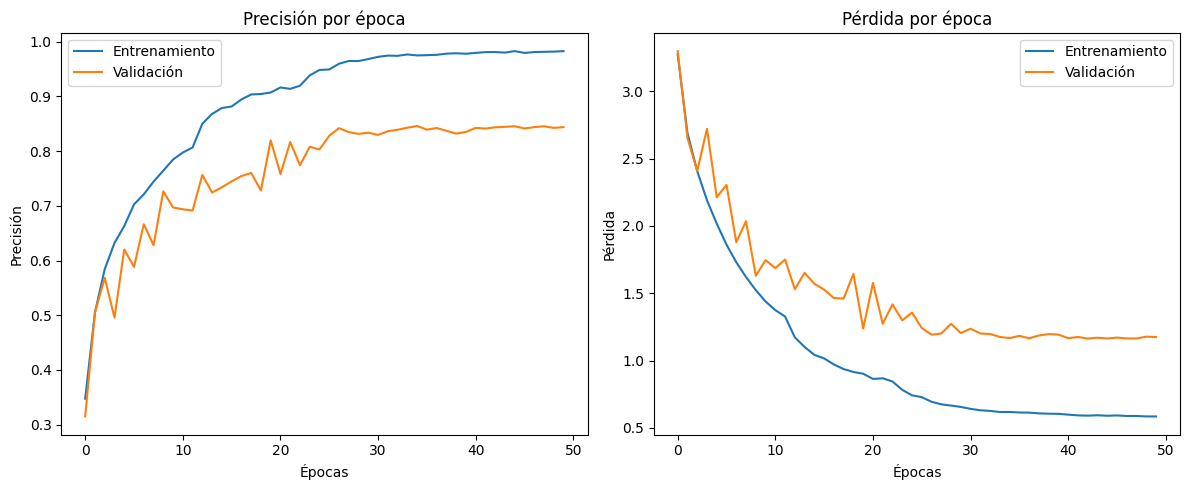

In [ ]:
import matplotlib.pyplot as plt

acc = history_v2.history['accuracy']
val_acc = history_v2.history['val_accuracy']

loss = history_v2.history['loss']
val_loss = history_v2.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 5))

# Precisión
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Entrenamiento')
plt.plot(epochs_range, val_acc, label='Validación')
plt.title('Precisión por época')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Pérdida
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Entrenamiento')
plt.plot(epochs_range, val_loss, label='Validación')
plt.title('Pérdida por época')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()


plt.tight_layout()
plt.show()



2025-06-19 23:02:36.750174: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:02:36.816294: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:02:36.827567: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:02:36.889645: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 33/117 [=======>......................] - ETA: 2s

2025-06-19 23:02:38.063683: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 45/117 [==========>...................] - ETA: 2s

2025-06-19 23:02:38.467447: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:02:38.651580: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 59/117 [==============>...............] - ETA: 1s

2025-06-19 23:02:38.900334: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


117/117 [==============================] - 4s 31ms/step
Classification Report:
              precision    recall  f1-score   support

        cane       0.92      0.66      0.77       388
     cavallo       0.86      0.90      0.88       373
    elefante       0.71      0.90      0.80       300
    farfalla       0.77      0.94      0.85       391
     gallina       0.85      0.90      0.88       404
       gatto       0.89      0.86      0.87       346
       mucca       0.88      0.77      0.83       366
      pecora       0.79      0.86      0.82       372
       ragno       0.92      0.83      0.87       415
  scoiattolo       0.90      0.82      0.86       377

    accuracy                           0.84      3732
   macro avg       0.85      0.84      0.84      3732
weighted avg       0.85      0.84      0.84      3732



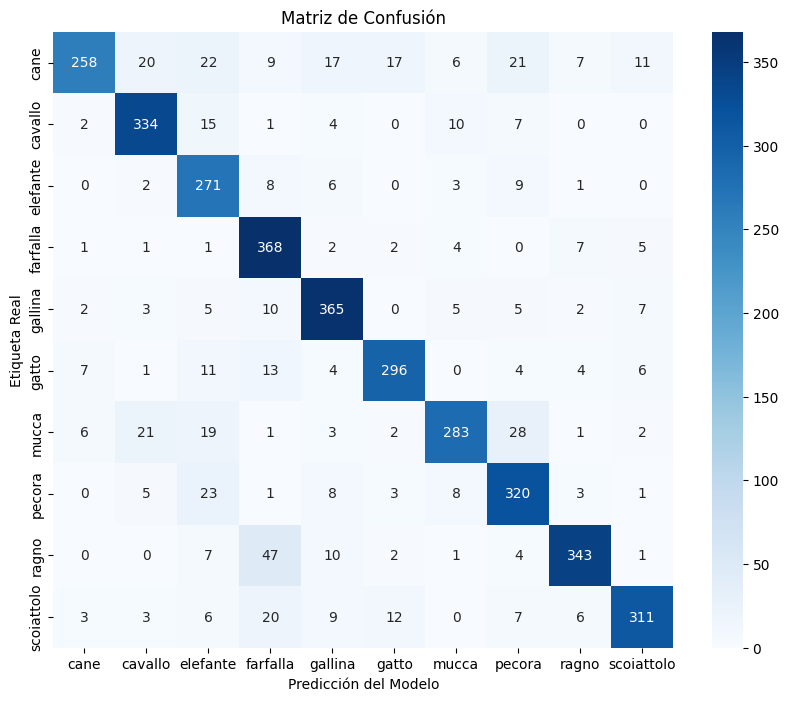

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener las etiquetas verdaderas y las predicciones
y_true = np.concatenate([y for x, y in val_ds], axis=0)
y_pred_probs = model_v2.predict(val_ds)
y_pred = np.argmax(y_pred_probs, axis=1)

# Generar el Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# Generar la Matriz de Confusión
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicción del Modelo')
plt.ylabel('Etiqueta Real')
plt.title('Matriz de Confusión')
plt.show()



In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam


base_model = MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,  
    weights='imagenet' 
)

base_model.trainable = False

inputs = tf.keras.Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)  
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)

model_v3 = tf.keras.Model(inputs, outputs)

## 5. Compilación con learning rate bajo
model_v3.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

## 6. Entrenamiento con callbacks
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss'),
    tf.keras.callbacks.ModelCheckpoint('best_model.h5', save_best_only=True)
]

history = model_v3.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,  
    callbacks=callbacks,
    verbose=1
)





Epoch 1/50
 37/467 [=>............................] - ETA: 21s - loss: 3.0317 - accuracy: 0.1073

2025-06-19 23:09:02.799292: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 80/467 [====>.........................] - ETA: 19s - loss: 2.8769 - accuracy: 0.1266

2025-06-19 23:09:05.106752: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:09:05.200878: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 87/467 [====>.........................] - ETA: 19s - loss: 2.8529 - accuracy: 0.1315

2025-06-19 23:09:05.416393: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


122/467 [======>.......................] - ETA: 17s - loss: 2.7514 - accuracy: 0.1470

2025-06-19 23:09:07.207048: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


129/467 [=======>......................] - ETA: 17s - loss: 2.7361 - accuracy: 0.1492

2025-06-19 23:09:07.642670: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


167/467 [=========>....................] - ETA: 15s - loss: 2.6145 - accuracy: 0.1751

2025-06-19 23:09:09.514413: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:09:09.515711: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


239/467 [==============>...............] - ETA: 11s - loss: 2.4142 - accuracy: 0.2266

2025-06-19 23:09:13.291856: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


267/467 [================>.............] - ETA: 10s - loss: 2.3452 - accuracy: 0.2459

2025-06-19 23:09:14.820833: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


289/467 [=================>............] - ETA: 9s - loss: 2.2902 - accuracy: 0.2608

2025-06-19 23:09:15.953885: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


314/467 [===================>..........] - ETA: 7s - loss: 2.2346 - accuracy: 0.2779

2025-06-19 23:09:17.209950: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


318/467 [===================>..........] - ETA: 7s - loss: 2.2253 - accuracy: 0.2809

2025-06-19 23:09:17.445735: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


328/467 [====================>.........] - ETA: 7s - loss: 2.2039 - accuracy: 0.2880

2025-06-19 23:09:17.972417: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


343/467 [=====================>........] - ETA: 6s - loss: 2.1693 - accuracy: 0.2987

2025-06-19 23:09:18.802996: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


362/467 [======================>.......] - ETA: 5s - loss: 2.1294 - accuracy: 0.3112

2025-06-19 23:09:19.826140: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


420/467 [=========================>....] - ETA: 2s - loss: 2.0222 - accuracy: 0.3470

2025-06-19 23:09:22.933198: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


446/467 [===========================>..] - ETA: 1s - loss: 1.9796 - accuracy: 0.3606

2025-06-19 23:09:24.268011: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - ETA: 0s - loss: 1.9476 - accuracy: 0.3709

2025-06-19 23:09:27.478027: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:09:27.877630: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:09:28.062838: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:09:28.316101: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


467/467 [==============================] - 32s 65ms/step - loss: 1.9476 - accuracy: 0.3709 - val_loss: 0.7904 - val_accuracy: 0.8371
Epoch 2/50
 18/467 [>.............................] - ETA: 23s - loss: 1.1202 - accuracy: 0.6701

2025-06-19 23:09:32.149784: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/467 [=>............................] - ETA: 23s - loss: 1.1443 - accuracy: 0.6461

2025-06-19 23:09:32.995118: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 51/467 [==>...........................] - ETA: 22s - loss: 1.1193 - accuracy: 0.6513

2025-06-19 23:09:33.899379: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 88/467 [====>.........................] - ETA: 19s - loss: 1.1060 - accuracy: 0.6552

2025-06-19 23:09:35.777465: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


109/467 [======>.......................] - ETA: 18s - loss: 1.1013 - accuracy: 0.6560

2025-06-19 23:09:36.873137: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


134/467 [=======>......................] - ETA: 17s - loss: 1.0974 - accuracy: 0.6556

2025-06-19 23:09:38.147636: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


150/467 [========>.....................] - ETA: 16s - loss: 1.0813 - accuracy: 0.6592

2025-06-19 23:09:38.942383: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


185/467 [==========>...................] - ETA: 14s - loss: 1.0773 - accuracy: 0.6579

2025-06-19 23:09:40.673002: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


193/467 [===========>..................] - ETA: 14s - loss: 1.0693 - accuracy: 0.6611

2025-06-19 23:09:41.093638: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


255/467 [===============>..............] - ETA: 10s - loss: 1.0414 - accuracy: 0.6695

2025-06-19 23:09:44.353568: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


264/467 [===============>..............] - ETA: 10s - loss: 1.0382 - accuracy: 0.6706

2025-06-19 23:09:44.845680: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


281/467 [=================>............] - ETA: 9s - loss: 1.0303 - accuracy: 0.6733

2025-06-19 23:09:45.834608: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


306/467 [==================>...........] - ETA: 8s - loss: 1.0203 - accuracy: 0.6783

2025-06-19 23:09:47.022842: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


315/467 [===================>..........] - ETA: 7s - loss: 1.0177 - accuracy: 0.6788

2025-06-19 23:09:47.512126: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


330/467 [====================>.........] - ETA: 7s - loss: 1.0151 - accuracy: 0.6798

2025-06-19 23:09:48.308770: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


401/467 [========================>.....] - ETA: 3s - loss: 0.9845 - accuracy: 0.6884

2025-06-19 23:09:51.806228: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


413/467 [=========================>....] - ETA: 2s - loss: 0.9787 - accuracy: 0.6910

2025-06-19 23:09:52.465237: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


462/467 [============================>.] - ETA: 0s - loss: 0.9673 - accuracy: 0.6942

2025-06-19 23:09:55.004031: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


466/467 [============================>.] - ETA: 0s - loss: 0.9649 - accuracy: 0.6950

2025-06-19 23:09:56.218389: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:09:56.624388: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:09:56.812231: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:09:57.063745: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - 28s 60ms/step - loss: 0.9646 - accuracy: 0.6950 - val_loss: 0.4482 - val_accuracy: 0.8955
Epoch 3/50
 20/467 [>.............................] - ETA: 21s - loss: 0.7837 - accuracy: 0.7516

2025-06-19 23:10:00.114970: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 36/467 [=>............................] - ETA: 21s - loss: 0.7546 - accuracy: 0.7674

2025-06-19 23:10:00.909591: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:10:01.067281: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 42/467 [=>............................] - ETA: 21s - loss: 0.7718 - accuracy: 0.7612

2025-06-19 23:10:01.256120: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 50/467 [==>...........................] - ETA: 21s - loss: 0.7631 - accuracy: 0.7644

2025-06-19 23:10:01.599565: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


116/467 [======>.......................] - ETA: 17s - loss: 0.7773 - accuracy: 0.7605

2025-06-19 23:10:04.926417: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


168/467 [=========>....................] - ETA: 14s - loss: 0.7583 - accuracy: 0.7649

2025-06-19 23:10:07.456862: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


195/467 [===========>..................] - ETA: 13s - loss: 0.7596 - accuracy: 0.7636

2025-06-19 23:10:08.954566: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


239/467 [==============>...............] - ETA: 11s - loss: 0.7538 - accuracy: 0.7657

2025-06-19 23:10:11.237557: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


293/467 [=================>............] - ETA: 8s - loss: 0.7399 - accuracy: 0.7699

2025-06-19 23:10:14.029146: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


302/467 [==================>...........] - ETA: 8s - loss: 0.7373 - accuracy: 0.7708

2025-06-19 23:10:14.489508: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:10:14.518841: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:10:14.573068: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


323/467 [===================>..........] - ETA: 7s - loss: 0.7369 - accuracy: 0.7711

2025-06-19 23:10:15.536770: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


354/467 [=====================>........] - ETA: 5s - loss: 0.7310 - accuracy: 0.7730

2025-06-19 23:10:17.199713: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


370/467 [======================>.......] - ETA: 4s - loss: 0.7286 - accuracy: 0.7742

2025-06-19 23:10:17.990450: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


386/467 [=======================>......] - ETA: 4s - loss: 0.7240 - accuracy: 0.7753

2025-06-19 23:10:18.835801: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


415/467 [=========================>....] - ETA: 2s - loss: 0.7240 - accuracy: 0.7755

2025-06-19 23:10:20.256979: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


466/467 [============================>.] - ETA: 0s - loss: 0.7143 - accuracy: 0.7778

2025-06-19 23:10:23.861328: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:10:24.272709: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:10:24.462971: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:10:24.721659: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - 28s 59ms/step - loss: 0.7145 - accuracy: 0.7777 - val_loss: 0.3474 - val_accuracy: 0.9129
Epoch 4/50
 43/467 [=>............................] - ETA: 21s - loss: 0.6573 - accuracy: 0.7922

2025-06-19 23:10:28.874642: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:10:28.997500: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 76/467 [===>..........................] - ETA: 19s - loss: 0.6449 - accuracy: 0.7948

2025-06-19 23:10:30.572610: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:10:30.635769: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


147/467 [========>.....................] - ETA: 15s - loss: 0.6572 - accuracy: 0.7925

2025-06-19 23:10:34.110931: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


174/467 [==========>...................] - ETA: 14s - loss: 0.6508 - accuracy: 0.7940

2025-06-19 23:10:35.468806: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


191/467 [===========>..................] - ETA: 13s - loss: 0.6532 - accuracy: 0.7909

2025-06-19 23:10:36.229610: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


206/467 [============>.................] - ETA: 13s - loss: 0.6498 - accuracy: 0.7911

2025-06-19 23:10:37.122980: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


215/467 [============>.................] - ETA: 12s - loss: 0.6499 - accuracy: 0.7903

2025-06-19 23:10:37.552807: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


220/467 [=============>................] - ETA: 12s - loss: 0.6497 - accuracy: 0.7902

2025-06-19 23:10:37.869876: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


237/467 [==============>...............] - ETA: 11s - loss: 0.6504 - accuracy: 0.7894

2025-06-19 23:10:38.691370: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


243/467 [==============>...............] - ETA: 11s - loss: 0.6498 - accuracy: 0.7891

2025-06-19 23:10:39.082226: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


252/467 [===============>..............] - ETA: 10s - loss: 0.6473 - accuracy: 0.7897

2025-06-19 23:10:39.459575: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


288/467 [=================>............] - ETA: 9s - loss: 0.6447 - accuracy: 0.7925

2025-06-19 23:10:41.449359: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


305/467 [==================>...........] - ETA: 8s - loss: 0.6448 - accuracy: 0.7931

2025-06-19 23:10:42.333986: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:10:42.366836: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


317/467 [===================>..........] - ETA: 7s - loss: 0.6396 - accuracy: 0.7957

2025-06-19 23:10:42.925546: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


332/467 [====================>.........] - ETA: 6s - loss: 0.6395 - accuracy: 0.7958

2025-06-19 23:10:43.738227: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - ETA: 0s - loss: 0.6208 - accuracy: 0.8011

2025-06-19 23:10:51.409868: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:10:51.817539: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:10:52.009993: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:10:52.265107: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - 27s 59ms/step - loss: 0.6208 - accuracy: 0.8011 - val_loss: 0.3018 - val_accuracy: 0.9196
Epoch 5/50
 48/467 [==>...........................] - ETA: 21s - loss: 0.5608 - accuracy: 0.8125

2025-06-19 23:10:56.710779: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 83/467 [====>.........................] - ETA: 19s - loss: 0.5806 - accuracy: 0.8136

2025-06-19 23:10:58.575969: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


105/467 [=====>........................] - ETA: 18s - loss: 0.5803 - accuracy: 0.8149

2025-06-19 23:10:59.615177: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


129/467 [=======>......................] - ETA: 17s - loss: 0.5769 - accuracy: 0.8137

2025-06-19 23:11:00.770838: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


221/467 [=============>................] - ETA: 12s - loss: 0.5792 - accuracy: 0.8111

2025-06-19 23:11:05.517534: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


233/467 [=============>................] - ETA: 11s - loss: 0.5769 - accuracy: 0.8122

2025-06-19 23:11:06.114611: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


241/467 [==============>...............] - ETA: 11s - loss: 0.5765 - accuracy: 0.8120

2025-06-19 23:11:06.502825: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:11:06.538681: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


269/467 [================>.............] - ETA: 9s - loss: 0.5696 - accuracy: 0.8130 

2025-06-19 23:11:07.789994: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


280/467 [================>.............] - ETA: 9s - loss: 0.5676 - accuracy: 0.8146

2025-06-19 23:11:08.322608: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:11:08.495031: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


284/467 [=================>............] - ETA: 9s - loss: 0.5661 - accuracy: 0.8150

2025-06-19 23:11:08.613762: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


297/467 [==================>...........] - ETA: 8s - loss: 0.5629 - accuracy: 0.8166

2025-06-19 23:11:09.215949: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:11:09.259884: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


337/467 [====================>.........] - ETA: 6s - loss: 0.5619 - accuracy: 0.8191

2025-06-19 23:11:11.185694: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


345/467 [=====================>........] - ETA: 6s - loss: 0.5636 - accuracy: 0.8178

2025-06-19 23:11:11.556737: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


380/467 [=======================>......] - ETA: 4s - loss: 0.5630 - accuracy: 0.8180

2025-06-19 23:11:13.326770: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


428/467 [==========================>...] - ETA: 1s - loss: 0.5553 - accuracy: 0.8208

2025-06-19 23:11:15.821859: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


466/467 [============================>.] - ETA: 0s - loss: 0.5522 - accuracy: 0.8226

2025-06-19 23:11:18.748224: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:11:19.152243: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:11:19.338042: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:11:19.588154: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - 27s 58ms/step - loss: 0.5520 - accuracy: 0.8226 - val_loss: 0.2685 - val_accuracy: 0.9252
Epoch 6/50
 20/467 [>.............................] - ETA: 22s - loss: 0.4797 - accuracy: 0.8453

2025-06-19 23:11:22.584472: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 24/467 [>.............................] - ETA: 21s - loss: 0.4668 - accuracy: 0.8516

2025-06-19 23:11:22.801386: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


102/467 [=====>........................] - ETA: 18s - loss: 0.5108 - accuracy: 0.8401

2025-06-19 23:11:26.752708: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


144/467 [========>.....................] - ETA: 16s - loss: 0.5172 - accuracy: 0.8362

2025-06-19 23:11:28.850215: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


175/467 [==========>...................] - ETA: 14s - loss: 0.5158 - accuracy: 0.8357

2025-06-19 23:11:30.496858: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:11:30.590715: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


222/467 [=============>................] - ETA: 12s - loss: 0.5149 - accuracy: 0.8363

2025-06-19 23:11:32.743920: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:11:32.888206: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


232/467 [=============>................] - ETA: 11s - loss: 0.5177 - accuracy: 0.8342

2025-06-19 23:11:33.256416: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


246/467 [==============>...............] - ETA: 11s - loss: 0.5179 - accuracy: 0.8352

2025-06-19 23:11:33.943882: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


266/467 [================>.............] - ETA: 10s - loss: 0.5210 - accuracy: 0.8344

2025-06-19 23:11:34.927488: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


333/467 [====================>.........] - ETA: 6s - loss: 0.5208 - accuracy: 0.8343

2025-06-19 23:11:38.324954: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


371/467 [======================>.......] - ETA: 4s - loss: 0.5149 - accuracy: 0.8373

2025-06-19 23:11:40.291914: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


391/467 [========================>.....] - ETA: 3s - loss: 0.5158 - accuracy: 0.8371

2025-06-19 23:11:41.237249: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


397/467 [========================>.....] - ETA: 3s - loss: 0.5152 - accuracy: 0.8373

2025-06-19 23:11:41.590155: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


403/467 [========================>.....] - ETA: 3s - loss: 0.5152 - accuracy: 0.8374

2025-06-19 23:11:41.932625: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


419/467 [=========================>....] - ETA: 2s - loss: 0.5158 - accuracy: 0.8380

2025-06-19 23:11:42.745188: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


447/467 [===========================>..] - ETA: 1s - loss: 0.5208 - accuracy: 0.8356

2025-06-19 23:11:44.223943: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


466/467 [============================>.] - ETA: 0s - loss: 0.5175 - accuracy: 0.8366

2025-06-19 23:11:46.231844: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:11:46.643836: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:11:46.832774: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:11:47.090965: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - 27s 59ms/step - loss: 0.5177 - accuracy: 0.8366 - val_loss: 0.2524 - val_accuracy: 0.9287
Epoch 7/50
 25/467 [>.............................] - ETA: 21s - loss: 0.4934 - accuracy: 0.8363

2025-06-19 23:11:50.335355: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 63/467 [===>..........................] - ETA: 20s - loss: 0.5007 - accuracy: 0.8348

2025-06-19 23:11:52.229250: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 74/467 [===>..........................] - ETA: 19s - loss: 0.4883 - accuracy: 0.8395

2025-06-19 23:11:52.853168: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 89/467 [====>.........................] - ETA: 19s - loss: 0.4847 - accuracy: 0.8423

2025-06-19 23:11:53.626643: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/467 [======>.......................] - ETA: 17s - loss: 0.4825 - accuracy: 0.8435

2025-06-19 23:11:54.879175: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


134/467 [=======>......................] - ETA: 16s - loss: 0.4812 - accuracy: 0.8438

2025-06-19 23:11:55.845893: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


142/467 [========>.....................] - ETA: 16s - loss: 0.4818 - accuracy: 0.8431

2025-06-19 23:11:56.228916: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


175/467 [==========>...................] - ETA: 14s - loss: 0.4730 - accuracy: 0.8438

2025-06-19 23:11:57.883106: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


197/467 [===========>..................] - ETA: 13s - loss: 0.4775 - accuracy: 0.8422

2025-06-19 23:11:58.967127: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


240/467 [==============>...............] - ETA: 11s - loss: 0.4797 - accuracy: 0.8423

2025-06-19 23:12:01.125523: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


252/467 [===============>..............] - ETA: 10s - loss: 0.4826 - accuracy: 0.8413

2025-06-19 23:12:01.713156: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


279/467 [================>.............] - ETA: 9s - loss: 0.4778 - accuracy: 0.8435

2025-06-19 23:12:03.070402: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


312/467 [===================>..........] - ETA: 7s - loss: 0.4746 - accuracy: 0.8449

2025-06-19 23:12:04.785392: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


351/467 [=====================>........] - ETA: 5s - loss: 0.4733 - accuracy: 0.8452

2025-06-19 23:12:06.752359: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


380/467 [=======================>......] - ETA: 4s - loss: 0.4759 - accuracy: 0.8443

2025-06-19 23:12:08.172781: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


386/467 [=======================>......] - ETA: 4s - loss: 0.4762 - accuracy: 0.8441

2025-06-19 23:12:08.540017: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


394/467 [========================>.....] - ETA: 3s - loss: 0.4756 - accuracy: 0.8440

2025-06-19 23:12:08.940905: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


462/467 [============================>.] - ETA: 0s - loss: 0.4821 - accuracy: 0.8425

2025-06-19 23:12:12.314240: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - ETA: 0s - loss: 0.4839 - accuracy: 0.8421

2025-06-19 23:12:13.567788: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:12:13.965072: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:12:14.151147: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:12:14.405434: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - 27s 58ms/step - loss: 0.4839 - accuracy: 0.8421 - val_loss: 0.2373 - val_accuracy: 0.9317
Epoch 8/50
  6/467 [..............................] - ETA: 21s - loss: 0.5839 - accuracy: 0.8177

2025-06-19 23:12:16.761539: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 37/467 [=>............................] - ETA: 20s - loss: 0.5154 - accuracy: 0.8345

2025-06-19 23:12:18.228992: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:12:18.373402: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 44/467 [=>............................] - ETA: 20s - loss: 0.5231 - accuracy: 0.8338

2025-06-19 23:12:18.601193: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 56/467 [==>...........................] - ETA: 20s - loss: 0.5025 - accuracy: 0.8326

2025-06-19 23:12:19.271644: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 92/467 [====>.........................] - ETA: 18s - loss: 0.4872 - accuracy: 0.8370

2025-06-19 23:12:21.069961: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


104/467 [=====>........................] - ETA: 18s - loss: 0.4896 - accuracy: 0.8383

2025-06-19 23:12:21.629052: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


141/467 [========>.....................] - ETA: 16s - loss: 0.4807 - accuracy: 0.8455

2025-06-19 23:12:23.653863: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


168/467 [=========>....................] - ETA: 15s - loss: 0.4828 - accuracy: 0.8460

2025-06-19 23:12:24.996690: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


177/467 [==========>...................] - ETA: 14s - loss: 0.4820 - accuracy: 0.8460

2025-06-19 23:12:25.451368: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


310/467 [==================>...........] - ETA: 7s - loss: 0.4823 - accuracy: 0.8462

2025-06-19 23:12:32.107987: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


322/467 [===================>..........] - ETA: 7s - loss: 0.4828 - accuracy: 0.8458

2025-06-19 23:12:32.696834: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


370/467 [======================>.......] - ETA: 4s - loss: 0.4765 - accuracy: 0.8475

2025-06-19 23:12:35.094490: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


383/467 [=======================>......] - ETA: 4s - loss: 0.4760 - accuracy: 0.8474

2025-06-19 23:12:35.709965: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


404/467 [========================>.....] - ETA: 3s - loss: 0.4743 - accuracy: 0.8481

2025-06-19 23:12:36.756075: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


410/467 [=========================>....] - ETA: 2s - loss: 0.4737 - accuracy: 0.8482

2025-06-19 23:12:37.076018: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


464/467 [============================>.] - ETA: 0s - loss: 0.4722 - accuracy: 0.8475

2025-06-19 23:12:39.781816: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:12:39.973512: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


466/467 [============================>.] - ETA: 0s - loss: 0.4728 - accuracy: 0.8472

2025-06-19 23:12:40.924285: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:12:41.327939: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:12:41.515601: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:12:41.765420: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - 27s 58ms/step - loss: 0.4729 - accuracy: 0.8472 - val_loss: 0.2288 - val_accuracy: 0.9368
Epoch 9/50
  8/467 [..............................] - ETA: 21s - loss: 0.4570 - accuracy: 0.8398

2025-06-19 23:12:44.181334: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:12:44.347339: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 20/467 [>.............................] - ETA: 21s - loss: 0.4875 - accuracy: 0.8375

2025-06-19 23:12:44.759157: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 37/467 [=>............................] - ETA: 21s - loss: 0.4688 - accuracy: 0.8395

2025-06-19 23:12:45.676749: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:12:45.869626: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 76/467 [===>..........................] - ETA: 20s - loss: 0.4588 - accuracy: 0.8466

2025-06-19 23:12:47.670158: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


106/467 [=====>........................] - ETA: 18s - loss: 0.4599 - accuracy: 0.8479

2025-06-19 23:12:49.177478: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


153/467 [========>.....................] - ETA: 15s - loss: 0.4490 - accuracy: 0.8533

2025-06-19 23:12:51.597784: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


204/467 [============>.................] - ETA: 13s - loss: 0.4548 - accuracy: 0.8529

2025-06-19 23:12:54.267241: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


228/467 [=============>................] - ETA: 12s - loss: 0.4543 - accuracy: 0.8529

2025-06-19 23:12:55.569936: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


307/467 [==================>...........] - ETA: 8s - loss: 0.4599 - accuracy: 0.8515

2025-06-19 23:12:59.707388: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:12:59.757040: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


312/467 [===================>..........] - ETA: 8s - loss: 0.4593 - accuracy: 0.8516

2025-06-19 23:13:00.006975: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


357/467 [=====================>........] - ETA: 5s - loss: 0.4568 - accuracy: 0.8527

2025-06-19 23:13:02.434223: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


403/467 [========================>.....] - ETA: 3s - loss: 0.4530 - accuracy: 0.8531

2025-06-19 23:13:04.738004: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:13:04.866351: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


408/467 [=========================>....] - ETA: 3s - loss: 0.4541 - accuracy: 0.8529

2025-06-19 23:13:04.948973: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - ETA: 0s - loss: 0.4576 - accuracy: 0.8525

2025-06-19 23:13:08.114333: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:13:09.139138: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:13:09.549824: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:13:09.740409: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:13:09.996704: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - 28s 60ms/step - loss: 0.4576 - accuracy: 0.8525 - val_loss: 0.2240 - val_accuracy: 0.9362
Epoch 10/50
 24/467 [>.............................] - ETA: 24s - loss: 0.5012 - accuracy: 0.8385

2025-06-19 23:13:13.345958: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/467 [=>............................] - ETA: 23s - loss: 0.4690 - accuracy: 0.8410

2025-06-19 23:13:13.839874: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 90/467 [====>.........................] - ETA: 19s - loss: 0.4380 - accuracy: 0.8576

2025-06-19 23:13:16.671093: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


104/467 [=====>........................] - ETA: 18s - loss: 0.4364 - accuracy: 0.8579

2025-06-19 23:13:17.371132: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


146/467 [========>.....................] - ETA: 16s - loss: 0.4436 - accuracy: 0.8551

2025-06-19 23:13:19.519864: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


161/467 [=========>....................] - ETA: 15s - loss: 0.4462 - accuracy: 0.8536

2025-06-19 23:13:20.232491: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


209/467 [============>.................] - ETA: 13s - loss: 0.4417 - accuracy: 0.8557

2025-06-19 23:13:22.777379: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


229/467 [=============>................] - ETA: 12s - loss: 0.4416 - accuracy: 0.8555

2025-06-19 23:13:23.824785: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


256/467 [===============>..............] - ETA: 10s - loss: 0.4415 - accuracy: 0.8552

2025-06-19 23:13:25.234527: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


264/467 [===============>..............] - ETA: 10s - loss: 0.4399 - accuracy: 0.8559

2025-06-19 23:13:25.630324: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


290/467 [=================>............] - ETA: 9s - loss: 0.4386 - accuracy: 0.8559

2025-06-19 23:13:27.002180: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


319/467 [===================>..........] - ETA: 7s - loss: 0.4359 - accuracy: 0.8577

2025-06-19 23:13:28.408145: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


332/467 [====================>.........] - ETA: 6s - loss: 0.4357 - accuracy: 0.8578

2025-06-19 23:13:29.090074: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


366/467 [======================>.......] - ETA: 5s - loss: 0.4352 - accuracy: 0.8575

2025-06-19 23:13:30.957370: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:13:31.014818: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


390/467 [========================>.....] - ETA: 3s - loss: 0.4349 - accuracy: 0.8583

2025-06-19 23:13:32.287528: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


410/467 [=========================>....] - ETA: 2s - loss: 0.4344 - accuracy: 0.8582

2025-06-19 23:13:33.254827: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


464/467 [============================>.] - ETA: 0s - loss: 0.4342 - accuracy: 0.8581

2025-06-19 23:13:35.996121: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - ETA: 0s - loss: 0.4356 - accuracy: 0.8577

2025-06-19 23:13:37.131433: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:13:37.537800: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:13:37.728865: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:13:37.982164: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - 28s 60ms/step - loss: 0.4356 - accuracy: 0.8577 - val_loss: 0.2166 - val_accuracy: 0.9384
Epoch 11/50
  9/467 [..............................] - ETA: 20s - loss: 0.4695 - accuracy: 0.8542

2025-06-19 23:13:40.470819: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 23/467 [>.............................] - ETA: 22s - loss: 0.4584 - accuracy: 0.8533

2025-06-19 23:13:41.204579: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 32/467 [=>............................] - ETA: 22s - loss: 0.4525 - accuracy: 0.8623

2025-06-19 23:13:41.666370: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 48/467 [==>...........................] - ETA: 21s - loss: 0.4393 - accuracy: 0.8633

2025-06-19 23:13:42.454903: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 80/467 [====>.........................] - ETA: 19s - loss: 0.4293 - accuracy: 0.8680

2025-06-19 23:13:44.042938: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 94/467 [=====>........................] - ETA: 18s - loss: 0.4424 - accuracy: 0.8640

2025-06-19 23:13:44.744223: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


142/467 [========>.....................] - ETA: 16s - loss: 0.4431 - accuracy: 0.8620

2025-06-19 23:13:47.228303: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


214/467 [============>.................] - ETA: 12s - loss: 0.4290 - accuracy: 0.8651

2025-06-19 23:13:50.981317: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


225/467 [=============>................] - ETA: 12s - loss: 0.4300 - accuracy: 0.8640

2025-06-19 23:13:51.617564: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


287/467 [=================>............] - ETA: 9s - loss: 0.4298 - accuracy: 0.8643

2025-06-19 23:13:54.795073: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:13:54.932014: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


296/467 [==================>...........] - ETA: 8s - loss: 0.4295 - accuracy: 0.8643

2025-06-19 23:13:55.240597: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


329/467 [====================>.........] - ETA: 7s - loss: 0.4289 - accuracy: 0.8640

2025-06-19 23:13:57.014682: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


362/467 [======================>.......] - ETA: 5s - loss: 0.4255 - accuracy: 0.8643

2025-06-19 23:13:58.724284: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


412/467 [=========================>....] - ETA: 2s - loss: 0.4296 - accuracy: 0.8626

2025-06-19 23:14:01.188027: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


420/467 [=========================>....] - ETA: 2s - loss: 0.4291 - accuracy: 0.8628

2025-06-19 23:14:01.612872: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


427/467 [==========================>...] - ETA: 2s - loss: 0.4300 - accuracy: 0.8626

2025-06-19 23:14:02.029194: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


436/467 [===========================>..] - ETA: 1s - loss: 0.4292 - accuracy: 0.8632

2025-06-19 23:14:02.452376: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


466/467 [============================>.] - ETA: 0s - loss: 0.4297 - accuracy: 0.8629

2025-06-19 23:14:05.006302: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:14:05.413359: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:14:05.602293: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:14:05.856686: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - 28s 60ms/step - loss: 0.4293 - accuracy: 0.8630 - val_loss: 0.2128 - val_accuracy: 0.9397
Epoch 12/50
 17/467 [>.............................] - ETA: 23s - loss: 0.4176 - accuracy: 0.8603

2025-06-19 23:14:08.740417: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 63/467 [===>..........................] - ETA: 20s - loss: 0.4096 - accuracy: 0.8636

2025-06-19 23:14:11.135340: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:14:11.145287: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 71/467 [===>..........................] - ETA: 20s - loss: 0.4146 - accuracy: 0.8618

2025-06-19 23:14:11.521915: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


118/467 [======>.......................] - ETA: 17s - loss: 0.4301 - accuracy: 0.8604

2025-06-19 23:14:13.886609: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


210/467 [============>.................] - ETA: 13s - loss: 0.4193 - accuracy: 0.8616

2025-06-19 23:14:18.548829: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:14:18.704020: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


216/467 [============>.................] - ETA: 12s - loss: 0.4209 - accuracy: 0.8604

2025-06-19 23:14:18.866546: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:14:18.900490: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


271/467 [================>.............] - ETA: 10s - loss: 0.4163 - accuracy: 0.8617

2025-06-19 23:14:21.852751: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


367/467 [======================>.......] - ETA: 5s - loss: 0.4169 - accuracy: 0.8632

2025-06-19 23:14:26.848610: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


388/467 [=======================>......] - ETA: 4s - loss: 0.4170 - accuracy: 0.8637

2025-06-19 23:14:27.992037: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


424/467 [==========================>...] - ETA: 2s - loss: 0.4175 - accuracy: 0.8639

2025-06-19 23:14:29.782594: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


448/467 [===========================>..] - ETA: 0s - loss: 0.4158 - accuracy: 0.8645

2025-06-19 23:14:31.034883: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:14:31.046031: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:14:31.096626: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


455/467 [============================>.] - ETA: 0s - loss: 0.4151 - accuracy: 0.8647

2025-06-19 23:14:31.391380: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


463/467 [============================>.] - ETA: 0s - loss: 0.4143 - accuracy: 0.8646

2025-06-19 23:14:31.867154: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - ETA: 0s - loss: 0.4147 - accuracy: 0.8646

2025-06-19 23:14:33.065141: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:14:33.472955: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:14:33.656645: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:14:33.912214: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - 28s 60ms/step - loss: 0.4147 - accuracy: 0.8646 - val_loss: 0.2094 - val_accuracy: 0.9392
Epoch 13/50
  6/467 [..............................] - ETA: 19s - loss: 0.5361 - accuracy: 0.8177

2025-06-19 23:14:36.166923: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 77/467 [===>..........................] - ETA: 20s - loss: 0.4214 - accuracy: 0.8608

2025-06-19 23:14:39.859541: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:14:39.987934: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 84/467 [====>.........................] - ETA: 19s - loss: 0.4211 - accuracy: 0.8612

2025-06-19 23:14:40.208298: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 95/467 [=====>........................] - ETA: 19s - loss: 0.4260 - accuracy: 0.8609

2025-06-19 23:14:40.771473: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


102/467 [=====>........................] - ETA: 19s - loss: 0.4246 - accuracy: 0.8624

2025-06-19 23:14:41.224876: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:14:41.371303: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


129/467 [=======>......................] - ETA: 17s - loss: 0.4169 - accuracy: 0.8639

2025-06-19 23:14:42.428937: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


152/467 [========>.....................] - ETA: 15s - loss: 0.4194 - accuracy: 0.8647

2025-06-19 23:14:43.512083: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


163/467 [=========>....................] - ETA: 15s - loss: 0.4203 - accuracy: 0.8645

2025-06-19 23:14:44.059247: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


317/467 [===================>..........] - ETA: 7s - loss: 0.4322 - accuracy: 0.8591

2025-06-19 23:14:51.873256: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


331/467 [====================>.........] - ETA: 6s - loss: 0.4303 - accuracy: 0.8596

2025-06-19 23:14:52.550643: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


337/467 [====================>.........] - ETA: 6s - loss: 0.4290 - accuracy: 0.8602

2025-06-19 23:14:52.800229: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


407/467 [=========================>....] - ETA: 2s - loss: 0.4291 - accuracy: 0.8604

2025-06-19 23:14:56.182999: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:14:56.326594: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


417/467 [=========================>....] - ETA: 2s - loss: 0.4281 - accuracy: 0.8609

2025-06-19 23:14:56.672123: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


429/467 [==========================>...] - ETA: 1s - loss: 0.4274 - accuracy: 0.8613

2025-06-19 23:14:57.328146: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


458/467 [============================>.] - ETA: 0s - loss: 0.4261 - accuracy: 0.8614

2025-06-19 23:14:58.848708: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - ETA: 0s - loss: 0.4254 - accuracy: 0.8616

2025-06-19 23:15:00.283742: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:15:00.693841: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:15:00.885777: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:15:01.142878: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - 27s 58ms/step - loss: 0.4254 - accuracy: 0.8616 - val_loss: 0.2104 - val_accuracy: 0.9408
Epoch 14/50
  2/467 [..............................] - ETA: 25s - loss: 0.2679 - accuracy: 0.9219

2025-06-19 23:15:03.197639: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


172/467 [==========>...................] - ETA: 14s - loss: 0.4017 - accuracy: 0.8715

2025-06-19 23:15:11.747748: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


181/467 [==========>...................] - ETA: 14s - loss: 0.4057 - accuracy: 0.8684

2025-06-19 23:15:12.189486: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


199/467 [===========>..................] - ETA: 13s - loss: 0.4026 - accuracy: 0.8681

2025-06-19 23:15:13.084535: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


205/467 [============>.................] - ETA: 13s - loss: 0.4023 - accuracy: 0.8683

2025-06-19 23:15:13.375731: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


213/467 [============>.................] - ETA: 12s - loss: 0.4033 - accuracy: 0.8677

2025-06-19 23:15:13.786331: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


231/467 [=============>................] - ETA: 11s - loss: 0.4065 - accuracy: 0.8662

2025-06-19 23:15:14.740772: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


260/467 [===============>..............] - ETA: 10s - loss: 0.4094 - accuracy: 0.8671

2025-06-19 23:15:16.190741: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:15:16.280229: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


278/467 [================>.............] - ETA: 9s - loss: 0.4078 - accuracy: 0.8679

2025-06-19 23:15:17.095615: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:15:17.102758: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


296/467 [==================>...........] - ETA: 8s - loss: 0.4063 - accuracy: 0.8683

2025-06-19 23:15:18.007598: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


338/467 [====================>.........] - ETA: 6s - loss: 0.4051 - accuracy: 0.8685

2025-06-19 23:15:20.116273: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


345/467 [=====================>........] - ETA: 6s - loss: 0.4058 - accuracy: 0.8690

2025-06-19 23:15:20.459869: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


391/467 [========================>.....] - ETA: 3s - loss: 0.4069 - accuracy: 0.8692

2025-06-19 23:15:22.802635: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


425/467 [==========================>...] - ETA: 2s - loss: 0.4057 - accuracy: 0.8690

2025-06-19 23:15:24.476447: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


443/467 [===========================>..] - ETA: 1s - loss: 0.4061 - accuracy: 0.8687

2025-06-19 23:15:25.425173: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


447/467 [===========================>..] - ETA: 1s - loss: 0.4066 - accuracy: 0.8686

2025-06-19 23:15:25.626029: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


466/467 [============================>.] - ETA: 0s - loss: 0.4073 - accuracy: 0.8682

2025-06-19 23:15:27.608817: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:15:28.014707: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:15:28.203528: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:15:28.458053: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - 27s 59ms/step - loss: 0.4069 - accuracy: 0.8684 - val_loss: 0.2053 - val_accuracy: 0.9429
Epoch 15/50
 11/467 [..............................] - ETA: 21s - loss: 0.3908 - accuracy: 0.8864

2025-06-19 23:15:30.977079: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 90/467 [====>.........................] - ETA: 18s - loss: 0.3918 - accuracy: 0.8740

2025-06-19 23:15:34.873194: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


101/467 [=====>........................] - ETA: 18s - loss: 0.3924 - accuracy: 0.8753

2025-06-19 23:15:35.421148: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


137/467 [=======>......................] - ETA: 16s - loss: 0.3976 - accuracy: 0.8752

2025-06-19 23:15:37.134080: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


145/467 [========>.....................] - ETA: 15s - loss: 0.3968 - accuracy: 0.8754

2025-06-19 23:15:37.488380: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


250/467 [===============>..............] - ETA: 10s - loss: 0.4026 - accuracy: 0.8716

2025-06-19 23:15:42.787060: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


255/467 [===============>..............] - ETA: 10s - loss: 0.4015 - accuracy: 0.8718

2025-06-19 23:15:43.009438: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


260/467 [===============>..............] - ETA: 10s - loss: 0.3995 - accuracy: 0.8721

2025-06-19 23:15:43.259921: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


298/467 [==================>...........] - ETA: 8s - loss: 0.4072 - accuracy: 0.8693

2025-06-19 23:15:45.143001: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


326/467 [===================>..........] - ETA: 6s - loss: 0.4032 - accuracy: 0.8706

2025-06-19 23:15:46.582819: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


332/467 [====================>.........] - ETA: 6s - loss: 0.4030 - accuracy: 0.8708

2025-06-19 23:15:46.900372: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:15:46.945746: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:15:46.997177: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


343/467 [=====================>........] - ETA: 6s - loss: 0.4010 - accuracy: 0.8714

2025-06-19 23:15:47.487317: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


353/467 [=====================>........] - ETA: 5s - loss: 0.4013 - accuracy: 0.8716

2025-06-19 23:15:47.890911: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


401/467 [========================>.....] - ETA: 3s - loss: 0.4002 - accuracy: 0.8713

2025-06-19 23:15:50.352036: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


418/467 [=========================>....] - ETA: 2s - loss: 0.3995 - accuracy: 0.8714

2025-06-19 23:15:51.299055: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


427/467 [==========================>...] - ETA: 1s - loss: 0.3994 - accuracy: 0.8714

2025-06-19 23:15:51.751855: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - ETA: 0s - loss: 0.3995 - accuracy: 0.8721

2025-06-19 23:15:54.746076: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:15:55.148475: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:15:55.331194: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:15:55.584531: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - 27s 58ms/step - loss: 0.3995 - accuracy: 0.8721 - val_loss: 0.2032 - val_accuracy: 0.9427
Epoch 16/50
 59/467 [==>...........................] - ETA: 20s - loss: 0.3847 - accuracy: 0.8782

2025-06-19 23:16:00.596360: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 97/467 [=====>........................] - ETA: 18s - loss: 0.3851 - accuracy: 0.8750

2025-06-19 23:16:02.499423: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


110/467 [======>.......................] - ETA: 17s - loss: 0.3888 - accuracy: 0.8741

2025-06-19 23:16:03.137398: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


123/467 [======>.......................] - ETA: 17s - loss: 0.3942 - accuracy: 0.8712

2025-06-19 23:16:03.848257: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:16:03.937735: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


144/467 [========>.....................] - ETA: 16s - loss: 0.3953 - accuracy: 0.8707

2025-06-19 23:16:04.904088: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


152/467 [========>.....................] - ETA: 15s - loss: 0.3895 - accuracy: 0.8721

2025-06-19 23:16:05.228326: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:16:05.312584: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


180/467 [==========>...................] - ETA: 14s - loss: 0.3928 - accuracy: 0.8707

2025-06-19 23:16:06.580320: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


218/467 [=============>................] - ETA: 12s - loss: 0.3950 - accuracy: 0.8706

2025-06-19 23:16:08.540852: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


246/467 [==============>...............] - ETA: 11s - loss: 0.3991 - accuracy: 0.8714

2025-06-19 23:16:10.061657: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


281/467 [=================>............] - ETA: 9s - loss: 0.3973 - accuracy: 0.8718

2025-06-19 23:16:11.822622: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:16:11.890918: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


290/467 [=================>............] - ETA: 8s - loss: 0.3974 - accuracy: 0.8719

2025-06-19 23:16:12.266919: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


366/467 [======================>.......] - ETA: 5s - loss: 0.3930 - accuracy: 0.8740

2025-06-19 23:16:16.147401: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


383/467 [=======================>......] - ETA: 4s - loss: 0.3913 - accuracy: 0.8740

2025-06-19 23:16:16.954561: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


414/467 [=========================>....] - ETA: 2s - loss: 0.3898 - accuracy: 0.8738

2025-06-19 23:16:18.647805: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


442/467 [===========================>..] - ETA: 1s - loss: 0.3910 - accuracy: 0.8730

2025-06-19 23:16:20.019012: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


466/467 [============================>.] - ETA: 0s - loss: 0.3918 - accuracy: 0.8733

2025-06-19 23:16:22.311623: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:16:22.722435: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:16:22.910266: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:16:23.165546: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - 28s 59ms/step - loss: 0.3918 - accuracy: 0.8732 - val_loss: 0.2027 - val_accuracy: 0.9427
Epoch 17/50
  3/467 [..............................] - ETA: 17s - loss: 0.4710 - accuracy: 0.8542

2025-06-19 23:16:25.349972: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 19/467 [>.............................] - ETA: 22s - loss: 0.4377 - accuracy: 0.8684

2025-06-19 23:16:26.134416: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 65/467 [===>..........................] - ETA: 19s - loss: 0.4203 - accuracy: 0.8668

2025-06-19 23:16:28.427733: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/467 [======>.......................] - ETA: 17s - loss: 0.4096 - accuracy: 0.8692

2025-06-19 23:16:30.792009: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:16:30.854899: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


136/467 [=======>......................] - ETA: 16s - loss: 0.4108 - accuracy: 0.8681

2025-06-19 23:16:31.912983: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


200/467 [===========>..................] - ETA: 13s - loss: 0.4017 - accuracy: 0.8712

2025-06-19 23:16:35.190057: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


221/467 [=============>................] - ETA: 12s - loss: 0.3976 - accuracy: 0.8722

2025-06-19 23:16:36.299967: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


278/467 [================>.............] - ETA: 9s - loss: 0.3976 - accuracy: 0.8723

2025-06-19 23:16:39.108062: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


368/467 [======================>.......] - ETA: 4s - loss: 0.3927 - accuracy: 0.8721

2025-06-19 23:16:43.649665: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


395/467 [========================>.....] - ETA: 3s - loss: 0.3916 - accuracy: 0.8728

2025-06-19 23:16:45.021304: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


408/467 [=========================>....] - ETA: 2s - loss: 0.3925 - accuracy: 0.8729

2025-06-19 23:16:45.641035: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


418/467 [=========================>....] - ETA: 2s - loss: 0.3918 - accuracy: 0.8733

2025-06-19 23:16:46.120805: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


435/467 [==========================>...] - ETA: 1s - loss: 0.3913 - accuracy: 0.8728

2025-06-19 23:16:46.922503: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


444/467 [===========================>..] - ETA: 1s - loss: 0.3915 - accuracy: 0.8729

2025-06-19 23:16:47.319157: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:16:47.397592: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


450/467 [===========================>..] - ETA: 0s - loss: 0.3910 - accuracy: 0.8730

2025-06-19 23:16:47.668401: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


460/467 [============================>.] - ETA: 0s - loss: 0.3923 - accuracy: 0.8729

2025-06-19 23:16:48.082709: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


466/467 [============================>.] - ETA: 0s - loss: 0.3923 - accuracy: 0.8723

2025-06-19 23:16:49.459813: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:16:49.862929: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:16:50.051891: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:16:50.308995: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - 27s 58ms/step - loss: 0.3922 - accuracy: 0.8723 - val_loss: 0.2021 - val_accuracy: 0.9437
Epoch 18/50
 20/467 [>.............................] - ETA: 21s - loss: 0.4037 - accuracy: 0.8750

2025-06-19 23:16:53.278684: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:16:53.316887: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 26/467 [>.............................] - ETA: 22s - loss: 0.3859 - accuracy: 0.8786

2025-06-19 23:16:53.607611: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 43/467 [=>............................] - ETA: 21s - loss: 0.3825 - accuracy: 0.8837

2025-06-19 23:16:54.484393: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 50/467 [==>...........................] - ETA: 21s - loss: 0.3863 - accuracy: 0.8794

2025-06-19 23:16:54.818451: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 75/467 [===>..........................] - ETA: 20s - loss: 0.3867 - accuracy: 0.8788

2025-06-19 23:16:56.177120: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


115/467 [======>.......................] - ETA: 18s - loss: 0.3746 - accuracy: 0.8780

2025-06-19 23:16:58.369197: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


150/467 [========>.....................] - ETA: 16s - loss: 0.3737 - accuracy: 0.8802

2025-06-19 23:17:00.143732: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


160/467 [=========>....................] - ETA: 15s - loss: 0.3746 - accuracy: 0.8797

2025-06-19 23:17:00.594116: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:17:00.721813: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


170/467 [=========>....................] - ETA: 15s - loss: 0.3697 - accuracy: 0.8809

2025-06-19 23:17:01.212294: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


179/467 [==========>...................] - ETA: 14s - loss: 0.3690 - accuracy: 0.8816

2025-06-19 23:17:01.600848: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


211/467 [============>.................] - ETA: 13s - loss: 0.3686 - accuracy: 0.8796

2025-06-19 23:17:03.327828: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


217/467 [============>.................] - ETA: 13s - loss: 0.3661 - accuracy: 0.8802

2025-06-19 23:17:03.586739: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


228/467 [=============>................] - ETA: 12s - loss: 0.3684 - accuracy: 0.8801

2025-06-19 23:17:04.173718: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


298/467 [==================>...........] - ETA: 8s - loss: 0.3762 - accuracy: 0.8789

2025-06-19 23:17:07.880805: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


371/467 [======================>.......] - ETA: 5s - loss: 0.3803 - accuracy: 0.8774

2025-06-19 23:17:11.647917: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


411/467 [=========================>....] - ETA: 2s - loss: 0.3808 - accuracy: 0.8780

2025-06-19 23:17:13.762762: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - ETA: 0s - loss: 0.3814 - accuracy: 0.8777

2025-06-19 23:17:17.712248: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:17:18.116884: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:17:18.307884: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:17:18.557045: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - 28s 60ms/step - loss: 0.3814 - accuracy: 0.8777 - val_loss: 0.1996 - val_accuracy: 0.9424
Epoch 19/50
 24/467 [>.............................] - ETA: 21s - loss: 0.3221 - accuracy: 0.8945

2025-06-19 23:17:21.815104: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 61/467 [==>...........................] - ETA: 20s - loss: 0.3840 - accuracy: 0.8791

2025-06-19 23:17:23.719286: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


107/467 [=====>........................] - ETA: 18s - loss: 0.3650 - accuracy: 0.8846

2025-06-19 23:17:26.233989: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


135/467 [=======>......................] - ETA: 17s - loss: 0.3655 - accuracy: 0.8838

2025-06-19 23:17:27.745838: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


185/467 [==========>...................] - ETA: 14s - loss: 0.3626 - accuracy: 0.8851

2025-06-19 23:17:30.248869: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


198/467 [===========>..................] - ETA: 14s - loss: 0.3644 - accuracy: 0.8843

2025-06-19 23:17:30.927440: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


203/467 [============>.................] - ETA: 13s - loss: 0.3635 - accuracy: 0.8847

2025-06-19 23:17:31.176389: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


219/467 [=============>................] - ETA: 13s - loss: 0.3618 - accuracy: 0.8847

2025-06-19 23:17:32.121665: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


224/467 [=============>................] - ETA: 12s - loss: 0.3625 - accuracy: 0.8845

2025-06-19 23:17:32.446133: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


294/467 [=================>............] - ETA: 9s - loss: 0.3714 - accuracy: 0.8800

2025-06-19 23:17:36.073855: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


314/467 [===================>..........] - ETA: 8s - loss: 0.3737 - accuracy: 0.8783

2025-06-19 23:17:37.251385: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


319/467 [===================>..........] - ETA: 7s - loss: 0.3739 - accuracy: 0.8783

2025-06-19 23:17:37.491951: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


363/467 [======================>.......] - ETA: 5s - loss: 0.3755 - accuracy: 0.8772

2025-06-19 23:17:39.660091: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


402/467 [========================>.....] - ETA: 3s - loss: 0.3753 - accuracy: 0.8763

2025-06-19 23:17:41.739226: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


410/467 [=========================>....] - ETA: 3s - loss: 0.3762 - accuracy: 0.8759

2025-06-19 23:17:42.202632: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


445/467 [===========================>..] - ETA: 1s - loss: 0.3772 - accuracy: 0.8762

2025-06-19 23:17:43.860503: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:17:43.905042: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


466/467 [============================>.] - ETA: 0s - loss: 0.3744 - accuracy: 0.8767

2025-06-19 23:17:45.028654: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:17:46.012485: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:17:46.416689: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:17:46.602320: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:17:46.858372: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - 28s 60ms/step - loss: 0.3742 - accuracy: 0.8768 - val_loss: 0.1976 - val_accuracy: 0.9440
Epoch 20/50
 12/467 [..............................] - ETA: 22s - loss: 0.3576 - accuracy: 0.8958

2025-06-19 23:17:49.508252: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:17:49.617724: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 24/467 [>.............................] - ETA: 21s - loss: 0.3374 - accuracy: 0.9023

2025-06-19 23:17:50.096068: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 31/467 [>.............................] - ETA: 21s - loss: 0.3498 - accuracy: 0.8891

2025-06-19 23:17:50.392675: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 37/467 [=>............................] - ETA: 21s - loss: 0.3303 - accuracy: 0.8970

2025-06-19 23:17:50.728440: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 60/467 [==>...........................] - ETA: 20s - loss: 0.3585 - accuracy: 0.8818

2025-06-19 23:17:51.867820: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:17:51.905370: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 72/467 [===>..........................] - ETA: 19s - loss: 0.3615 - accuracy: 0.8841

2025-06-19 23:17:52.482003: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


142/467 [========>.....................] - ETA: 16s - loss: 0.3567 - accuracy: 0.8845

2025-06-19 23:17:56.160066: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


148/467 [========>.....................] - ETA: 16s - loss: 0.3577 - accuracy: 0.8847

2025-06-19 23:17:56.402383: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:17:56.558640: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


153/467 [========>.....................] - ETA: 16s - loss: 0.3574 - accuracy: 0.8854

2025-06-19 23:17:56.681744: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


175/467 [==========>...................] - ETA: 14s - loss: 0.3594 - accuracy: 0.8836

2025-06-19 23:17:57.795340: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:17:57.833645: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


281/467 [=================>............] - ETA: 9s - loss: 0.3700 - accuracy: 0.8796

2025-06-19 23:18:03.293189: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


295/467 [=================>............] - ETA: 8s - loss: 0.3687 - accuracy: 0.8805

2025-06-19 23:18:04.031140: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


355/467 [=====================>........] - ETA: 5s - loss: 0.3678 - accuracy: 0.8821

2025-06-19 23:18:07.151813: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


458/467 [============================>.] - ETA: 0s - loss: 0.3697 - accuracy: 0.8821

2025-06-19 23:18:12.503496: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


466/467 [============================>.] - ETA: 0s - loss: 0.3702 - accuracy: 0.8816

2025-06-19 23:18:13.885663: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:18:14.289750: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:18:14.479997: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:18:14.729929: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - 28s 60ms/step - loss: 0.3699 - accuracy: 0.8816 - val_loss: 0.1965 - val_accuracy: 0.9440
Epoch 21/50
  9/467 [..............................] - ETA: 23s - loss: 0.3838 - accuracy: 0.8993

2025-06-19 23:18:17.186081: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 28/467 [>.............................] - ETA: 21s - loss: 0.3750 - accuracy: 0.8906

2025-06-19 23:18:18.110925: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/467 [=====>........................] - ETA: 18s - loss: 0.3657 - accuracy: 0.8848

2025-06-19 23:18:22.255150: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:18:22.313320: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


151/467 [========>.....................] - ETA: 16s - loss: 0.3654 - accuracy: 0.8845

2025-06-19 23:18:24.398991: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:18:24.491736: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


161/467 [=========>....................] - ETA: 15s - loss: 0.3689 - accuracy: 0.8835

2025-06-19 23:18:24.895269: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


233/467 [=============>................] - ETA: 11s - loss: 0.3733 - accuracy: 0.8789

2025-06-19 23:18:28.543693: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


247/467 [==============>...............] - ETA: 11s - loss: 0.3721 - accuracy: 0.8794

2025-06-19 23:18:29.345969: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


284/467 [=================>............] - ETA: 9s - loss: 0.3725 - accuracy: 0.8793

2025-06-19 23:18:31.194365: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


305/467 [==================>...........] - ETA: 8s - loss: 0.3716 - accuracy: 0.8794

2025-06-19 23:18:32.200031: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


328/467 [====================>.........] - ETA: 7s - loss: 0.3673 - accuracy: 0.8802

2025-06-19 23:18:33.395781: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


335/467 [====================>.........] - ETA: 6s - loss: 0.3672 - accuracy: 0.8803

2025-06-19 23:18:33.779921: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


352/467 [=====================>........] - ETA: 5s - loss: 0.3660 - accuracy: 0.8809

2025-06-19 23:18:34.681213: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


384/467 [=======================>......] - ETA: 4s - loss: 0.3678 - accuracy: 0.8804

2025-06-19 23:18:36.271056: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


402/467 [========================>.....] - ETA: 3s - loss: 0.3670 - accuracy: 0.8806

2025-06-19 23:18:37.102258: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


436/467 [===========================>..] - ETA: 1s - loss: 0.3675 - accuracy: 0.8803

2025-06-19 23:18:38.782111: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


444/467 [===========================>..] - ETA: 1s - loss: 0.3686 - accuracy: 0.8799

2025-06-19 23:18:39.143610: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


466/467 [============================>.] - ETA: 0s - loss: 0.3671 - accuracy: 0.8806

2025-06-19 23:18:41.320541: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:18:41.725734: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:18:41.911834: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:18:42.167775: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - 27s 59ms/step - loss: 0.3670 - accuracy: 0.8806 - val_loss: 0.1954 - val_accuracy: 0.9445
Epoch 22/50
 19/467 [>.............................] - ETA: 22s - loss: 0.3511 - accuracy: 0.8799

2025-06-19 23:18:45.114731: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 25/467 [>.............................] - ETA: 22s - loss: 0.3391 - accuracy: 0.8850

2025-06-19 23:18:45.501146: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/467 [==>...........................] - ETA: 21s - loss: 0.3684 - accuracy: 0.8745

2025-06-19 23:18:47.117493: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 77/467 [===>..........................] - ETA: 20s - loss: 0.3911 - accuracy: 0.8705

2025-06-19 23:18:48.179403: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 80/467 [====>.........................] - ETA: 20s - loss: 0.3927 - accuracy: 0.8703

2025-06-19 23:18:48.422089: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


143/467 [========>.....................] - ETA: 16s - loss: 0.3817 - accuracy: 0.8730

2025-06-19 23:18:51.636842: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


208/467 [============>.................] - ETA: 13s - loss: 0.3809 - accuracy: 0.8747

2025-06-19 23:18:54.934416: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


245/467 [==============>...............] - ETA: 11s - loss: 0.3805 - accuracy: 0.8744

2025-06-19 23:18:56.916550: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


253/467 [===============>..............] - ETA: 11s - loss: 0.3781 - accuracy: 0.8755

2025-06-19 23:18:57.271365: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


283/467 [=================>............] - ETA: 9s - loss: 0.3749 - accuracy: 0.8768

2025-06-19 23:18:58.828409: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


296/467 [==================>...........] - ETA: 8s - loss: 0.3739 - accuracy: 0.8774

2025-06-19 23:18:59.521704: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


308/467 [==================>...........] - ETA: 8s - loss: 0.3741 - accuracy: 0.8767

2025-06-19 23:19:00.058044: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:19:00.196881: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


332/467 [====================>.........] - ETA: 6s - loss: 0.3725 - accuracy: 0.8773

2025-06-19 23:19:01.354449: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


341/467 [====================>.........] - ETA: 6s - loss: 0.3743 - accuracy: 0.8767

2025-06-19 23:19:01.802036: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


352/467 [=====================>........] - ETA: 5s - loss: 0.3717 - accuracy: 0.8778

2025-06-19 23:19:02.312764: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:19:02.410116: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


464/467 [============================>.] - ETA: 0s - loss: 0.3713 - accuracy: 0.8777

2025-06-19 23:19:08.028448: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - ETA: 0s - loss: 0.3715 - accuracy: 0.8775

2025-06-19 23:19:09.203854: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:19:09.609512: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:19:09.793466: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:19:10.047609: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - 28s 60ms/step - loss: 0.3715 - accuracy: 0.8775 - val_loss: 0.1930 - val_accuracy: 0.9448
Epoch 23/50
 25/467 [>.............................] - ETA: 22s - loss: 0.3268 - accuracy: 0.8900

2025-06-19 23:19:13.328192: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 60/467 [==>...........................] - ETA: 20s - loss: 0.3281 - accuracy: 0.8938

2025-06-19 23:19:15.153140: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:19:15.336762: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


107/467 [=====>........................] - ETA: 17s - loss: 0.3342 - accuracy: 0.8911

2025-06-19 23:19:17.400278: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


169/467 [=========>....................] - ETA: 14s - loss: 0.3557 - accuracy: 0.8833

2025-06-19 23:19:20.428730: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


177/467 [==========>...................] - ETA: 14s - loss: 0.3560 - accuracy: 0.8837

2025-06-19 23:19:20.826770: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:19:20.975940: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


183/467 [==========>...................] - ETA: 13s - loss: 0.3528 - accuracy: 0.8846

2025-06-19 23:19:21.075381: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


190/467 [===========>..................] - ETA: 13s - loss: 0.3526 - accuracy: 0.8842

2025-06-19 23:19:21.449190: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


199/467 [===========>..................] - ETA: 13s - loss: 0.3514 - accuracy: 0.8844

2025-06-19 23:19:21.885435: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


205/467 [============>.................] - ETA: 12s - loss: 0.3525 - accuracy: 0.8840

2025-06-19 23:19:22.165506: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


212/467 [============>.................] - ETA: 12s - loss: 0.3538 - accuracy: 0.8838

2025-06-19 23:19:22.453370: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


219/467 [=============>................] - ETA: 12s - loss: 0.3552 - accuracy: 0.8831

2025-06-19 23:19:22.814956: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


253/467 [===============>..............] - ETA: 10s - loss: 0.3580 - accuracy: 0.8818

2025-06-19 23:19:24.513107: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


295/467 [=================>............] - ETA: 8s - loss: 0.3569 - accuracy: 0.8820

2025-06-19 23:19:26.787252: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


342/467 [====================>.........] - ETA: 6s - loss: 0.3599 - accuracy: 0.8826

2025-06-19 23:19:29.292378: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


416/467 [=========================>....] - ETA: 2s - loss: 0.3627 - accuracy: 0.8816

2025-06-19 23:19:33.210864: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


453/467 [============================>.] - ETA: 0s - loss: 0.3602 - accuracy: 0.8820

2025-06-19 23:19:35.112375: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - ETA: 0s - loss: 0.3600 - accuracy: 0.8823

2025-06-19 23:19:36.804477: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:19:37.207963: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:19:37.389468: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:19:37.638280: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - 28s 59ms/step - loss: 0.3600 - accuracy: 0.8823 - val_loss: 0.1929 - val_accuracy: 0.9440
Epoch 24/50
 83/467 [====>.........................] - ETA: 19s - loss: 0.3617 - accuracy: 0.8810

2025-06-19 23:19:43.800634: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 95/467 [=====>........................] - ETA: 18s - loss: 0.3626 - accuracy: 0.8816

2025-06-19 23:19:44.424414: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:19:44.575606: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


133/467 [=======>......................] - ETA: 16s - loss: 0.3506 - accuracy: 0.8863

2025-06-19 23:19:46.354490: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


145/467 [========>.....................] - ETA: 16s - loss: 0.3470 - accuracy: 0.8881

2025-06-19 23:19:46.993731: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:19:47.008737: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


177/467 [==========>...................] - ETA: 14s - loss: 0.3592 - accuracy: 0.8863

2025-06-19 23:19:48.720516: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


192/467 [===========>..................] - ETA: 14s - loss: 0.3594 - accuracy: 0.8854

2025-06-19 23:19:49.434083: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


253/467 [===============>..............] - ETA: 10s - loss: 0.3604 - accuracy: 0.8848

2025-06-19 23:19:52.655097: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:19:52.797956: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


259/467 [===============>..............] - ETA: 10s - loss: 0.3602 - accuracy: 0.8849

2025-06-19 23:19:52.912899: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


297/467 [==================>...........] - ETA: 8s - loss: 0.3596 - accuracy: 0.8844

2025-06-19 23:19:54.759287: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


327/467 [====================>.........] - ETA: 7s - loss: 0.3620 - accuracy: 0.8836

2025-06-19 23:19:56.263401: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


347/467 [=====================>........] - ETA: 6s - loss: 0.3610 - accuracy: 0.8831

2025-06-19 23:19:57.264284: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


355/467 [=====================>........] - ETA: 5s - loss: 0.3617 - accuracy: 0.8834

2025-06-19 23:19:57.748819: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:19:57.832897: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


377/467 [=======================>......] - ETA: 4s - loss: 0.3622 - accuracy: 0.8835

2025-06-19 23:19:58.839020: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


410/467 [=========================>....] - ETA: 2s - loss: 0.3617 - accuracy: 0.8837

2025-06-19 23:20:00.547964: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - ETA: 0s - loss: 0.3627 - accuracy: 0.8841

2025-06-19 23:20:04.421781: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:20:04.828717: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:20:05.015279: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:20:05.272803: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - 27s 59ms/step - loss: 0.3627 - accuracy: 0.8841 - val_loss: 0.1948 - val_accuracy: 0.9445
Epoch 25/50
 13/467 [..............................] - ETA: 24s - loss: 0.2981 - accuracy: 0.8918

2025-06-19 23:20:07.870047: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:20:07.976079: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/467 [=>............................] - ETA: 22s - loss: 0.3104 - accuracy: 0.8915

2025-06-19 23:20:08.963416: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 44/467 [=>............................] - ETA: 21s - loss: 0.3256 - accuracy: 0.8849

2025-06-19 23:20:09.398594: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


106/467 [=====>........................] - ETA: 18s - loss: 0.3460 - accuracy: 0.8806

2025-06-19 23:20:12.697068: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


115/467 [======>.......................] - ETA: 18s - loss: 0.3454 - accuracy: 0.8799

2025-06-19 23:20:13.166288: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


228/467 [=============>................] - ETA: 12s - loss: 0.3590 - accuracy: 0.8803

2025-06-19 23:20:19.032915: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


232/467 [=============>................] - ETA: 12s - loss: 0.3580 - accuracy: 0.8809

2025-06-19 23:20:19.269952: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


244/467 [==============>...............] - ETA: 11s - loss: 0.3563 - accuracy: 0.8811

2025-06-19 23:20:19.933057: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


265/467 [================>.............] - ETA: 10s - loss: 0.3563 - accuracy: 0.8804

2025-06-19 23:20:21.022471: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


298/467 [==================>...........] - ETA: 8s - loss: 0.3570 - accuracy: 0.8814

2025-06-19 23:20:22.585348: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


340/467 [====================>.........] - ETA: 6s - loss: 0.3652 - accuracy: 0.8794

2025-06-19 23:20:24.682995: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


350/467 [=====================>........] - ETA: 6s - loss: 0.3659 - accuracy: 0.8795

2025-06-19 23:20:25.182130: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


358/467 [=====================>........] - ETA: 5s - loss: 0.3663 - accuracy: 0.8789

2025-06-19 23:20:25.573296: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


366/467 [======================>.......] - ETA: 5s - loss: 0.3653 - accuracy: 0.8790

2025-06-19 23:20:26.031443: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


373/467 [======================>.......] - ETA: 4s - loss: 0.3642 - accuracy: 0.8794

2025-06-19 23:20:26.391543: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


378/467 [=======================>......] - ETA: 4s - loss: 0.3646 - accuracy: 0.8794

2025-06-19 23:20:26.633442: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


462/467 [============================>.] - ETA: 0s - loss: 0.3674 - accuracy: 0.8799

2025-06-19 23:20:30.886160: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - ETA: 0s - loss: 0.3663 - accuracy: 0.8805

2025-06-19 23:20:32.117178: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:20:32.515941: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:20:32.700740: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:20:32.955975: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - 28s 59ms/step - loss: 0.3663 - accuracy: 0.8805 - val_loss: 0.1914 - val_accuracy: 0.9456
Epoch 26/50
  6/467 [..............................] - ETA: 23s - loss: 0.3155 - accuracy: 0.9115

2025-06-19 23:20:35.258743: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 30/467 [>.............................] - ETA: 22s - loss: 0.3765 - accuracy: 0.8740

2025-06-19 23:20:36.525731: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 54/467 [==>...........................] - ETA: 20s - loss: 0.3761 - accuracy: 0.8744

2025-06-19 23:20:37.724928: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 63/467 [===>..........................] - ETA: 20s - loss: 0.3761 - accuracy: 0.8755

2025-06-19 23:20:38.155466: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 97/467 [=====>........................] - ETA: 18s - loss: 0.3653 - accuracy: 0.8821

2025-06-19 23:20:39.891719: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


111/467 [======>.......................] - ETA: 17s - loss: 0.3707 - accuracy: 0.8795

2025-06-19 23:20:40.573109: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


124/467 [======>.......................] - ETA: 17s - loss: 0.3699 - accuracy: 0.8785

2025-06-19 23:20:41.137856: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


131/467 [=======>......................] - ETA: 16s - loss: 0.3703 - accuracy: 0.8788

2025-06-19 23:20:41.530253: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


149/467 [========>.....................] - ETA: 16s - loss: 0.3671 - accuracy: 0.8811

2025-06-19 23:20:42.446890: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


188/467 [===========>..................] - ETA: 14s - loss: 0.3619 - accuracy: 0.8831

2025-06-19 23:20:44.541506: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


209/467 [============>.................] - ETA: 13s - loss: 0.3606 - accuracy: 0.8841

2025-06-19 23:20:45.494769: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


228/467 [=============>................] - ETA: 12s - loss: 0.3592 - accuracy: 0.8850

2025-06-19 23:20:46.426139: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


287/467 [=================>............] - ETA: 9s - loss: 0.3574 - accuracy: 0.8847

2025-06-19 23:20:49.489476: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


312/467 [===================>..........] - ETA: 7s - loss: 0.3606 - accuracy: 0.8838

2025-06-19 23:20:50.714958: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:20:50.783032: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


331/467 [====================>.........] - ETA: 6s - loss: 0.3616 - accuracy: 0.8835

2025-06-19 23:20:51.697663: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


338/467 [====================>.........] - ETA: 6s - loss: 0.3614 - accuracy: 0.8833

2025-06-19 23:20:52.093504: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


409/467 [=========================>....] - ETA: 2s - loss: 0.3608 - accuracy: 0.8838

2025-06-19 23:20:55.897153: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


466/467 [============================>.] - ETA: 0s - loss: 0.3638 - accuracy: 0.8828

2025-06-19 23:20:59.918698: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:21:00.320944: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:21:00.504217: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:21:00.757288: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - 28s 59ms/step - loss: 0.3638 - accuracy: 0.8828 - val_loss: 0.1888 - val_accuracy: 0.9456
Epoch 27/50
  6/467 [..............................] - ETA: 24s - loss: 0.4215 - accuracy: 0.8802

2025-06-19 23:21:03.154385: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 65/467 [===>..........................] - ETA: 20s - loss: 0.3584 - accuracy: 0.8841

2025-06-19 23:21:06.094768: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 75/467 [===>..........................] - ETA: 20s - loss: 0.3601 - accuracy: 0.8838

2025-06-19 23:21:06.616713: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


110/467 [======>.......................] - ETA: 18s - loss: 0.3614 - accuracy: 0.8818

2025-06-19 23:21:08.428992: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


182/467 [==========>...................] - ETA: 14s - loss: 0.3531 - accuracy: 0.8805

2025-06-19 23:21:11.984088: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


215/467 [============>.................] - ETA: 12s - loss: 0.3521 - accuracy: 0.8823

2025-06-19 23:21:13.709652: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


260/467 [===============>..............] - ETA: 10s - loss: 0.3459 - accuracy: 0.8835

2025-06-19 23:21:15.977039: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


273/467 [================>.............] - ETA: 9s - loss: 0.3464 - accuracy: 0.8837

2025-06-19 23:21:16.713203: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


280/467 [================>.............] - ETA: 9s - loss: 0.3479 - accuracy: 0.8838

2025-06-19 23:21:17.042696: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


286/467 [=================>............] - ETA: 9s - loss: 0.3480 - accuracy: 0.8841

2025-06-19 23:21:17.363802: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


294/467 [=================>............] - ETA: 8s - loss: 0.3497 - accuracy: 0.8831

2025-06-19 23:21:17.715835: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:21:17.831861: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:21:17.840426: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


314/467 [===================>..........] - ETA: 7s - loss: 0.3507 - accuracy: 0.8833

2025-06-19 23:21:18.738222: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


382/467 [=======================>......] - ETA: 4s - loss: 0.3589 - accuracy: 0.8813

2025-06-19 23:21:22.071668: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


409/467 [=========================>....] - ETA: 2s - loss: 0.3582 - accuracy: 0.8816

2025-06-19 23:21:23.334231: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


428/467 [==========================>...] - ETA: 1s - loss: 0.3572 - accuracy: 0.8821

2025-06-19 23:21:24.305363: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


455/467 [============================>.] - ETA: 0s - loss: 0.3587 - accuracy: 0.8815

2025-06-19 23:21:25.633983: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - ETA: 0s - loss: 0.3573 - accuracy: 0.8821

2025-06-19 23:21:27.179811: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:21:27.591928: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:21:27.775249: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:21:28.031433: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - 27s 58ms/step - loss: 0.3573 - accuracy: 0.8821 - val_loss: 0.1901 - val_accuracy: 0.9448
Epoch 28/50
 12/467 [..............................] - ETA: 23s - loss: 0.3793 - accuracy: 0.8672

2025-06-19 23:21:30.500592: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 82/467 [====>.........................] - ETA: 19s - loss: 0.3810 - accuracy: 0.8761

2025-06-19 23:21:34.048543: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 90/467 [====>.........................] - ETA: 18s - loss: 0.3806 - accuracy: 0.8760

2025-06-19 23:21:34.471502: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


101/467 [=====>........................] - ETA: 18s - loss: 0.3735 - accuracy: 0.8790

2025-06-19 23:21:35.083215: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


131/467 [=======>......................] - ETA: 17s - loss: 0.3718 - accuracy: 0.8802

2025-06-19 23:21:36.564549: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


258/467 [===============>..............] - ETA: 10s - loss: 0.3629 - accuracy: 0.8783

2025-06-19 23:21:43.056569: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:21:43.178247: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:21:43.235857: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


276/467 [================>.............] - ETA: 9s - loss: 0.3574 - accuracy: 0.8794

2025-06-19 23:21:44.010637: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


287/467 [=================>............] - ETA: 9s - loss: 0.3565 - accuracy: 0.8797

2025-06-19 23:21:44.581902: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


326/467 [===================>..........] - ETA: 7s - loss: 0.3552 - accuracy: 0.8797

2025-06-19 23:21:46.675425: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


345/467 [=====================>........] - ETA: 6s - loss: 0.3554 - accuracy: 0.8809

2025-06-19 23:21:47.666081: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


364/467 [======================>.......] - ETA: 5s - loss: 0.3587 - accuracy: 0.8804

2025-06-19 23:21:48.743561: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:21:48.749276: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


391/467 [========================>.....] - ETA: 3s - loss: 0.3597 - accuracy: 0.8800

2025-06-19 23:21:50.072955: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


409/467 [=========================>....] - ETA: 2s - loss: 0.3597 - accuracy: 0.8802

2025-06-19 23:21:51.014905: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


458/467 [============================>.] - ETA: 0s - loss: 0.3566 - accuracy: 0.8818

2025-06-19 23:21:53.533752: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


463/467 [============================>.] - ETA: 0s - loss: 0.3571 - accuracy: 0.8817

2025-06-19 23:21:53.749005: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - ETA: 0s - loss: 0.3567 - accuracy: 0.8820

2025-06-19 23:21:54.972117: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:21:55.375081: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:21:55.558631: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:21:55.814043: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - 28s 59ms/step - loss: 0.3567 - accuracy: 0.8820 - val_loss: 0.1908 - val_accuracy: 0.9443
Epoch 29/50
  8/467 [..............................] - ETA: 21s - loss: 0.3482 - accuracy: 0.8711

2025-06-19 23:21:58.080736: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 12/467 [..............................] - ETA: 22s - loss: 0.3183 - accuracy: 0.8854

2025-06-19 23:21:58.335327: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 21/467 [>.............................] - ETA: 22s - loss: 0.3185 - accuracy: 0.8854

2025-06-19 23:21:58.800490: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:21:58.956835: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 81/467 [====>.........................] - ETA: 19s - loss: 0.3218 - accuracy: 0.8897

2025-06-19 23:22:01.770026: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


101/467 [=====>........................] - ETA: 18s - loss: 0.3225 - accuracy: 0.8926

2025-06-19 23:22:02.898120: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


106/467 [=====>........................] - ETA: 18s - loss: 0.3282 - accuracy: 0.8918

2025-06-19 23:22:03.156289: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


116/467 [======>.......................] - ETA: 17s - loss: 0.3297 - accuracy: 0.8906

2025-06-19 23:22:03.661225: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


152/467 [========>.....................] - ETA: 16s - loss: 0.3339 - accuracy: 0.8906

2025-06-19 23:22:05.472016: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:22:05.479453: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


176/467 [==========>...................] - ETA: 14s - loss: 0.3390 - accuracy: 0.8880

2025-06-19 23:22:06.696301: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


201/467 [===========>..................] - ETA: 13s - loss: 0.3375 - accuracy: 0.8887

2025-06-19 23:22:08.000500: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


268/467 [================>.............] - ETA: 10s - loss: 0.3424 - accuracy: 0.8878

2025-06-19 23:22:11.323986: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


281/467 [=================>............] - ETA: 9s - loss: 0.3443 - accuracy: 0.8875

2025-06-19 23:22:12.007528: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


418/467 [=========================>....] - ETA: 2s - loss: 0.3486 - accuracy: 0.8862

2025-06-19 23:22:19.022284: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


424/467 [==========================>...] - ETA: 2s - loss: 0.3482 - accuracy: 0.8861

2025-06-19 23:22:19.331635: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


433/467 [==========================>...] - ETA: 1s - loss: 0.3489 - accuracy: 0.8862

2025-06-19 23:22:19.704772: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


464/467 [============================>.] - ETA: 0s - loss: 0.3509 - accuracy: 0.8851

2025-06-19 23:22:21.259732: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


466/467 [============================>.] - ETA: 0s - loss: 0.3507 - accuracy: 0.8851

2025-06-19 23:22:22.411081: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:22:22.814332: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:22:23.002017: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-19 23:22:23.263440: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - 27s 59ms/step - loss: 0.3506 - accuracy: 0.8851 - val_loss: 0.1910 - val_accuracy: 0.9445


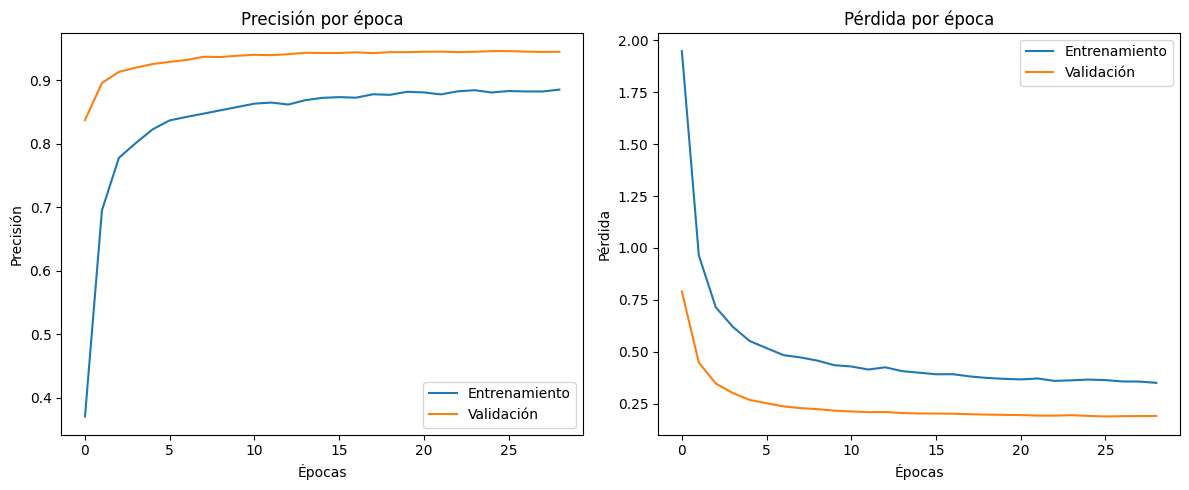

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 5))

# Precisión
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Entrenamiento')
plt.plot(epochs_range, val_acc, label='Validación')
plt.title('Precisión por época')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Pérdida
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Entrenamiento')
plt.plot(epochs_range, val_loss, label='Validación')
plt.title('Pérdida por época')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()


plt.tight_layout()
plt.show()



In [ ]:


# 1. Descongelamos el modelo base
base_model.trainable = True

print("Número de capas en el modelo base: ", len(base_model.layers))

fine_tune_at = 100 # Puedes experimentar con este número

# Congelamos todas las capas antes de la capa 'fine_tune_at'
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# 2. Re-compilamos el modelo con una tasa de aprendizaje MUY baja
model_v3.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), # 10 veces más bajo que antes
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 3. Continuamos el entrenamiento
# Entrenamos por unas pocas épocas más para ajustar los pesos descongelados.
fine_tune_epochs = 10
total_epochs = len(history.epoch) + fine_tune_epochs

history_fine_tune = model_v3.fit(
    train_ds,
    epochs=total_epochs,
    initial_epoch=history.epoch[-1], # Importante para que las gráficas continúen
    validation_data=val_ds,
    callbacks=callbacks # Puedes reusar los mismos callbacks
)

Número de capas en el modelo base:  154
Epoch 29/39
  5/467 [..............................] - ETA: 27s - loss: 0.2833 - accuracy: 0.9187

2025-06-20 01:22:25.775115: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 10/467 [..............................] - ETA: 25s - loss: 0.3076 - accuracy: 0.9062

2025-06-20 01:22:26.016720: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 56/467 [==>...........................] - ETA: 21s - loss: 0.3377 - accuracy: 0.8923

2025-06-20 01:22:28.410068: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


109/467 [======>.......................] - ETA: 18s - loss: 0.3345 - accuracy: 0.8913

2025-06-20 01:22:31.218140: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-20 01:22:31.315623: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


114/467 [======>.......................] - ETA: 18s - loss: 0.3326 - accuracy: 0.8928

2025-06-20 01:22:31.484522: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


188/467 [===========>..................] - ETA: 14s - loss: 0.3226 - accuracy: 0.8951

2025-06-20 01:22:35.347090: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


285/467 [=================>............] - ETA: 9s - loss: 0.3267 - accuracy: 0.8927

2025-06-20 01:22:40.396719: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


302/467 [==================>...........] - ETA: 8s - loss: 0.3234 - accuracy: 0.8936

2025-06-20 01:22:41.247615: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


315/467 [===================>..........] - ETA: 7s - loss: 0.3239 - accuracy: 0.8941

2025-06-20 01:22:41.900216: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


361/467 [======================>.......] - ETA: 5s - loss: 0.3209 - accuracy: 0.8954

2025-06-20 01:22:44.280181: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


381/467 [=======================>......] - ETA: 4s - loss: 0.3238 - accuracy: 0.8941

2025-06-20 01:22:45.322828: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


395/467 [========================>.....] - ETA: 3s - loss: 0.3219 - accuracy: 0.8949

2025-06-20 01:22:46.006593: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-20 01:22:46.195050: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


410/467 [=========================>....] - ETA: 2s - loss: 0.3216 - accuracy: 0.8952

2025-06-20 01:22:46.790635: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


425/467 [==========================>...] - ETA: 2s - loss: 0.3213 - accuracy: 0.8949

2025-06-20 01:22:47.633121: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


432/467 [==========================>...] - ETA: 1s - loss: 0.3212 - accuracy: 0.8949

2025-06-20 01:22:48.012717: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-20 01:22:48.201393: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - ETA: 0s - loss: 0.3211 - accuracy: 0.8958

2025-06-20 01:22:51.594621: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-20 01:22:52.002467: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-20 01:22:52.193977: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-20 01:22:52.453072: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


467/467 [==============================] - 35s 62ms/step - loss: 0.3211 - accuracy: 0.8958 - val_loss: 0.1791 - val_accuracy: 0.9456
Epoch 30/39
  4/467 [..............................] - ETA: 25s - loss: 0.3093 - accuracy: 0.8750

2025-06-20 01:22:54.775341: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 21/467 [>.............................] - ETA: 23s - loss: 0.3023 - accuracy: 0.8943

2025-06-20 01:22:55.670716: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 27/467 [>.............................] - ETA: 23s - loss: 0.3176 - accuracy: 0.8900

2025-06-20 01:22:55.971333: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 33/467 [=>............................] - ETA: 23s - loss: 0.3347 - accuracy: 0.8892

2025-06-20 01:22:56.281125: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/467 [==>...........................] - ETA: 21s - loss: 0.3075 - accuracy: 0.8980

2025-06-20 01:22:57.539708: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 73/467 [===>..........................] - ETA: 20s - loss: 0.3060 - accuracy: 0.8973

2025-06-20 01:22:58.370536: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 88/467 [====>.........................] - ETA: 19s - loss: 0.3005 - accuracy: 0.9016

2025-06-20 01:22:59.083627: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


138/467 [=======>......................] - ETA: 17s - loss: 0.2911 - accuracy: 0.9042

2025-06-20 01:23:01.730050: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


156/467 [=========>....................] - ETA: 16s - loss: 0.2918 - accuracy: 0.9050

2025-06-20 01:23:02.623443: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


180/467 [==========>...................] - ETA: 14s - loss: 0.2975 - accuracy: 0.9012

2025-06-20 01:23:03.870087: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


188/467 [===========>..................] - ETA: 14s - loss: 0.2949 - accuracy: 0.9014

2025-06-20 01:23:04.356083: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


199/467 [===========>..................] - ETA: 13s - loss: 0.2926 - accuracy: 0.9019

2025-06-20 01:23:04.876787: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


276/467 [================>.............] - ETA: 9s - loss: 0.2913 - accuracy: 0.9041 

2025-06-20 01:23:08.942047: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


340/467 [====================>.........] - ETA: 6s - loss: 0.2877 - accuracy: 0.9055

2025-06-20 01:23:12.276552: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


373/467 [======================>.......] - ETA: 4s - loss: 0.2852 - accuracy: 0.9065

2025-06-20 01:23:14.033725: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


380/467 [=======================>......] - ETA: 4s - loss: 0.2839 - accuracy: 0.9067

2025-06-20 01:23:14.386266: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


410/467 [=========================>....] - ETA: 2s - loss: 0.2836 - accuracy: 0.9072

2025-06-20 01:23:15.933646: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


423/467 [==========================>...] - ETA: 2s - loss: 0.2836 - accuracy: 0.9071

2025-06-20 01:23:16.606635: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


466/467 [============================>.] - ETA: 0s - loss: 0.2816 - accuracy: 0.9079

2025-06-20 01:23:19.934710: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-20 01:23:20.341476: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-20 01:23:20.524994: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-20 01:23:20.786594: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - 28s 61ms/step - loss: 0.2817 - accuracy: 0.9080 - val_loss: 0.1588 - val_accuracy: 0.9536
Epoch 31/39
 41/467 [=>............................] - ETA: 23s - loss: 0.2577 - accuracy: 0.9200

2025-06-20 01:23:25.169665: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 53/467 [==>...........................] - ETA: 22s - loss: 0.2573 - accuracy: 0.9186

2025-06-20 01:23:25.783988: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 61/467 [==>...........................] - ETA: 21s - loss: 0.2656 - accuracy: 0.9180

2025-06-20 01:23:26.222970: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-20 01:23:26.301757: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 94/467 [=====>........................] - ETA: 19s - loss: 0.2712 - accuracy: 0.9136

2025-06-20 01:23:27.922540: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


111/467 [======>.......................] - ETA: 18s - loss: 0.2675 - accuracy: 0.9130

2025-06-20 01:23:28.813130: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


121/467 [======>.......................] - ETA: 18s - loss: 0.2692 - accuracy: 0.9127

2025-06-20 01:23:29.336151: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


143/467 [========>.....................] - ETA: 17s - loss: 0.2692 - accuracy: 0.9100

2025-06-20 01:23:30.490271: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


183/467 [==========>...................] - ETA: 15s - loss: 0.2571 - accuracy: 0.9133

2025-06-20 01:23:32.601297: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


204/467 [============>.................] - ETA: 13s - loss: 0.2540 - accuracy: 0.9151

2025-06-20 01:23:33.690668: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-20 01:23:33.809725: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


293/467 [=================>............] - ETA: 9s - loss: 0.2548 - accuracy: 0.9150

2025-06-20 01:23:38.359391: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-20 01:23:38.412434: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


345/467 [=====================>........] - ETA: 6s - loss: 0.2532 - accuracy: 0.9159

2025-06-20 01:23:41.140416: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


381/467 [=======================>......] - ETA: 4s - loss: 0.2552 - accuracy: 0.9154

2025-06-20 01:23:42.875227: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


430/467 [==========================>...] - ETA: 1s - loss: 0.2529 - accuracy: 0.9164

2025-06-20 01:23:45.369373: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


444/467 [===========================>..] - ETA: 1s - loss: 0.2524 - accuracy: 0.9165

2025-06-20 01:23:46.147960: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


453/467 [============================>.] - ETA: 0s - loss: 0.2521 - accuracy: 0.9169

2025-06-20 01:23:46.577358: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


466/467 [============================>.] - ETA: 0s - loss: 0.2525 - accuracy: 0.9169

2025-06-20 01:23:48.333824: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-20 01:23:48.740265: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-20 01:23:48.926502: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-20 01:23:49.184648: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - 28s 61ms/step - loss: 0.2525 - accuracy: 0.9169 - val_loss: 0.1462 - val_accuracy: 0.9544
Epoch 32/39
  5/467 [..............................] - ETA: 26s - loss: 0.2570 - accuracy: 0.8813

2025-06-20 01:23:51.569128: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 19/467 [>.............................] - ETA: 25s - loss: 0.2350 - accuracy: 0.9128

2025-06-20 01:23:52.329780: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-20 01:23:52.459030: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 27/467 [>.............................] - ETA: 24s - loss: 0.2317 - accuracy: 0.9190

2025-06-20 01:23:52.749409: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 32/467 [=>............................] - ETA: 23s - loss: 0.2252 - accuracy: 0.9258

2025-06-20 01:23:53.058734: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 53/467 [==>...........................] - ETA: 22s - loss: 0.2354 - accuracy: 0.9198

2025-06-20 01:23:54.095710: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


142/467 [========>.....................] - ETA: 17s - loss: 0.2152 - accuracy: 0.9291

2025-06-20 01:23:58.908687: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


193/467 [===========>..................] - ETA: 14s - loss: 0.2221 - accuracy: 0.9292

2025-06-20 01:24:01.618921: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


207/467 [============>.................] - ETA: 13s - loss: 0.2254 - accuracy: 0.9286

2025-06-20 01:24:02.349720: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


236/467 [==============>...............] - ETA: 12s - loss: 0.2268 - accuracy: 0.9288

2025-06-20 01:24:03.931386: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


313/467 [===================>..........] - ETA: 8s - loss: 0.2288 - accuracy: 0.9282

2025-06-20 01:24:08.039162: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


321/467 [===================>..........] - ETA: 7s - loss: 0.2275 - accuracy: 0.9286

2025-06-20 01:24:08.499021: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


359/467 [======================>.......] - ETA: 5s - loss: 0.2278 - accuracy: 0.9283

2025-06-20 01:24:10.555395: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


378/467 [=======================>......] - ETA: 4s - loss: 0.2282 - accuracy: 0.9280

2025-06-20 01:24:11.442996: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


386/467 [=======================>......] - ETA: 4s - loss: 0.2304 - accuracy: 0.9271

2025-06-20 01:24:11.912748: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


392/467 [========================>.....] - ETA: 4s - loss: 0.2307 - accuracy: 0.9270

2025-06-20 01:24:12.230491: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


451/467 [===========================>..] - ETA: 0s - loss: 0.2321 - accuracy: 0.9267

2025-06-20 01:24:15.485759: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


460/467 [============================>.] - ETA: 0s - loss: 0.2312 - accuracy: 0.9272

2025-06-20 01:24:15.991610: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - ETA: 0s - loss: 0.2317 - accuracy: 0.9269

2025-06-20 01:24:17.371347: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-20 01:24:17.783484: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-20 01:24:17.968911: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-20 01:24:18.221674: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - 29s 62ms/step - loss: 0.2317 - accuracy: 0.9269 - val_loss: 0.1478 - val_accuracy: 0.9561
Epoch 33/39
  3/467 [..............................] - ETA: 27s - loss: 0.1698 - accuracy: 0.9583

2025-06-20 01:24:20.294561: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 10/467 [..............................] - ETA: 25s - loss: 0.1877 - accuracy: 0.9312

2025-06-20 01:24:20.674645: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 43/467 [=>............................] - ETA: 23s - loss: 0.1945 - accuracy: 0.9353

2025-06-20 01:24:22.548263: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-20 01:24:22.704939: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-20 01:24:22.748970: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 84/467 [====>.........................] - ETA: 21s - loss: 0.2193 - accuracy: 0.9245

2025-06-20 01:24:24.792689: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 89/467 [====>.........................] - ETA: 20s - loss: 0.2161 - accuracy: 0.9259

2025-06-20 01:24:25.063428: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


210/467 [============>.................] - ETA: 13s - loss: 0.2087 - accuracy: 0.9302

2025-06-20 01:24:31.542224: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


223/467 [=============>................] - ETA: 13s - loss: 0.2069 - accuracy: 0.9312

2025-06-20 01:24:32.291068: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


238/467 [==============>...............] - ETA: 12s - loss: 0.2045 - accuracy: 0.9326

2025-06-20 01:24:33.143121: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


272/467 [================>.............] - ETA: 10s - loss: 0.2062 - accuracy: 0.9321

2025-06-20 01:24:35.062360: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


284/467 [=================>............] - ETA: 10s - loss: 0.2080 - accuracy: 0.9318

2025-06-20 01:24:35.752994: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


305/467 [==================>...........] - ETA: 8s - loss: 0.2084 - accuracy: 0.9318

2025-06-20 01:24:36.865363: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-20 01:24:37.019359: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


317/467 [===================>..........] - ETA: 8s - loss: 0.2071 - accuracy: 0.9320

2025-06-20 01:24:37.488216: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-20 01:24:37.686591: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


340/467 [====================>.........] - ETA: 6s - loss: 0.2082 - accuracy: 0.9315

2025-06-20 01:24:38.653693: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


454/467 [============================>.] - ETA: 0s - loss: 0.2106 - accuracy: 0.9310

2025-06-20 01:24:44.740546: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - ETA: 0s - loss: 0.2112 - accuracy: 0.9309

2025-06-20 01:24:46.385207: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-20 01:24:46.791365: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-20 01:24:46.979821: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-20 01:24:47.243005: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - 29s 62ms/step - loss: 0.2112 - accuracy: 0.9309 - val_loss: 0.1570 - val_accuracy: 0.9547
Epoch 34/39
  9/467 [..............................] - ETA: 25s - loss: 0.1700 - accuracy: 0.9444

2025-06-20 01:24:49.679076: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 54/467 [==>...........................] - ETA: 22s - loss: 0.2043 - accuracy: 0.9416

2025-06-20 01:24:52.107539: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 66/467 [===>..........................] - ETA: 21s - loss: 0.2067 - accuracy: 0.9384

2025-06-20 01:24:52.782775: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-20 01:24:52.934229: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 86/467 [====>.........................] - ETA: 20s - loss: 0.1967 - accuracy: 0.9419

2025-06-20 01:24:53.864574: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-20 01:24:54.024706: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 92/467 [====>.........................] - ETA: 20s - loss: 0.1941 - accuracy: 0.9433

2025-06-20 01:24:54.182424: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 95/467 [=====>........................] - ETA: 20s - loss: 0.1917 - accuracy: 0.9438

2025-06-20 01:24:54.390238: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


132/467 [=======>......................] - ETA: 18s - loss: 0.2046 - accuracy: 0.9389

2025-06-20 01:24:56.269726: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


136/467 [=======>......................] - ETA: 17s - loss: 0.2025 - accuracy: 0.9396

2025-06-20 01:24:56.516974: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


162/467 [=========>....................] - ETA: 16s - loss: 0.2048 - accuracy: 0.9369

2025-06-20 01:24:57.932986: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


204/467 [============>.................] - ETA: 14s - loss: 0.2110 - accuracy: 0.9334

2025-06-20 01:25:00.091399: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


244/467 [==============>...............] - ETA: 11s - loss: 0.2107 - accuracy: 0.9316

2025-06-20 01:25:02.196040: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-20 01:25:02.211702: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


265/467 [================>.............] - ETA: 10s - loss: 0.2109 - accuracy: 0.9320

2025-06-20 01:25:03.303343: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


299/467 [==================>...........] - ETA: 8s - loss: 0.2080 - accuracy: 0.9325

2025-06-20 01:25:05.052516: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


305/467 [==================>...........] - ETA: 8s - loss: 0.2085 - accuracy: 0.9322

2025-06-20 01:25:05.390422: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


311/467 [==================>...........] - ETA: 8s - loss: 0.2083 - accuracy: 0.9321

2025-06-20 01:25:05.676961: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - ETA: 0s - loss: 0.2058 - accuracy: 0.9324

2025-06-20 01:25:14.782963: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-20 01:25:15.187846: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-20 01:25:15.378917: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-20 01:25:15.635485: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - 29s 61ms/step - loss: 0.2058 - accuracy: 0.9324 - val_loss: 0.1346 - val_accuracy: 0.9601
Epoch 35/39
 54/467 [==>...........................] - ETA: 23s - loss: 0.1815 - accuracy: 0.9398

2025-06-20 01:25:20.775684: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 79/467 [====>.........................] - ETA: 21s - loss: 0.1830 - accuracy: 0.9430

2025-06-20 01:25:22.099414: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


100/467 [=====>........................] - ETA: 19s - loss: 0.1814 - accuracy: 0.9431

2025-06-20 01:25:23.123224: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


138/467 [=======>......................] - ETA: 17s - loss: 0.1864 - accuracy: 0.9407

2025-06-20 01:25:25.137492: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


177/467 [==========>...................] - ETA: 15s - loss: 0.1937 - accuracy: 0.9382

2025-06-20 01:25:27.145645: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


228/467 [=============>................] - ETA: 12s - loss: 0.1970 - accuracy: 0.9365

2025-06-20 01:25:29.830343: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-20 01:25:30.009930: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


274/467 [================>.............] - ETA: 10s - loss: 0.1991 - accuracy: 0.9352

2025-06-20 01:25:32.283131: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


281/467 [=================>............] - ETA: 9s - loss: 0.1993 - accuracy: 0.9354

2025-06-20 01:25:32.600348: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


325/467 [===================>..........] - ETA: 7s - loss: 0.2027 - accuracy: 0.9344

2025-06-20 01:25:34.877644: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


345/467 [=====================>........] - ETA: 6s - loss: 0.2004 - accuracy: 0.9347

2025-06-20 01:25:35.927075: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


359/467 [======================>.......] - ETA: 5s - loss: 0.1989 - accuracy: 0.9353

2025-06-20 01:25:36.607002: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


365/467 [======================>.......] - ETA: 5s - loss: 0.1984 - accuracy: 0.9354

2025-06-20 01:25:36.905828: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


386/467 [=======================>......] - ETA: 4s - loss: 0.1962 - accuracy: 0.9359

2025-06-20 01:25:38.018342: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


392/467 [========================>.....] - ETA: 3s - loss: 0.1954 - accuracy: 0.9362

2025-06-20 01:25:38.352297: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


424/467 [==========================>...] - ETA: 2s - loss: 0.1945 - accuracy: 0.9360

2025-06-20 01:25:40.097161: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


451/467 [===========================>..] - ETA: 0s - loss: 0.1938 - accuracy: 0.9363

2025-06-20 01:25:41.471158: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


460/467 [============================>.] - ETA: 0s - loss: 0.1933 - accuracy: 0.9365

2025-06-20 01:25:41.918951: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - ETA: 0s - loss: 0.1934 - accuracy: 0.9365

2025-06-20 01:25:43.306351: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-20 01:25:43.710702: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-20 01:25:43.901412: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-20 01:25:44.162756: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - 28s 60ms/step - loss: 0.1934 - accuracy: 0.9365 - val_loss: 0.1467 - val_accuracy: 0.9569
Epoch 36/39
 44/467 [=>............................] - ETA: 21s - loss: 0.1716 - accuracy: 0.9474

2025-06-20 01:25:48.372872: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 61/467 [==>...........................] - ETA: 21s - loss: 0.1739 - accuracy: 0.9472

2025-06-20 01:25:49.222220: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


104/467 [=====>........................] - ETA: 18s - loss: 0.1686 - accuracy: 0.9456

2025-06-20 01:25:51.467835: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


122/467 [======>.......................] - ETA: 17s - loss: 0.1719 - accuracy: 0.9421

2025-06-20 01:25:52.412397: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


134/467 [=======>......................] - ETA: 17s - loss: 0.1655 - accuracy: 0.9445

2025-06-20 01:25:52.980388: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


144/467 [========>.....................] - ETA: 16s - loss: 0.1659 - accuracy: 0.9438

2025-06-20 01:25:53.545840: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


153/467 [========>.....................] - ETA: 16s - loss: 0.1630 - accuracy: 0.9449

2025-06-20 01:25:54.028599: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


160/467 [=========>....................] - ETA: 15s - loss: 0.1643 - accuracy: 0.9443

2025-06-20 01:25:54.416406: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-20 01:25:54.429089: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


174/467 [==========>...................] - ETA: 15s - loss: 0.1656 - accuracy: 0.9449

2025-06-20 01:25:55.109267: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


180/467 [==========>...................] - ETA: 14s - loss: 0.1662 - accuracy: 0.9443

2025-06-20 01:25:55.428638: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


236/467 [==============>...............] - ETA: 12s - loss: 0.1634 - accuracy: 0.9453

2025-06-20 01:25:58.348521: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


276/467 [================>.............] - ETA: 9s - loss: 0.1636 - accuracy: 0.9461

2025-06-20 01:26:00.415823: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


357/467 [=====================>........] - ETA: 5s - loss: 0.1692 - accuracy: 0.9449

2025-06-20 01:26:04.592475: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


370/467 [======================>.......] - ETA: 5s - loss: 0.1688 - accuracy: 0.9450

2025-06-20 01:26:05.265148: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


381/467 [=======================>......] - ETA: 4s - loss: 0.1702 - accuracy: 0.9444

2025-06-20 01:26:05.802770: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


445/467 [===========================>..] - ETA: 1s - loss: 0.1714 - accuracy: 0.9432

2025-06-20 01:26:09.132998: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


463/467 [============================>.] - ETA: 0s - loss: 0.1709 - accuracy: 0.9433

2025-06-20 01:26:10.074188: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


466/467 [============================>.] - ETA: 0s - loss: 0.1701 - accuracy: 0.9436

2025-06-20 01:26:11.303183: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-20 01:26:11.707427: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-20 01:26:11.895453: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-20 01:26:12.149925: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - 28s 60ms/step - loss: 0.1700 - accuracy: 0.9437 - val_loss: 0.1425 - val_accuracy: 0.9598
Epoch 37/39
 17/467 [>.............................] - ETA: 23s - loss: 0.1508 - accuracy: 0.9467

2025-06-20 01:26:14.972241: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 27/467 [>.............................] - ETA: 23s - loss: 0.1721 - accuracy: 0.9433

2025-06-20 01:26:15.457444: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/467 [=>............................] - ETA: 22s - loss: 0.1659 - accuracy: 0.9449

2025-06-20 01:26:15.831674: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 77/467 [===>..........................] - ETA: 20s - loss: 0.1714 - accuracy: 0.9440

2025-06-20 01:26:18.183863: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 83/467 [====>.........................] - ETA: 20s - loss: 0.1655 - accuracy: 0.9462

2025-06-20 01:26:18.432378: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


127/467 [=======>......................] - ETA: 17s - loss: 0.1660 - accuracy: 0.9427

2025-06-20 01:26:20.784168: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


136/467 [=======>......................] - ETA: 17s - loss: 0.1685 - accuracy: 0.9419

2025-06-20 01:26:21.271535: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


170/467 [=========>....................] - ETA: 15s - loss: 0.1658 - accuracy: 0.9434

2025-06-20 01:26:23.041667: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


186/467 [==========>...................] - ETA: 14s - loss: 0.1705 - accuracy: 0.9415

2025-06-20 01:26:23.867454: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


191/467 [===========>..................] - ETA: 14s - loss: 0.1726 - accuracy: 0.9414

2025-06-20 01:26:24.118195: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


212/467 [============>.................] - ETA: 13s - loss: 0.1723 - accuracy: 0.9421

2025-06-20 01:26:25.276816: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


238/467 [==============>...............] - ETA: 12s - loss: 0.1706 - accuracy: 0.9425

2025-06-20 01:26:26.752359: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


320/467 [===================>..........] - ETA: 7s - loss: 0.1710 - accuracy: 0.9422

2025-06-20 01:26:31.059234: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


334/467 [====================>.........] - ETA: 7s - loss: 0.1704 - accuracy: 0.9429

2025-06-20 01:26:31.781557: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


360/467 [======================>.......] - ETA: 5s - loss: 0.1725 - accuracy: 0.9419

2025-06-20 01:26:33.131503: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


392/467 [========================>.....] - ETA: 3s - loss: 0.1707 - accuracy: 0.9417

2025-06-20 01:26:34.764541: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


396/467 [========================>.....] - ETA: 3s - loss: 0.1698 - accuracy: 0.9420

2025-06-20 01:26:35.025311: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


458/467 [============================>.] - ETA: 0s - loss: 0.1689 - accuracy: 0.9431

2025-06-20 01:26:38.286316: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


466/467 [============================>.] - ETA: 0s - loss: 0.1688 - accuracy: 0.9433

2025-06-20 01:26:39.724428: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-20 01:26:40.137902: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-20 01:26:40.327949: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-20 01:26:40.583426: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/467 [==============================] - 28s 61ms/step - loss: 0.1687 - accuracy: 0.9433 - val_loss: 0.1375 - val_accuracy: 0.9587


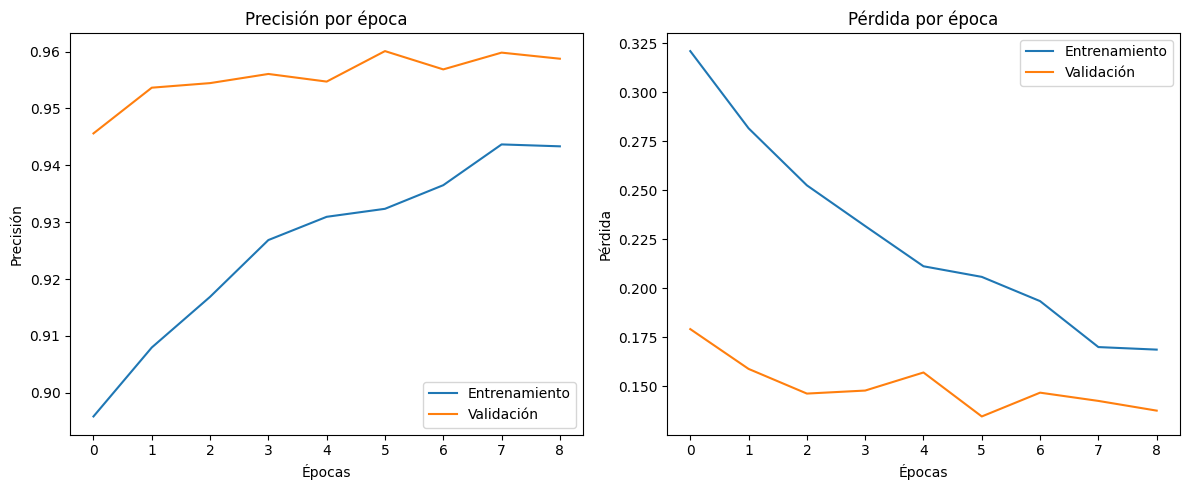

In [ ]:
import matplotlib.pyplot as plt

acc = history_fine_tune.history['accuracy']
val_acc = history_fine_tune.history['val_accuracy']

loss = history_fine_tune.history['loss']
val_loss = history_fine_tune.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 5))

# Precisión
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Entrenamiento')
plt.plot(epochs_range, val_acc, label='Validación')
plt.title('Precisión por época')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Pérdida
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Entrenamiento')
plt.plot(epochs_range, val_loss, label='Validación')
plt.title('Pérdida por época')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()


plt.tight_layout()
plt.show()



In [ ]:
from tensorflow.keras.models import load_model
best_model = load_model('best_model.h5')


In [ ]:
best_model.save('mejor_modelo.h5')

/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Suponiendo que tienes un test_ds
loss, accuracy = best_model.evaluate(val_ds)
print(f"Precisión final en el conjunto de prueba: {accuracy*100:.2f}%")

# Genera el reporte de clasificación
# (El código para esto puede variar un poco, pero la idea es usar best_model.predict)

 31/117 [======>.......................] - ETA: 2s - loss: 0.1177 - accuracy: 0.9688

2025-06-20 01:35:03.513252: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 45/117 [==========>...................] - ETA: 2s - loss: 0.1338 - accuracy: 0.9632

2025-06-20 01:35:03.941525: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-06-20 01:35:04.137654: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 59/117 [==============>...............] - ETA: 1s - loss: 0.1381 - accuracy: 0.9597

2025-06-20 01:35:04.404975: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


117/117 [==============================] - 4s 32ms/step - loss: 0.1346 - accuracy: 0.9601
Precisión final en el conjunto de prueba: 96.01%



Realizando predicciones en el conjunto de validación...
1/1 [==============================] - 0s 14ms/step


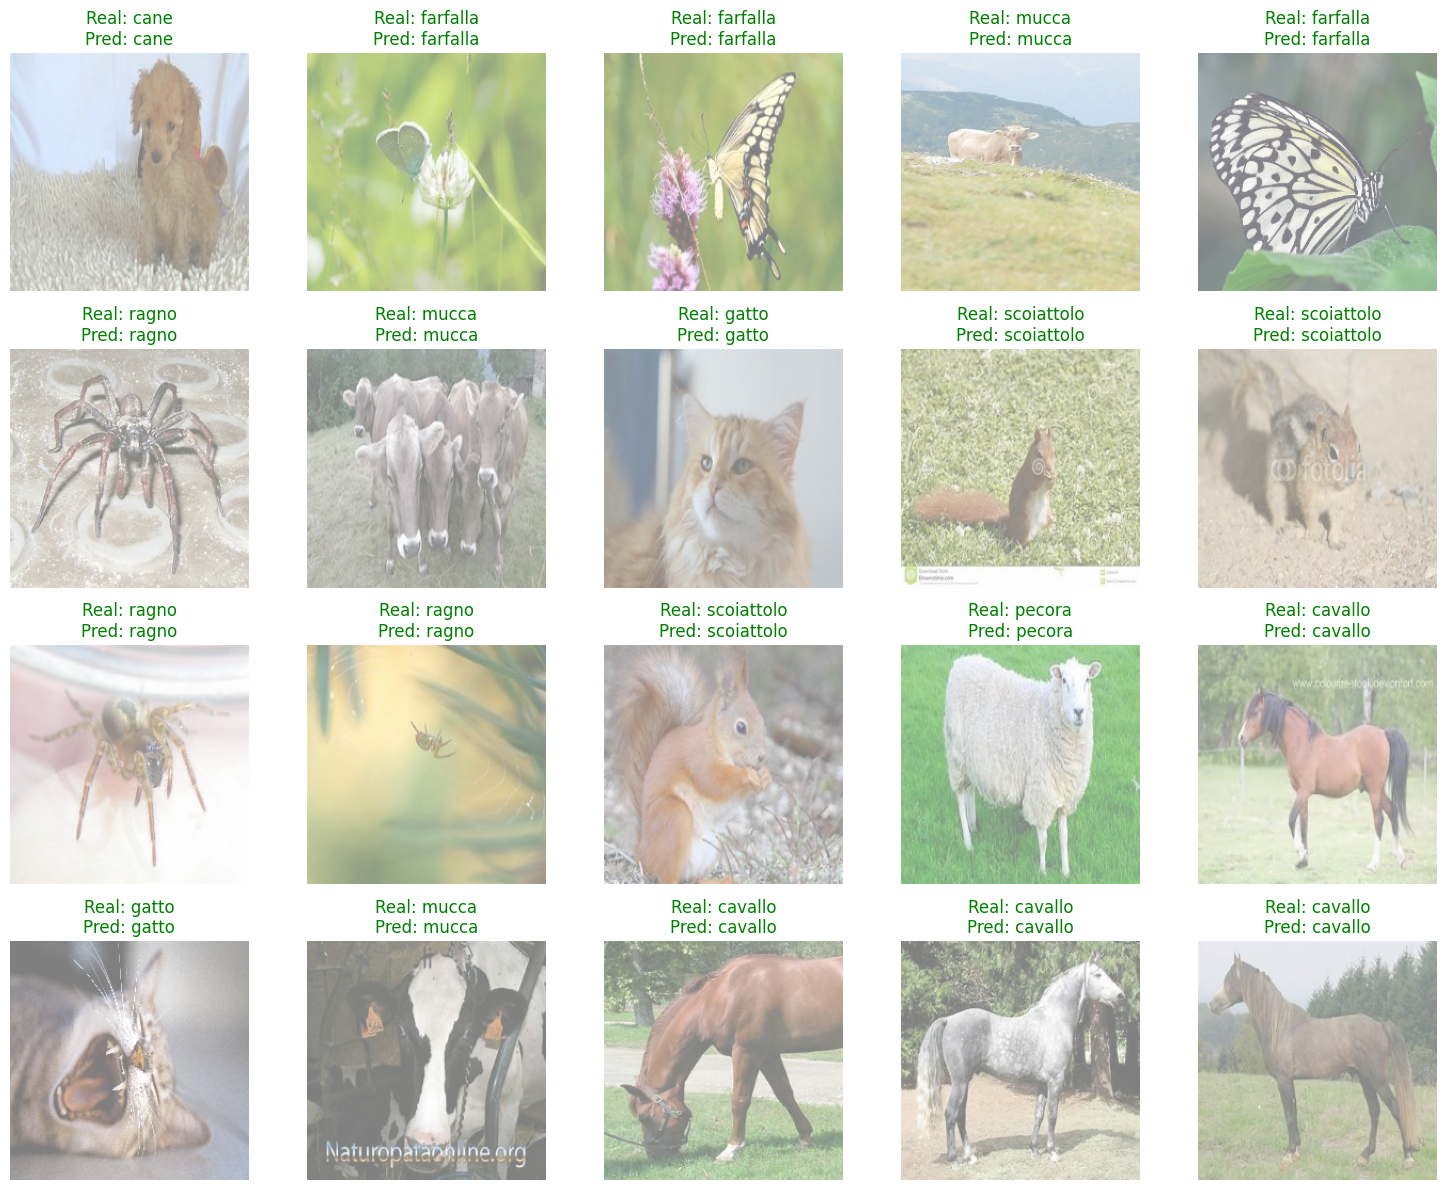

Visualización completa.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf



print("\nRealizando predicciones en el conjunto de validación...")

for images, labels in val_ds.take(1):
    # Selecciona las primeras 20 del batch
    images_subset = images[1:21]
    labels_subset = labels[1:21]
    break 

# Hacer predicciones con el modelo
predictions = best_model.predict(images_subset)

# Obtener los índices de clase predichos (el que tiene mayor probabilidad)
predicted_classes = np.argmax(predictions, axis=1)

# Obtener los nombres de clase reales y predichos
actual_class_names = [class_names[label.numpy()] for label in labels_subset]
predicted_class_names = [class_names[predicted_classes] for predicted_classes in predicted_classes]

# Invertir la normalización para mostrar las imágenes correctamente
# (De [-1, 1] de vuelta a [0, 255] y tipo uint8)
display_images = ((images_subset.numpy() + 1) * 127.5).astype(np.uint8)

# Mostrar las imágenes con sus etiquetas reales y predichas
plt.figure(figsize=(15, 12)) # Ajusta el tamaño de la figura si es necesario

for i in range(20):
    plt.subplot(4, 5, i + 1) # Layout de 4 filas y 5 columnas
    plt.imshow(display_images[i])

    # Define el color del título (verde si acierta, rojo si falla)
    color = 'green' if actual_class_names[i] == predicted_class_names[i] else 'red'

    # Pon el título con las etiquetas real y predicha
    plt.title(f"Real: {actual_class_names[i]}\nPred: {predicted_class_names[i]}", color=color)
    plt.axis('off') # Oculta los ejes

plt.tight_layout() # Ajusta el layout para que no se superpongan los títulos
plt.show()

print("Visualización completa.")